## Problem statement

ElecKart is an e-commerce firm based out of Ontario, Canada specialising in electronic products. Over the last one year, they had spent a significant amount of money on marketing. Occasionally, they had also offered big-ticket promotions (similar to the Big Billion Day). They are about to create a marketing budget for the next year, which includes spending on commercials, online campaigns, and pricing & promotion strategies. The CFO feels that the money spent over the last 12 months on marketing was not sufficiently impactful, and, that they can either cut on the budget or reallocate it optimally across marketing levers to improve the revenue response.

Imagine that you are a part of the marketing team working on budget optimisation. You need to develop a market mix model to observe the actual impact of different marketing variables over the last year. Using your understanding of the model, you have to recommend the optimal budget allocation for different marketing levers for the next year.

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Important configurations
pd.set_option('display.float_format', lambda x: '%.2f' % x) # For proper display of deciaml values 
pd.set_option('future.no_silent_downcasting', True) # Silent downcasting

# Shows plots in jupyter notebook
%matplotlib inline

# Plotting Configurations
sns.set_style("darkgrid")

### Reading Consumer Data

In [3]:
consumer_df = pd.read_csv('ConsumerElectronics.csv', low_memory=False)

In [4]:
consumer_df.head()

fsn_id           order_date  Year  Month            order_id  \
0  ACCCX3S58G7B5F6P  2015-10-17 15:11:54  2015     10 3419300926147000.00   
1  ACCCX3S58G7B5F6P  2015-10-19 10:07:22  2015     10 1420830839915200.00   
2  ACCCX3S5AHMF55FV  2015-10-20 15:45:56  2015     10 2421912925714800.00   
3  ACCCX3S5AHMF55FV  2015-10-14 12:05:15  2015     10 4416592101738400.00   
4  ACCCX3S5AHMF55FV  2015-10-17 21:25:03  2015     10 4419525153426400.00   

        order_item_id   gmv  units deliverybdays deliverycdays  \
0 3419300926147000.00  6400      1            \N            \N   
1 1420830839915200.00  6900      1            \N            \N   
2 2421912925714800.00  1990      1            \N            \N   
3 4416592101738400.00  1690      1            \N            \N   
4 4419525153426400.00  1618      1            \N            \N   

  s1_fact.order_payment_type  sla                 cust_id  \
0                        COD    5  -1.01299130778588E+018   
1                        COD    7  -8.99032457905512E+018   
2                        COD   10   -1.0404429420466E+018   
3                    Prepaid    4  -7.60496084352714E+018   
4                    Prepaid    6    2.8945572083453E+018   

                  pincode product_analytic_super_category  \
0  -7.79175582905735E+018                              CE   
1   7.33541149097431E+018                              CE   
2  -7.47768776228657E+018                              CE   
3  -5.83593163877661E+018                              CE   
4   5.34735360997242E+017                              CE   

  product_analytic_category product_analytic_sub_category  \
0           CameraAccessory               CameraAccessory   
1           CameraAccessory               CameraAccessory   
2           CameraAccessory               CameraAccessory   
3           CameraAccessory               CameraAccessory   
4           CameraAccessory               CameraAccessory   

  product_analytic_vertical  product_mrp  product_procurement_sla  
0              CameraTripod         7190                        0  
1              CameraTripod         7190                        0  
2              CameraTripod         2099                        3  
3              CameraTripod         2099                        3  
4              CameraTripod         2099                        3

In [5]:
consumer_df.shape

(1648824, 20)

In [6]:
consumer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648824 entries, 0 to 1648823
Data columns (total 20 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   fsn_id                           1648824 non-null  object 
 1   order_date                       1648824 non-null  object 
 2   Year                             1648824 non-null  int64  
 3   Month                            1648824 non-null  int64  
 4   order_id                         1648824 non-null  float64
 5   order_item_id                    1648824 non-null  float64
 6   gmv                              1648824 non-null  object 
 7   units                            1648824 non-null  int64  
 8   deliverybdays                    1648824 non-null  object 
 9   deliverycdays                    1648824 non-null  object 
 10  s1_fact.order_payment_type       1648824 non-null  object 
 11  sla                              1648824 non-null 

In [7]:
consumer_df.describe()

Year      Month            order_id         order_item_id  \
count 1648824.00 1648824.00          1648824.00            1648824.00   
mean     2015.52       6.59 2842444674146622.00  13756277530325592.00   
std         0.50       3.62 1269134332596894.25  55945981798631008.00   
min      2015.00       1.00         76331515.00          108016495.00   
25%      2015.00       3.00 1602588503969575.00   1606725138262300.00   
50%      2016.00       6.00 2611824528743350.00   2619185472741150.00   
75%      2016.00      10.00 3610613539366250.00   4397705931628400.00   
max      2016.00      12.00 5395076790260600.00 300037347717704000.00   

           units        sla  product_mrp  product_procurement_sla  
count 1648824.00 1648824.00   1648824.00               1648824.00  
mean        1.02       5.69      4108.31                     5.40  
std         0.25       2.98      8510.92                    53.47  
min         1.00       0.00         0.00                    -1.00  
25%         1.00       4.00       799.00                     1.00  
50%         1.00       6.00      1599.00                     2.00  
75%         1.00       7.00      3499.00                     3.00  
max        50.00    1006.00    299999.00                  1000.00

#### Quick fixing colnames and data types

In [8]:
consumer_df.columns

Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 'deliverybdays', 'deliverycdays',
       's1_fact.order_payment_type', 'sla', 'cust_id', 'pincode',
       'product_analytic_super_category', 'product_analytic_category',
       'product_analytic_sub_category', 'product_analytic_vertical',
       'product_mrp', 'product_procurement_sla'],
      dtype='object')

In [9]:
# Renaming s1_fact.order_payment_type to order_payment_type
consumer_df.rename(columns={'s1_fact.order_payment_type': 'order_payment_type'}, inplace=True)

In [10]:
# Changing order_date to datetime object
consumer_df['order_date'] = pd.to_datetime(consumer_df['order_date'])

In [11]:
# Checking for duplicate rows
nduplicates = consumer_df.duplicated().sum()
print('Duplicate rows: {}'.format(nduplicates))
print('Percent of Duplicate rows: {}%'.format(round(nduplicates / len(consumer_df) * 100, 2)))

Duplicate rows: 104843
Percent of Duplicate rows: 6.36%


In [12]:
# Dropping duplicate values
consumer_df = consumer_df.drop_duplicates()

In [13]:
# Changing to object type
consumer_df['Year'] = consumer_df['Year'].astype('object')
consumer_df['Month'] = consumer_df['Month'].astype('object')
consumer_df['order_id'] = consumer_df['order_id'].astype('object')
consumer_df['order_item_id'] = consumer_df['order_item_id'].astype('object')

In [14]:
# Changing to numeric type
consumer_df['gmv'] = pd.to_numeric(consumer_df['gmv'], errors='coerce')
consumer_df['units'] = pd.to_numeric(consumer_df['units'], errors='coerce')
consumer_df['deliverybdays'] = pd.to_numeric(consumer_df['deliverybdays'], errors='coerce')
consumer_df['deliverycdays'] = pd.to_numeric(consumer_df['deliverycdays'], errors='coerce')

In [15]:
consumer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1543981 entries, 0 to 1543996
Data columns (total 20 columns):
 #   Column                           Non-Null Count    Dtype         
---  ------                           --------------    -----         
 0   fsn_id                           1543981 non-null  object        
 1   order_date                       1543981 non-null  datetime64[ns]
 2   Year                             1543981 non-null  object        
 3   Month                            1543981 non-null  object        
 4   order_id                         1543981 non-null  object        
 5   order_item_id                    1543981 non-null  object        
 6   gmv                              1539943 non-null  float64       
 7   units                            1543981 non-null  int64         
 8   deliverybdays                    335802 non-null   float64       
 9   deliverycdays                    335803 non-null   float64       
 10  order_payment_type               15

In [16]:
# Check start and end date of dataframe
print('Start date: {} and end date: {}'.format(consumer_df['order_date'].min(), consumer_df['order_date'].max()))

Start date: 2015-05-19 13:42:09 and end date: 2016-07-25 01:19:45


In [17]:
# Keeping date range from 2015-07-01 to 2016-06-30

# Define date range
start_date = '2015-07-01'
end_date = '2016-06-30'

# Filter DataFrame
consumer_df = consumer_df[(consumer_df['order_date'] >= start_date) & (consumer_df['order_date'] <= end_date)]

In [18]:
# Check start and end date of dataframe
print('Start date: {} and end date: {}'.format(consumer_df['order_date'].min(), consumer_df['order_date'].max()))

Start date: 2015-07-01 00:36:11 and end date: 2016-06-29 23:59:22


## EDA

In [19]:
consumer_df.describe()

order_date        gmv      units  deliverybdays  \
count                        1540100 1536062.00 1540100.00      332744.00   
mean   2016-01-17 16:34:29.167593984    2489.22       1.02           4.58   
min              2015-07-01 00:36:11       0.00       1.00         -98.00   
25%              2015-10-28 12:42:25     340.00       1.00           3.00   
50%       2016-01-19 18:05:00.500000     750.00       1.00           4.00   
75%              2016-04-06 15:43:39    1999.00       1.00           6.00   
max              2016-06-29 23:59:22  226947.00      50.00         238.00   
std                              NaN    5659.55       0.26           3.39   

       deliverycdays        sla  product_mrp  product_procurement_sla  
count      332745.00 1540100.00   1540100.00               1540100.00  
mean            5.25       5.68      4164.05                     5.33  
min         -5345.00       0.00         0.00                    -1.00  
25%             3.00       4.00       799.00                     1.00  
50%             5.00       6.00      1599.00                     2.00  
75%             7.00       7.00      3499.00                     3.00  
max           278.00    1006.00    299999.00                  1000.00  
std            12.58       2.99      8604.22                    52.77

#### Numerical Columns

In [20]:
# Numerical Columns
num_cols =  consumer_df.select_dtypes(include='number').columns.tolist() 

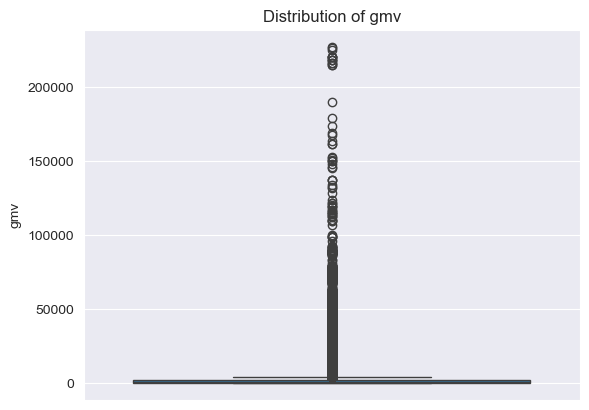

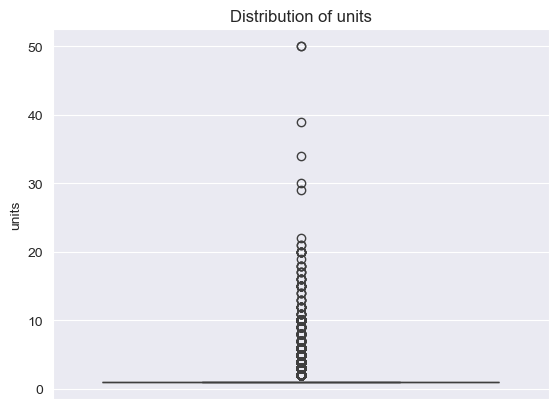

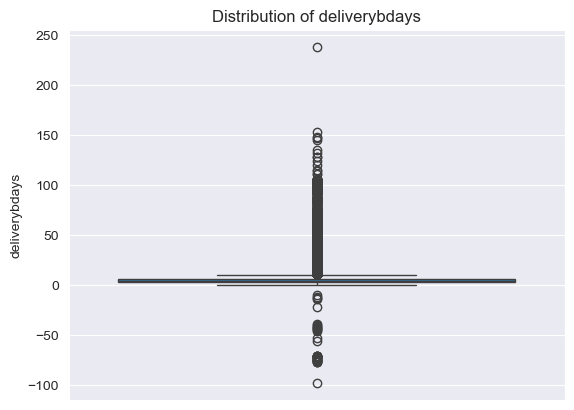

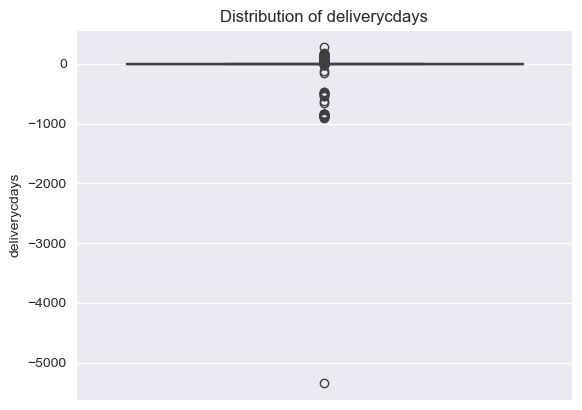

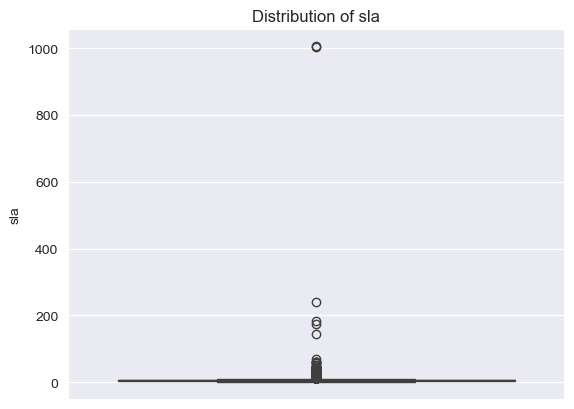

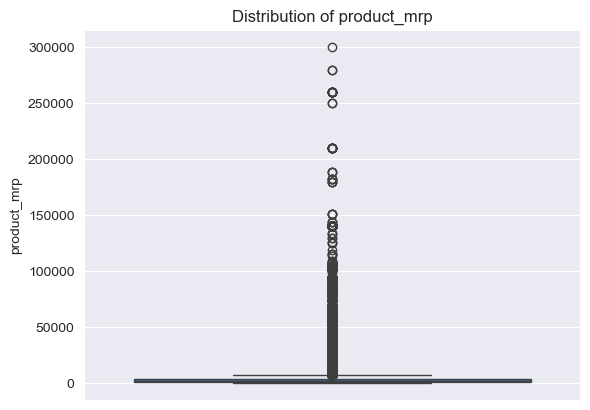

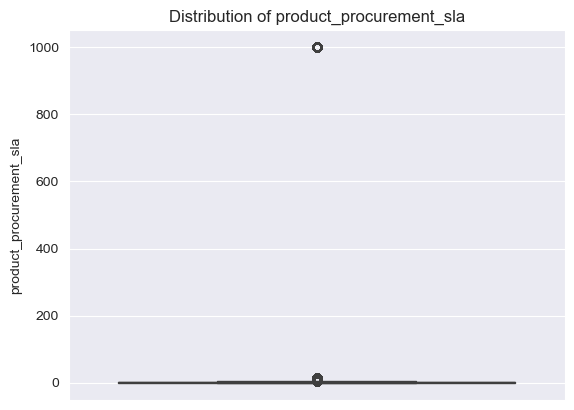

In [21]:
# Checking for outliers via box plot
for col in num_cols:
    sns.boxplot(consumer_df[col].dropna())
    plt.title('Distribution of ' + col)
    plt.show()  

##### Outlier treatment

In [22]:
# Capping Outliers at 99.5%
for col in num_cols:
    percentiles =  consumer_df[col].quantile([0.01, 0.995]).values
    consumer_df[col] = np.clip(consumer_df[col], percentiles[0], percentiles[1])

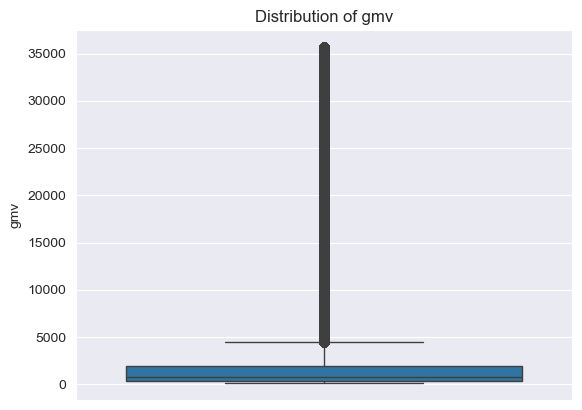

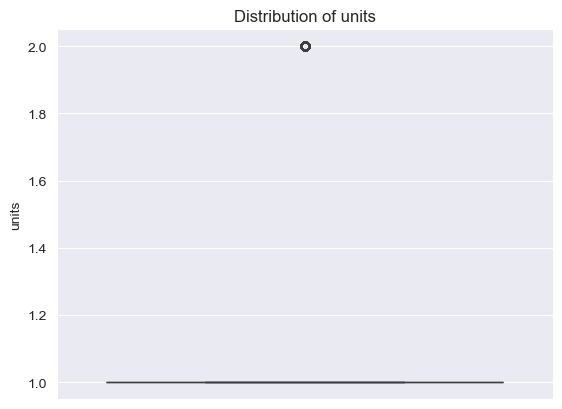

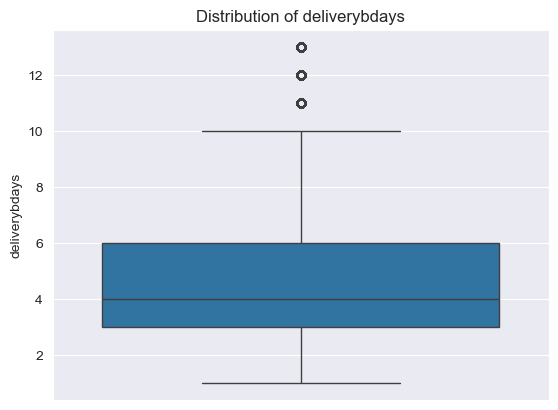

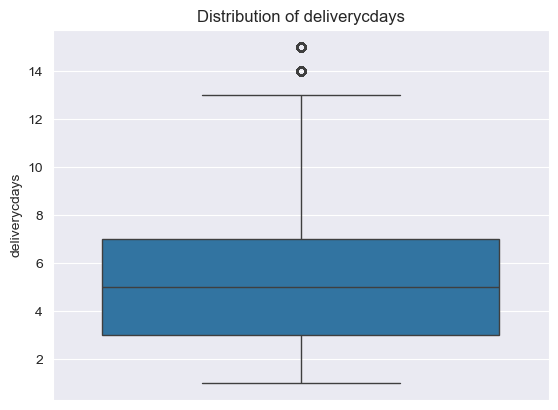

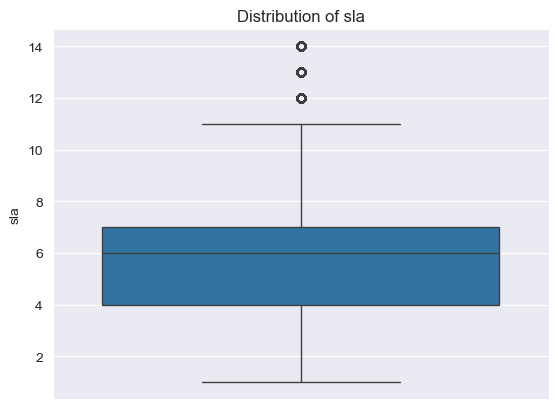

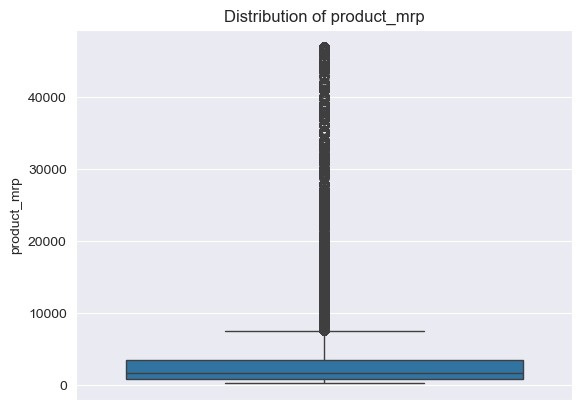

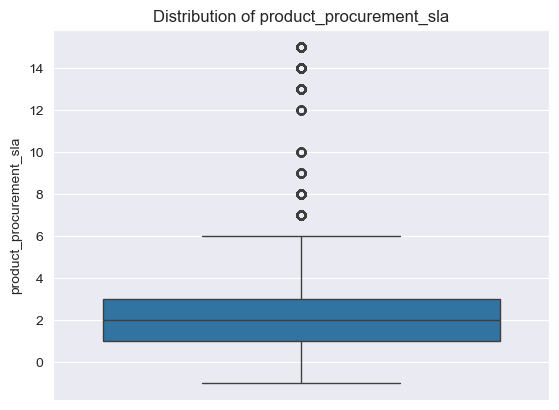

In [23]:
# Checking for outliers again via box plot
for col in num_cols:
    sns.boxplot(consumer_df[col].dropna())
    plt.title('Distribution of ' + col)
    plt.show()  

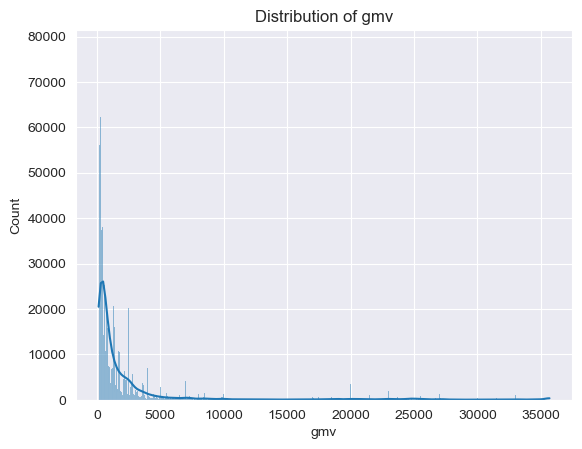

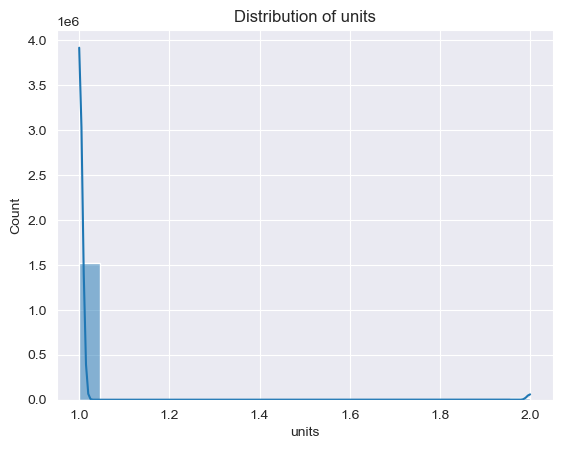

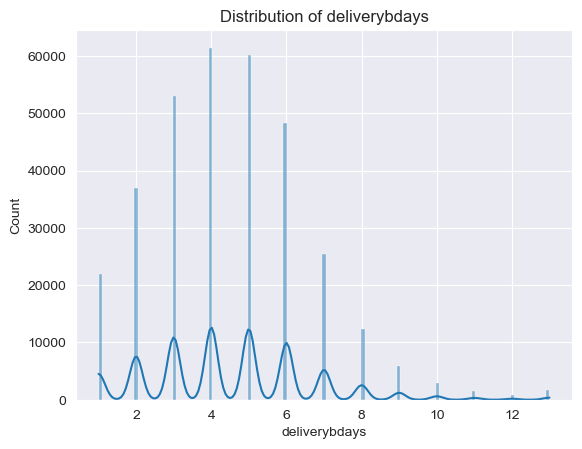

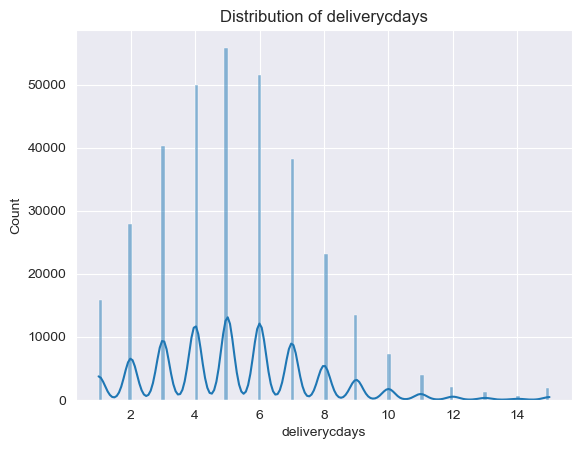

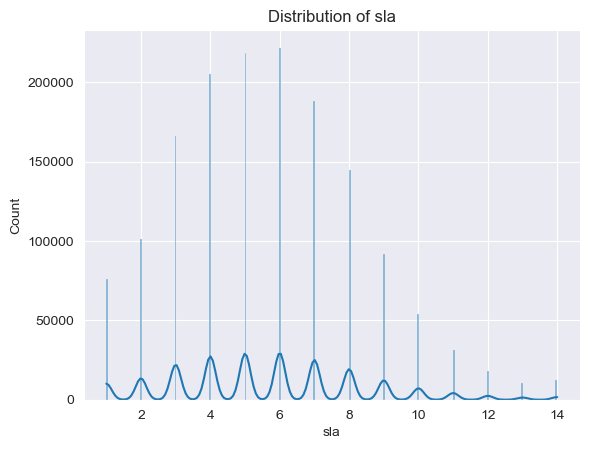

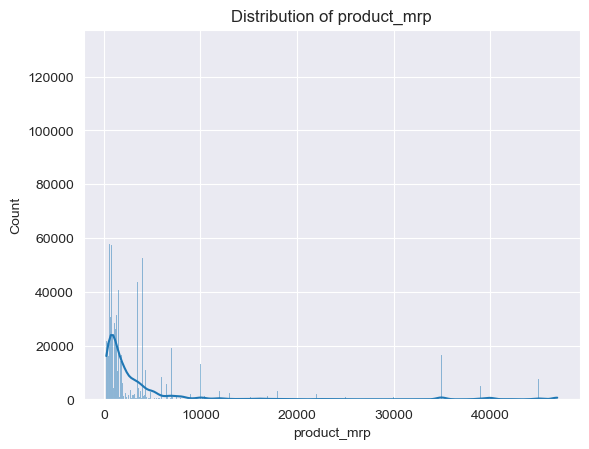

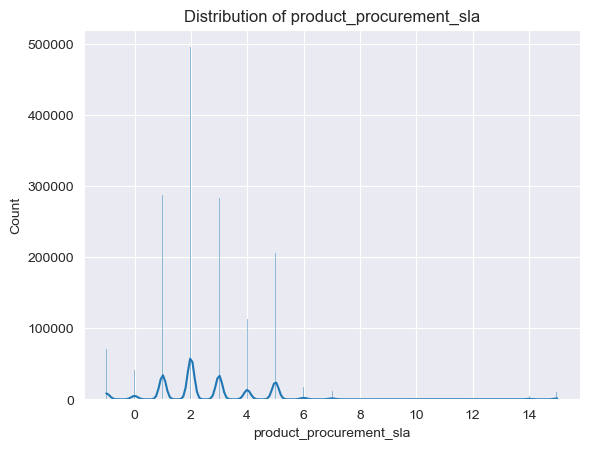

In [24]:
# Checking for distribution via histplot with kde
for col in num_cols:
    sns.histplot(consumer_df[col].dropna(), kde=True)
    plt.title('Distribution of ' + col)
    plt.show()  

##### Null value treatment

In [25]:
# Checking percentage of Null values in numerical columns
round(consumer_df[num_cols].isnull().sum() / len(consumer_df) * 100, 2)

gmv                        0.26
units                      0.00
deliverybdays             78.39
deliverycdays             78.39
sla                        0.00
product_mrp                0.00
product_procurement_sla    0.00
dtype: float64

In [26]:
# Lets remove the row with GMV Null as it is 0.26%
consumer_df.dropna(subset=['gmv'], inplace=True)

In [27]:
# Function to get imputed values using Random Sampling Imputation method
def getRSIValues(series_param) :
    n = series_param.isnull().sum()
    replace_values = series_param.dropna().sample(n, random_state=42, replace=True).values
    series_param = series_param.copy()
    series_param[series_param.isnull()] = replace_values
    return(series_param)

In [28]:
# Creating an new col to contain the imputed values
consumer_df['deliverybdays_rsi'] = getRSIValues(consumer_df['deliverybdays'])

In [29]:
# Confirming for null values
round(consumer_df['deliverybdays_rsi'].isnull().sum() / len(consumer_df) * 100, 2)

np.float64(0.0)

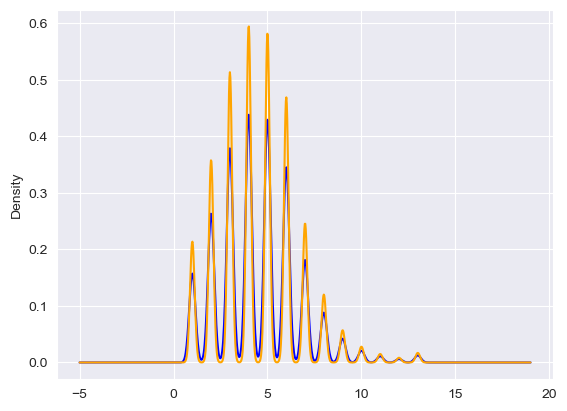

In [30]:
# Plotting distributions
consumer_df['deliverybdays'].plot(kind='kde',color='blue')
consumer_df['deliverybdays_rsi'].plot(kind='kde',color='orange')
plt.show()

In [31]:
consumer_df[['deliverybdays', 'deliverybdays_rsi']].describe()

deliverybdays  deliverybdays_rsi
count      332742.00         1536062.00
mean            4.51               4.51
std             2.13               2.14
min             1.00               1.00
25%             3.00               3.00
50%             4.00               4.00
75%             6.00               6.00
max            13.00              13.00

In [32]:
# Creating an new col to contain the imputed values
consumer_df['deliverycdays_rsi'] = getRSIValues(consumer_df['deliverycdays'])

In [33]:
# Confirming for null values
round(consumer_df['deliverycdays_rsi'].isnull().sum() / len(consumer_df) * 100, 2)

np.float64(0.0)

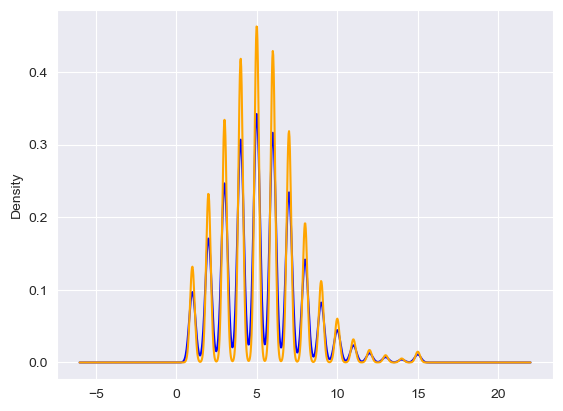

In [34]:
# Plotting distributions
consumer_df['deliverycdays'].plot(kind='kde',color='blue')
consumer_df['deliverycdays_rsi'].plot(kind='kde',color='orange')
plt.show()

In [35]:
consumer_df[['deliverycdays', 'deliverycdays_rsi']].describe()

deliverycdays  deliverycdays_rsi
count      332743.00         1536062.00
mean            5.24               5.24
std             2.48               2.48
min             1.00               1.00
25%             3.00               3.00
50%             5.00               5.00
75%             7.00               7.00
max            15.00              15.00

In [36]:
consumer_df.drop(['deliverybdays', 'deliverycdays'], axis=1, inplace=True)

#### Categorical Columns

In [37]:
# Categorical Values
# Dropping ids, string date and pincode for convenience
cat_cols =  consumer_df.drop(['fsn_id', 'order_id', 'order_item_id', 'cust_id', 'pincode'], axis=1).select_dtypes(include='object').columns.tolist() 

In [38]:
consumer_df[cat_cols].nunique().sort_values(ascending=False)

product_analytic_vertical          74
product_analytic_sub_category      14
Month                              12
product_analytic_category           5
Year                                2
order_payment_type                  2
product_analytic_super_category     1
dtype: int64

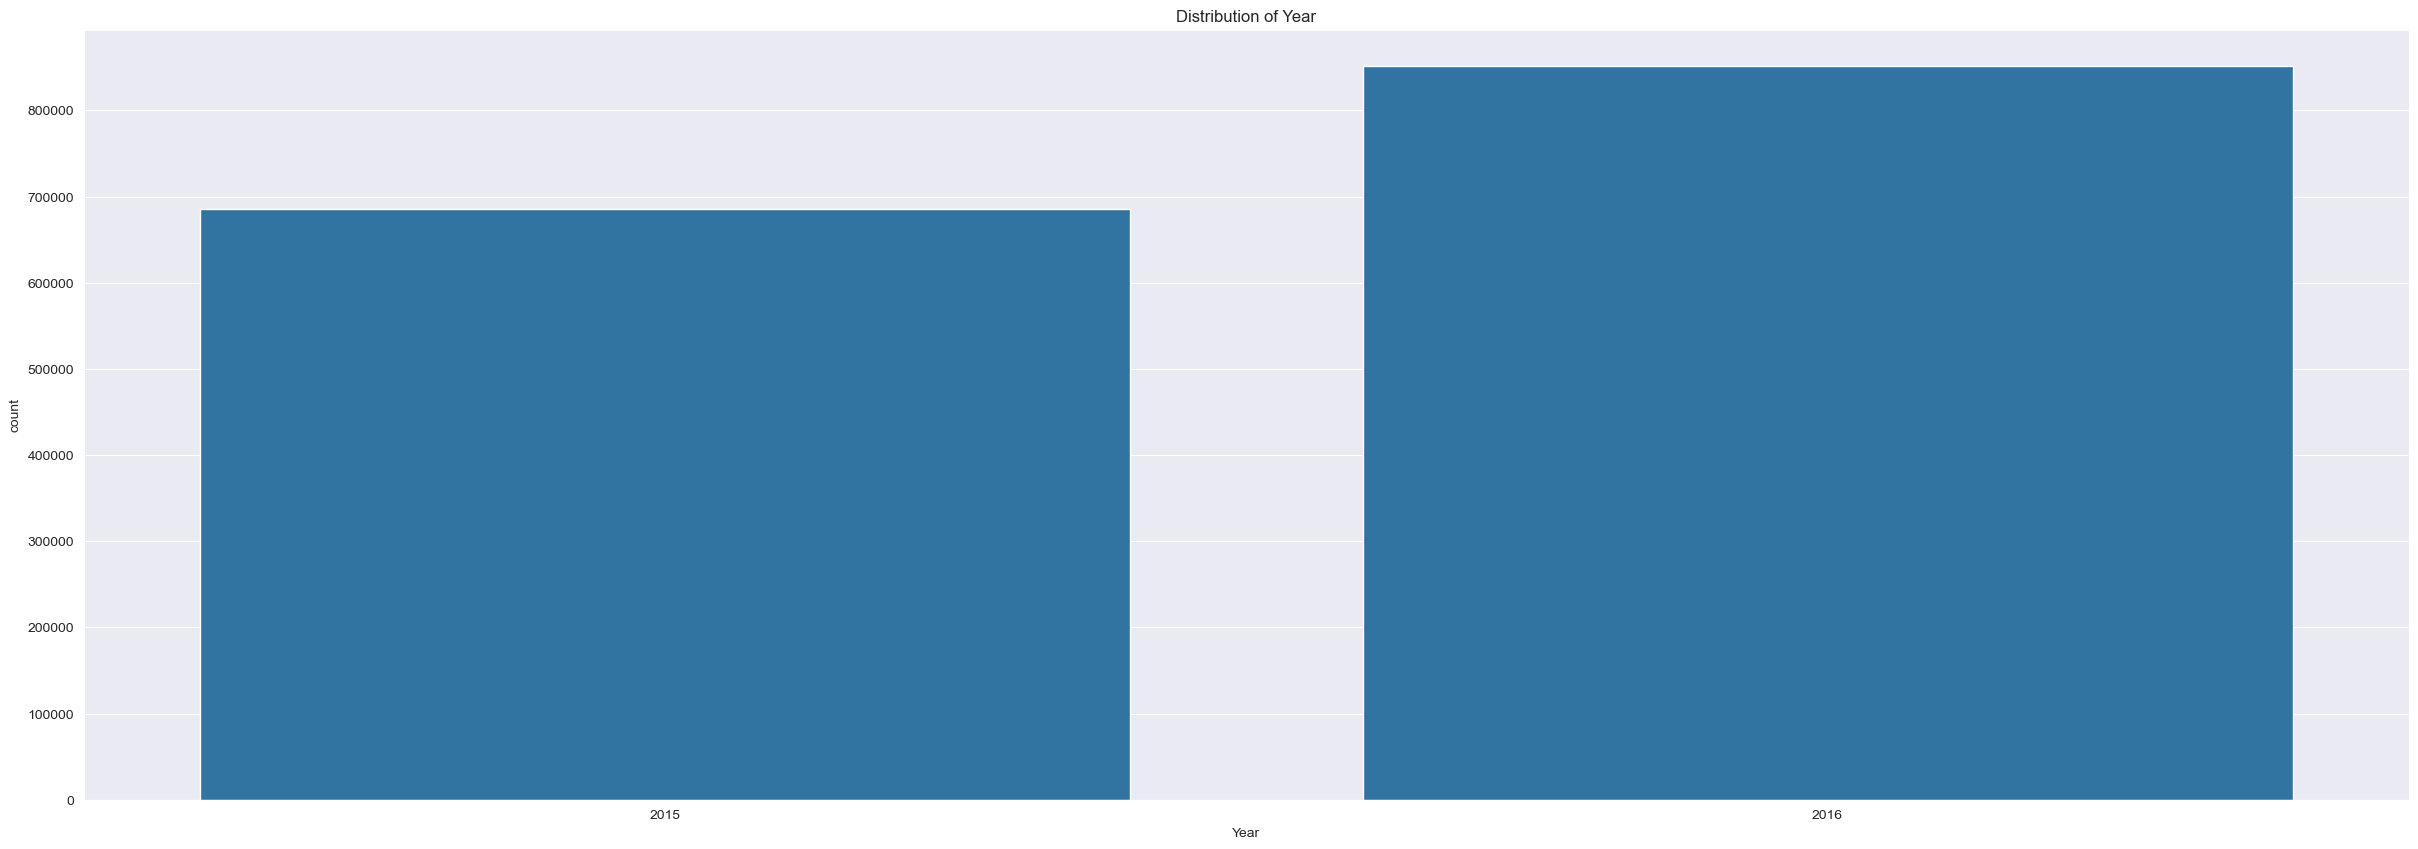

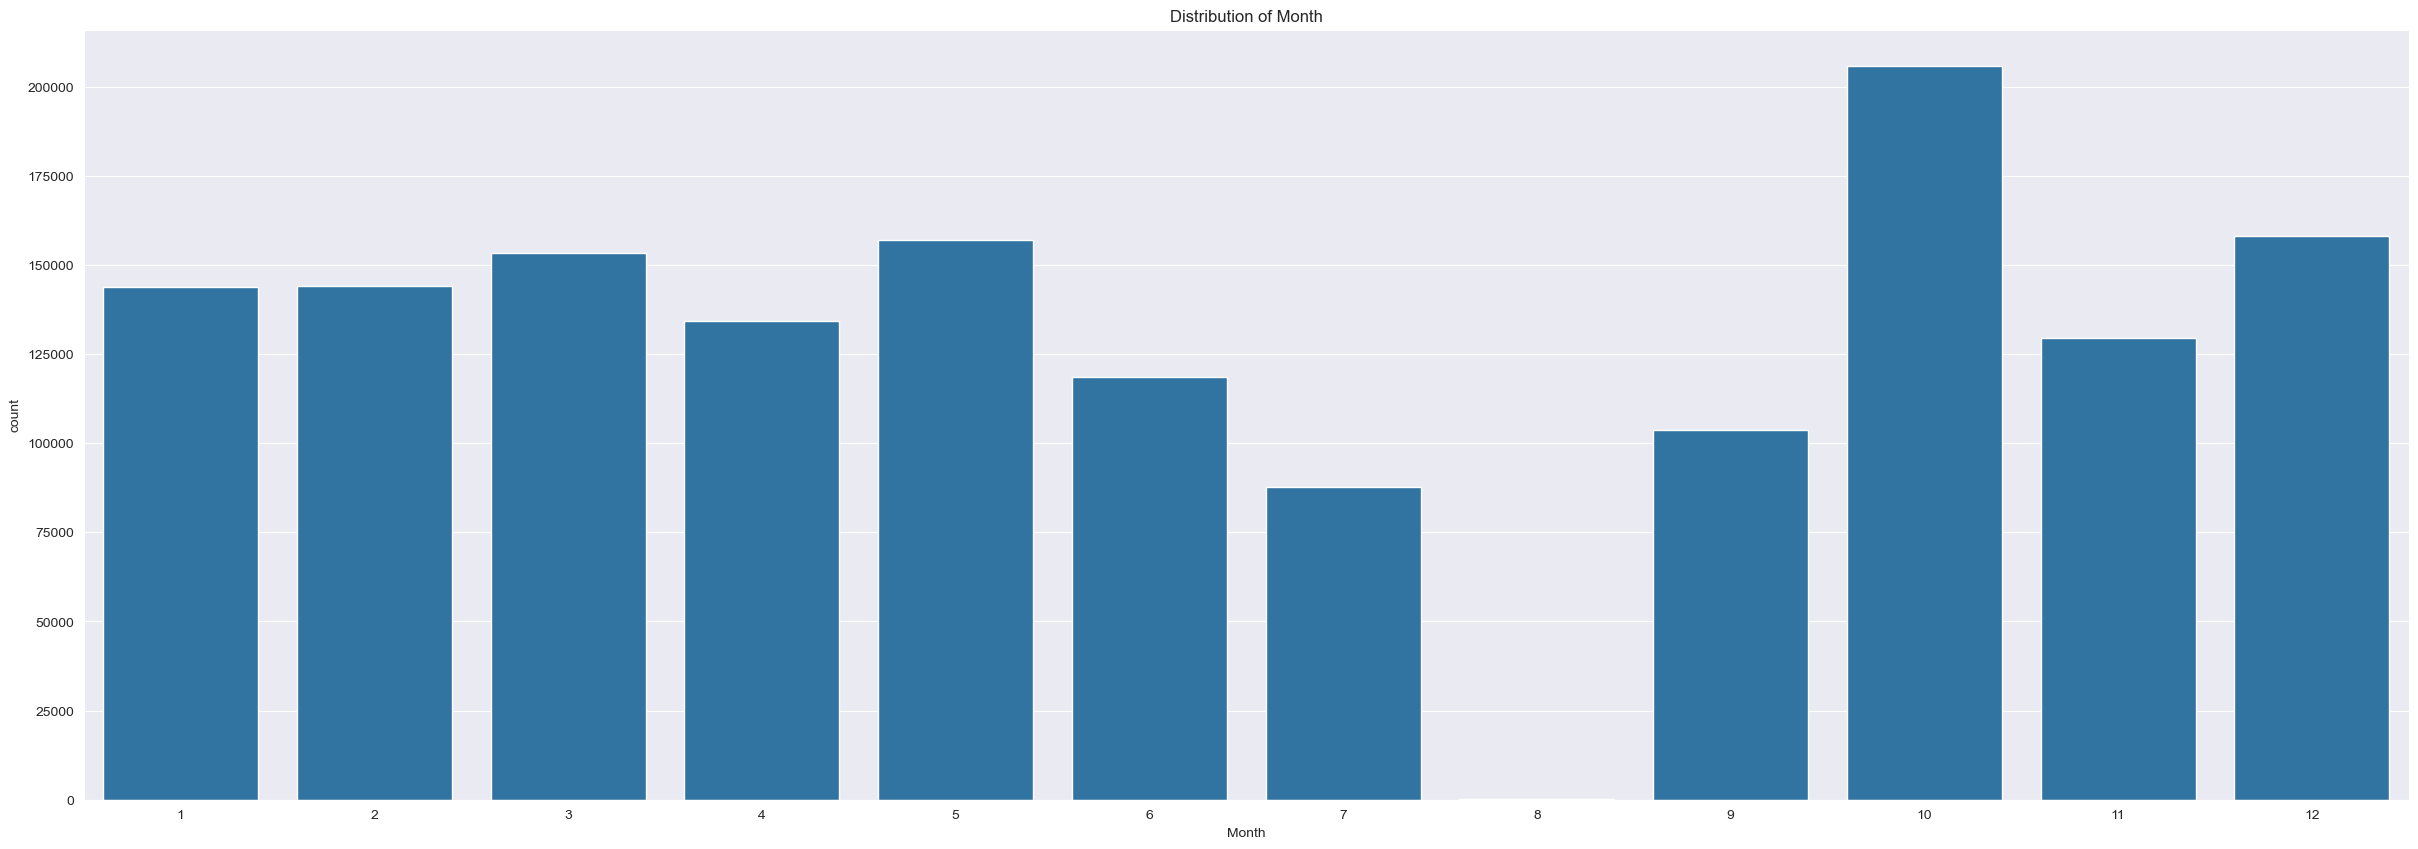

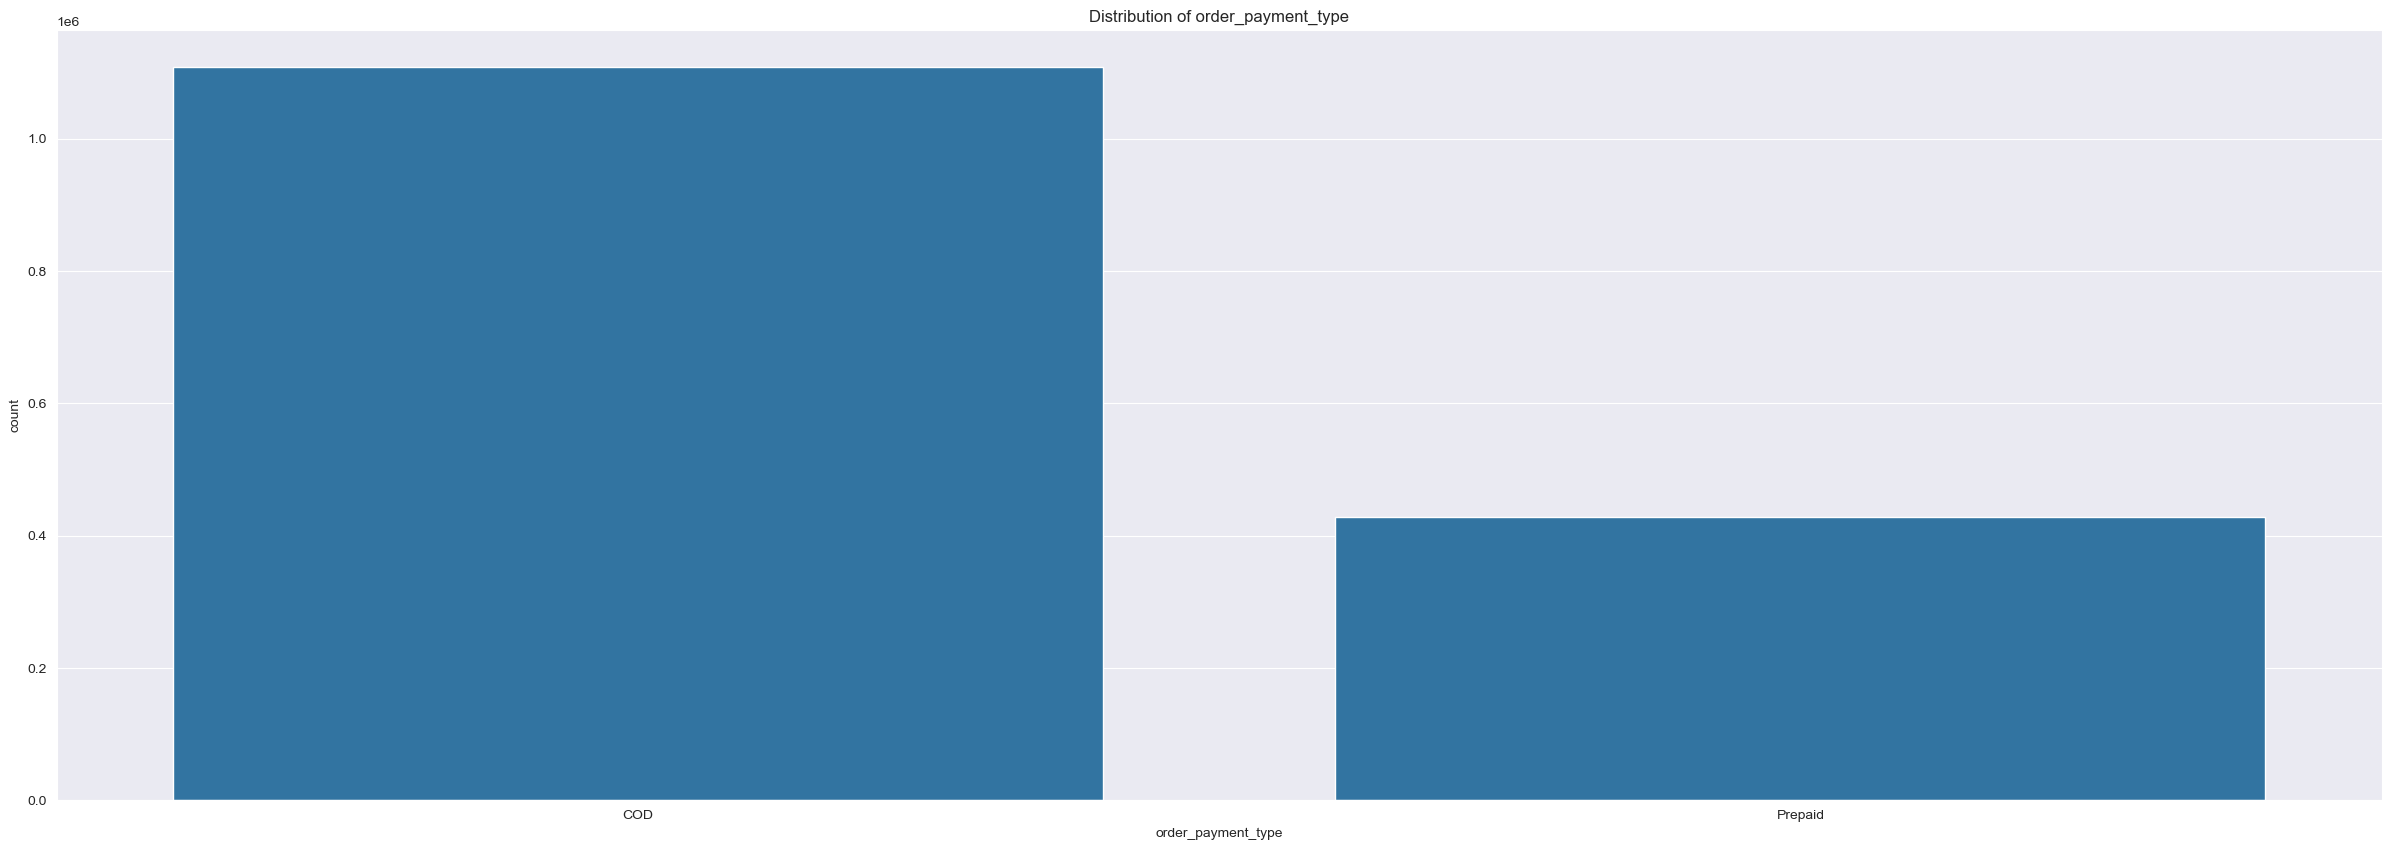

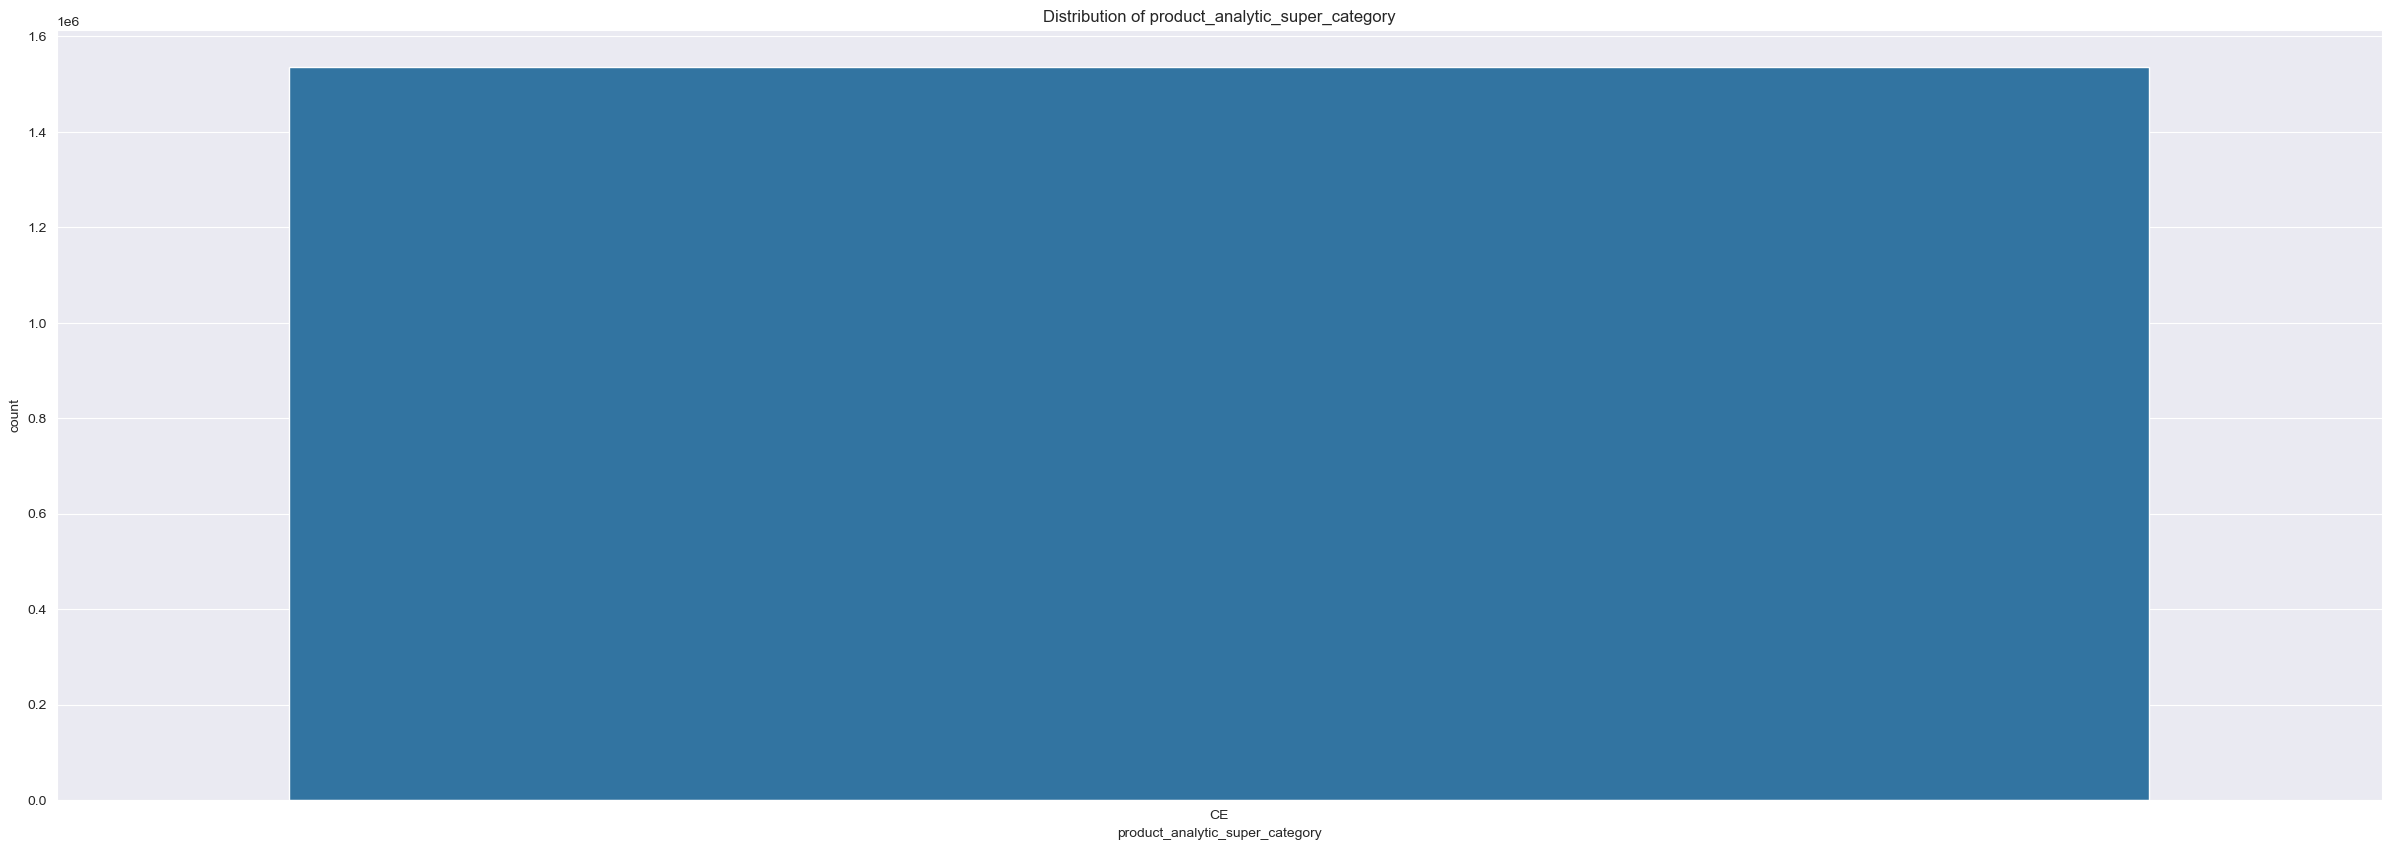

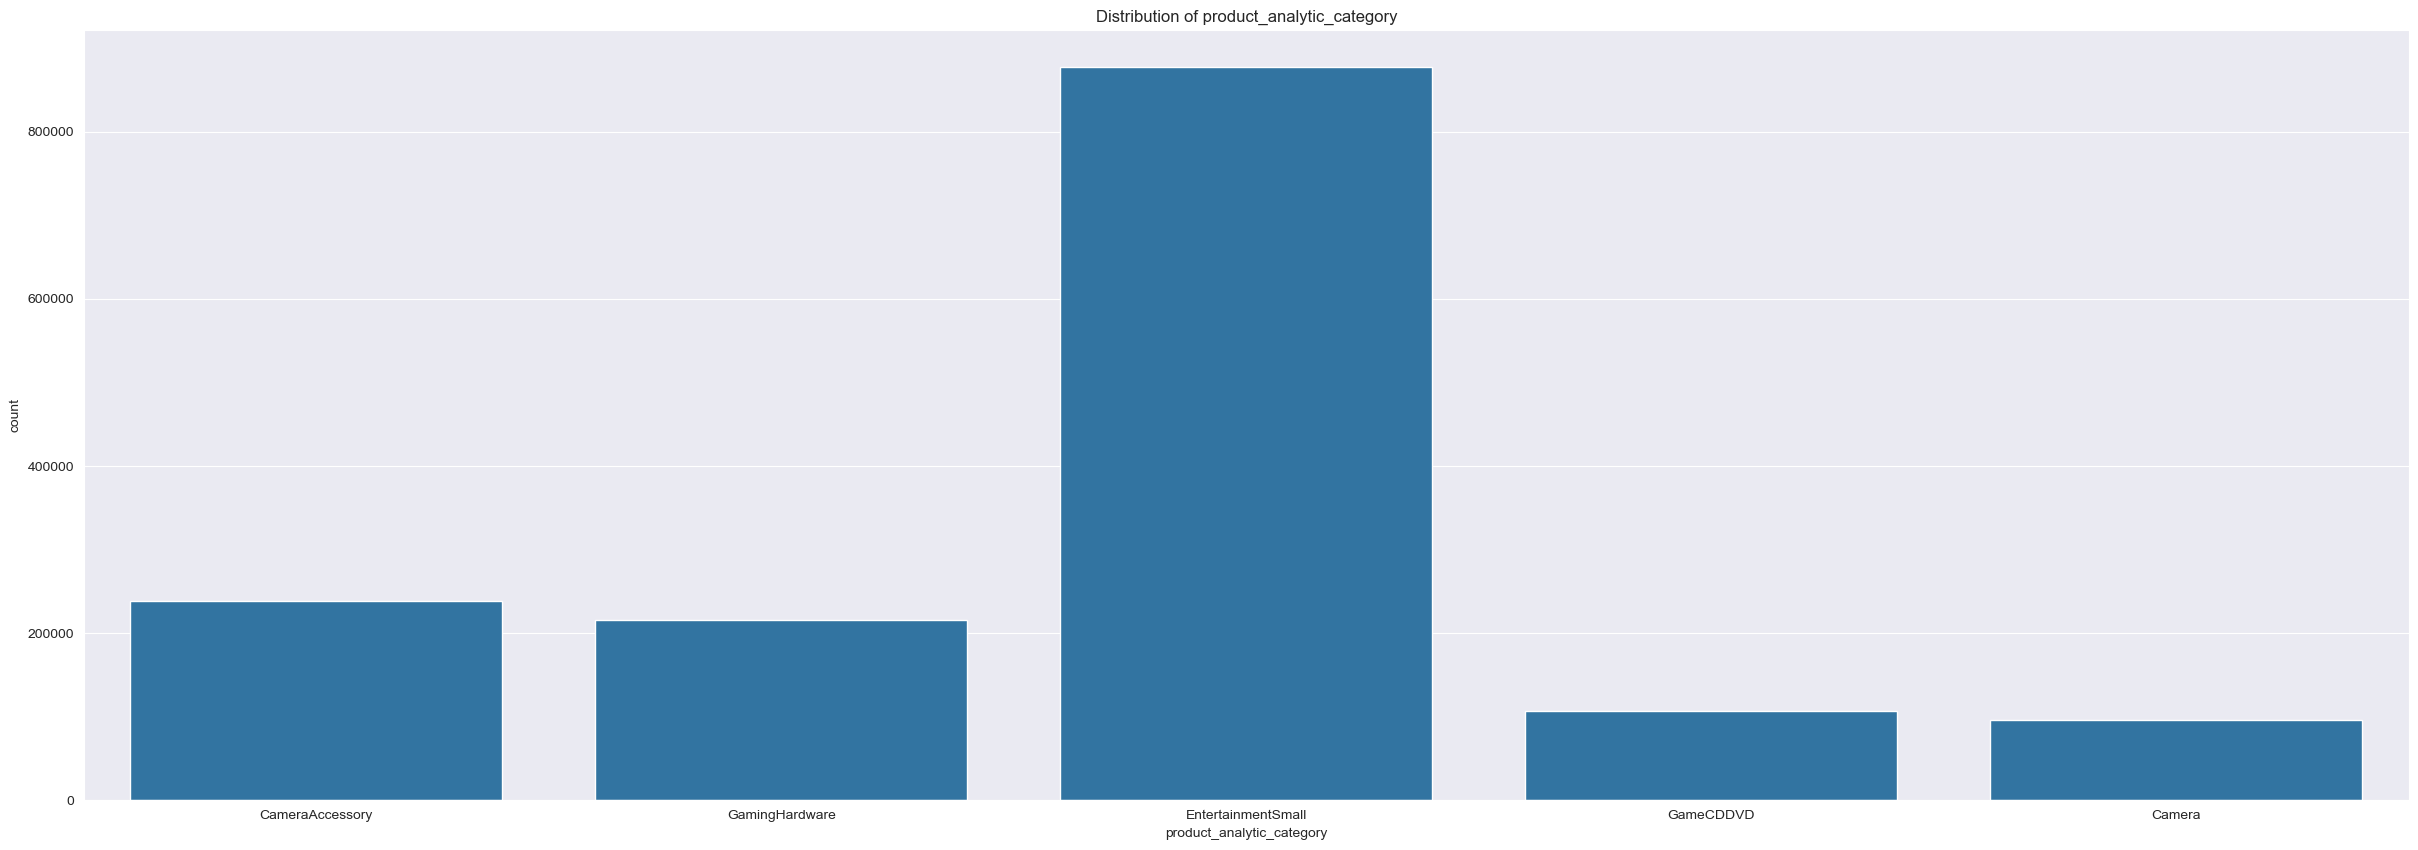

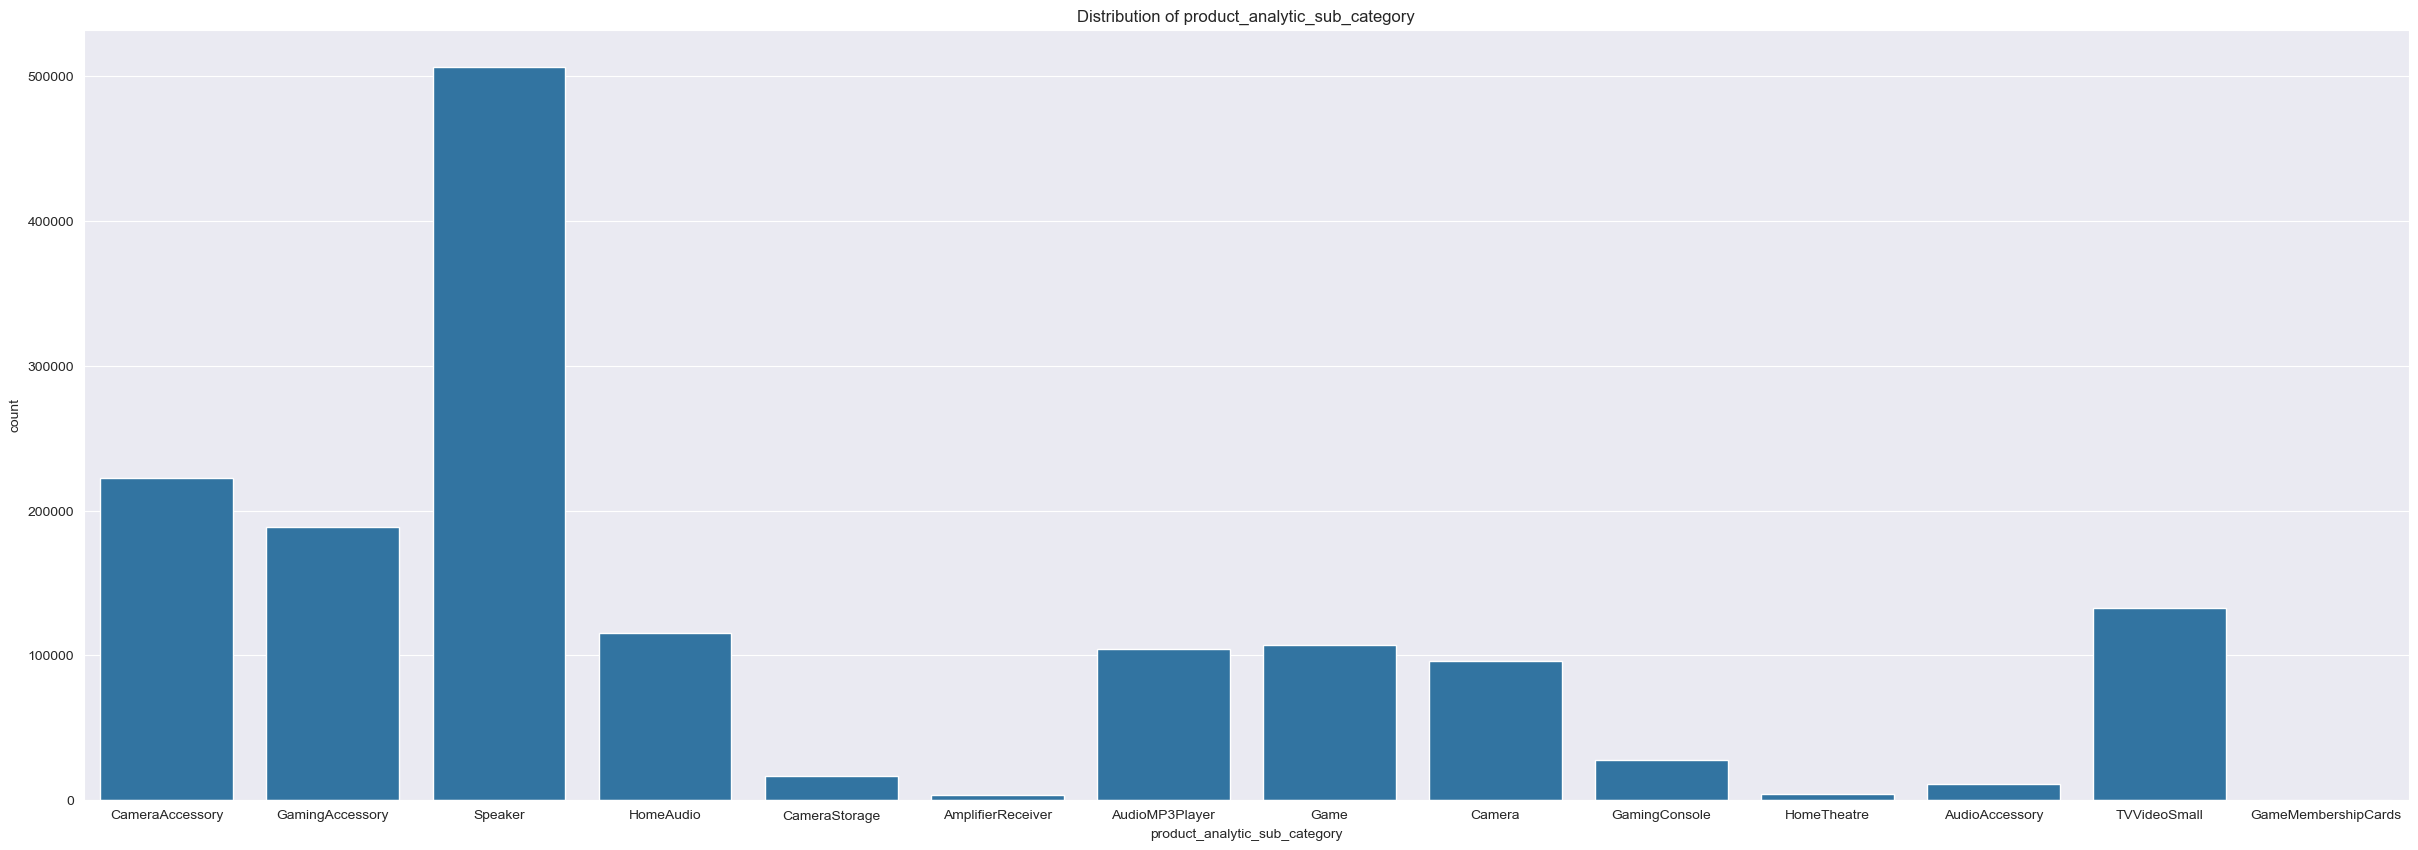

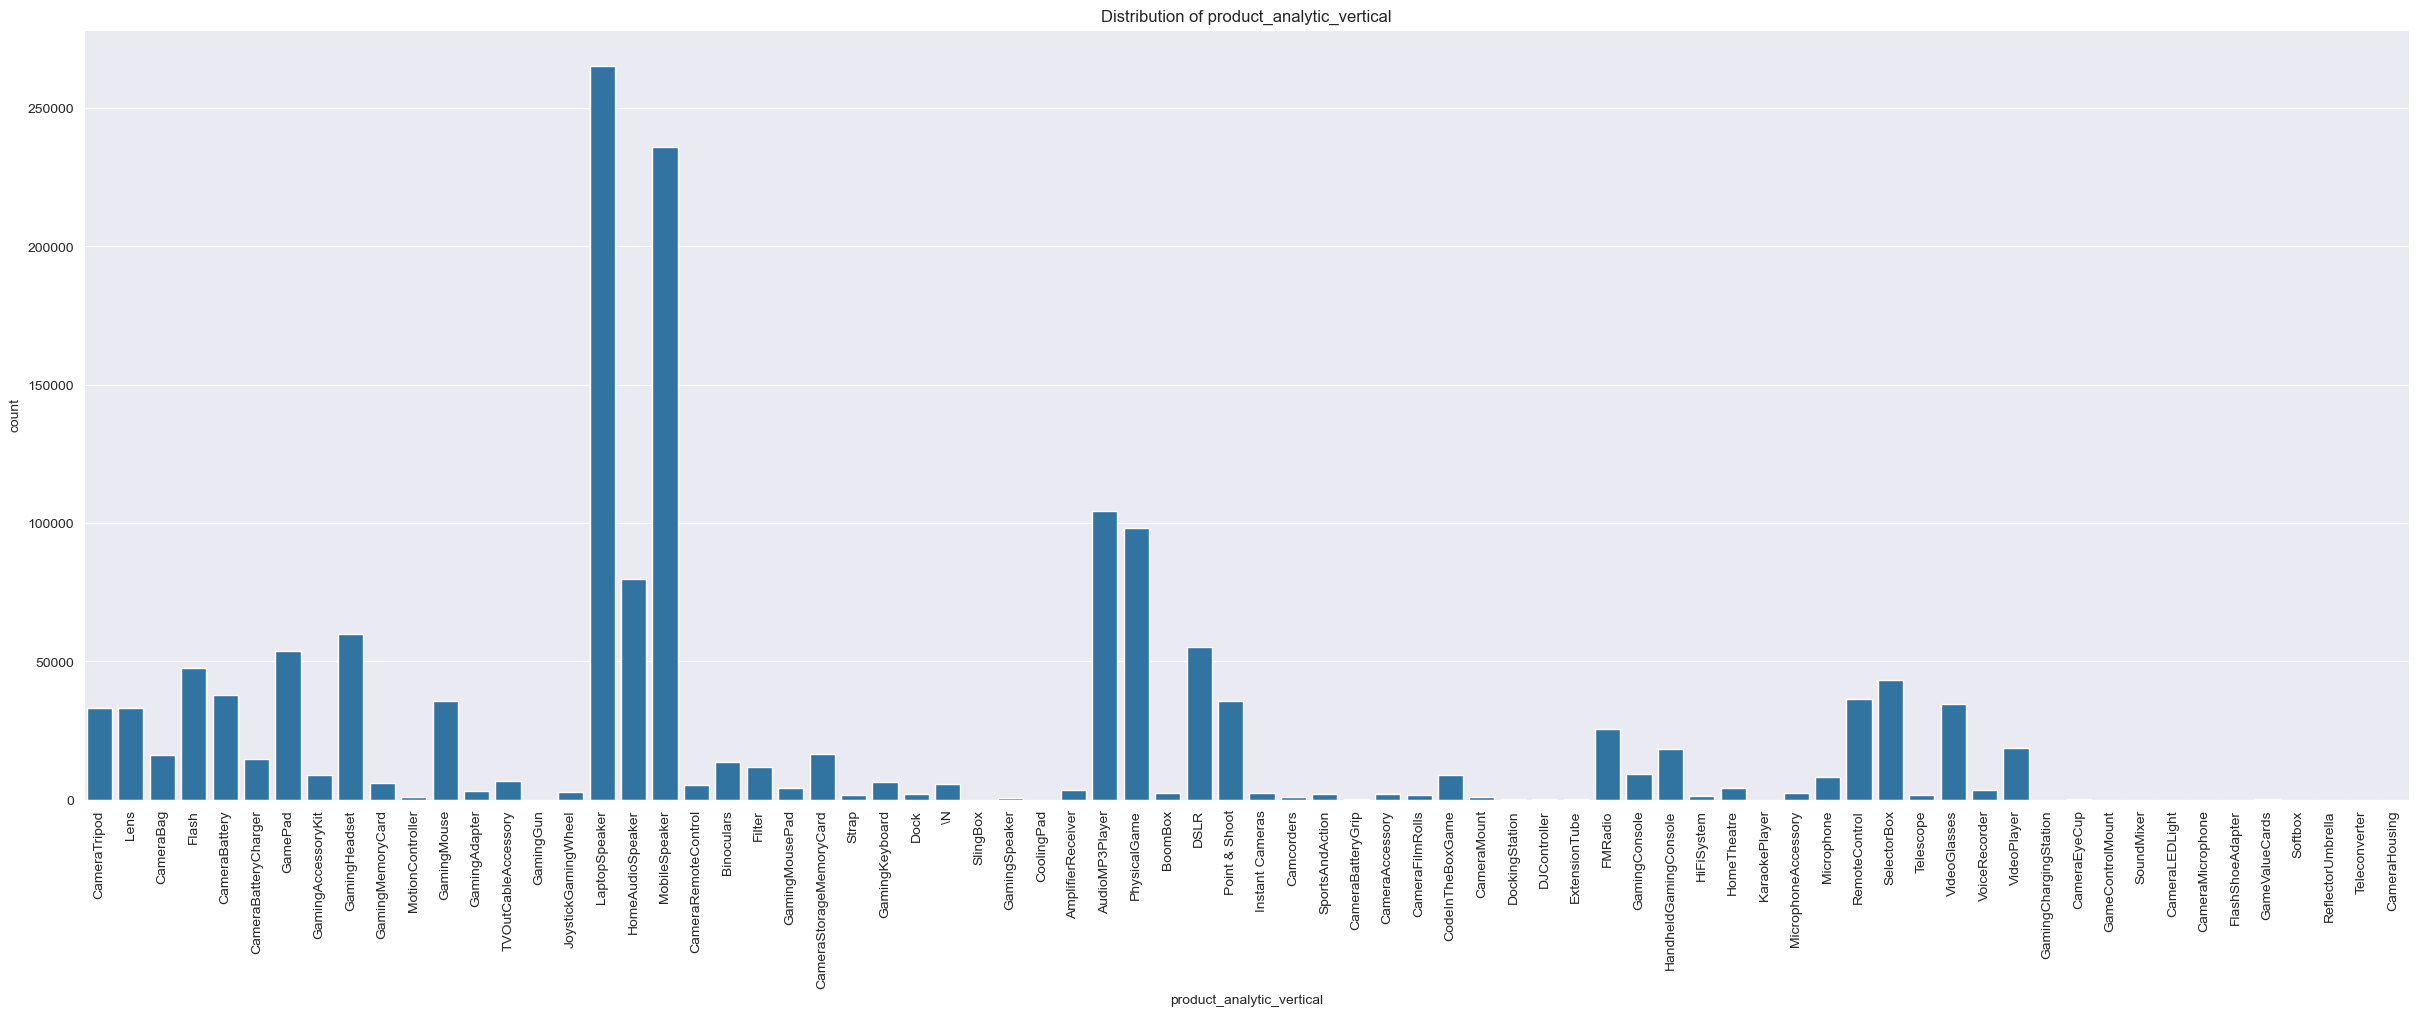

In [39]:
# Constructing Histplot of categorical Data
for col in cat_cols:
    plt.figure(figsize=(30, 10))
    sns.countplot(x=consumer_df[col])
    if(col == cat_cols[-1]):
        plt.xticks(rotation=90)
    plt.title('Distribution of ' + col)
    plt.show() 

#### Observations:
1. Order are more in 2016 than 2015
2. Oct(10) has more orders than Aug(8)
3. Orders with COD payment are significantly more than prepaid
4. 'product_analytic_super_category' has only one value
5. 'EntertainmentSmall' Category has more orders and 'Camera' has least orders 
6. 'Speaker' Sub Catefgory has more orders and 'GameMembershipCards' has least orders
7. 'LaptopSpeaker' Vertical has more orders and 'Teleconverter' has least orders

In [40]:
# Checking for null values
round(consumer_df[cat_cols].isnull().sum() / len(consumer_df) * 100, 2)

Year                              0.00
Month                             0.00
order_payment_type                0.00
product_analytic_super_category   0.00
product_analytic_category         0.00
product_analytic_sub_category     0.00
product_analytic_vertical         0.00
dtype: float64

#### Feature Engineering

In [41]:
# Creating a string order date column
consumer_df['order_date_string'] = consumer_df['order_date'].apply(lambda d: d.strftime('%d/%m/%Y'))

In [42]:
# Creating a Month_Year column which will help in merging other dataframes later
consumer_df['Month_Year'] = consumer_df['Month'].astype('str') + '/' + consumer_df['Year'].astype('str')

In [43]:
# checking Month_Year column
consumer_df['Month_Year'].head()

0    10/2015
1    10/2015
2    10/2015
3    10/2015
4    10/2015
Name: Month_Year, dtype: object

##### Sale Flag

In [44]:
sale_day_list = [
    '18/07/2015', '19/07/2015',
    '15/08/2015', '16/08/2015', '17/08/2015',
    '28/08/2015', '29/08/2015', '30/08/2015',
    '15/10/2015', '16/10/2015', '17/10/2015',
    '07/11/2015', '08/11/2015', '09/11/2015', '10/11/2015', '11/11/2015', '12/11/2015', '13/11/2015', '14/11/2015',
    '25/12/2015', '26/12/2015', '27/12/2015', '28/12/2015', '29/12/2015', '30/12/2015', '31/12/2015',
    '01/01/2016', '02/01/2016', '03/01/2016',
    '20/01/2016', '21/01/2016', '22/01/2016',
    '01/02/2016', '02/02/2016',
    '20/02/2016', '21/02/2016',
    '14/02/2016', '15/02/2016',
    '07/03/2016', '08/03/2016', '09/03/2016',
    '25/05/2016', '26/05/2016', '27/05/2016'
]

In [45]:
# Creating holiday flag
consumer_df['sale_day'] = consumer_df['order_date_string'].apply(lambda d: d in sale_day_list)

In [46]:
# Pay Period check
consumer_df['pay_day'] = consumer_df['order_date'].dt.day.apply(lambda d: True if d in (1, 15) else False)

In [47]:
# Buy Period
def buy_period(day):
    if day <= 5:
        return 'start_of_month'
    elif day == 15:
        return 'mid_month'
    elif day >= 28:
        return 'month_end'
    else:
        return 'normal'
        
consumer_df['buy_period'] = consumer_df['order_date'].dt.day.apply(buy_period)

In [48]:
# Weekend check
consumer_df['is_weekend'] = consumer_df['order_date'].dt.dayofweek.isin([5, 6])

In [49]:
# Check if product arrives late than SLA
consumer_df['sla_breach'] = (consumer_df['sla'] - consumer_df['deliverycdays_rsi']) >= 0

In [50]:
# Creating product sale price column
consumer_df['product_sale_price'] = round((consumer_df['gmv'] / consumer_df['units']), 2)

In [51]:
# Discount and discount percent column
consumer_df['discount'] = consumer_df['product_mrp'] - consumer_df['product_sale_price']
consumer_df['discount_percent'] = round(consumer_df['discount'] / consumer_df['product_mrp'], 2)

In [52]:
# Setting outliers as Premium Product
Q1 = consumer_df['product_sale_price'].quantile(0.25)
Q3 = consumer_df['product_sale_price'].quantile(0.75)
IQR = Q3 - Q1

consumer_df['premium_product'] = consumer_df['product_sale_price'] > Q3 + 1.5 * IQR

In [53]:
# Replacing '\\N' with GenericSpeaker
consumer_df['product_analytic_vertical'] = consumer_df['product_analytic_vertical'].apply(lambda ver: 'GenericSpeaker' if ver == '\\N' else ver)

In [54]:
# Creating a Week column staring from July, 2015
consumer_df['Week'] = ((consumer_df['order_date'] - pd.to_datetime('2015-07-01')).dt.days // 7) + 1

In [55]:
# Creating a reference df for matching Month_Year with Week (For Merging purposes)
week_ref_df = consumer_df[['Month_Year', 'Week']].copy()
week_ref_df.drop_duplicates(subset='Week', inplace=True)

In [56]:
# Creating a new dataframe by dropping the unnecessary columns
final_consumer_df = consumer_df.drop(['fsn_id', 'order_date', 'Year', 'Month', 'order_item_id',
                                      'cust_id', 'pincode', 'product_analytic_super_category', 'Month_Year', 'order_date_string'], 
                                     axis=1)

### Utilitarian Functions

In [57]:
# Function to return dummy values & drop 'product_analytic_category' & 'product_analytic_sub_category'
def prepare_dataset(param_df):
    # Seperating order_id column
    order_id = param_df['order_id']
    
    # Drop 'product_analytic_category' & 'product_analytic_sub_category'
    param_df = param_df.drop(['order_id', 'product_analytic_category', 'product_analytic_sub_category'], axis=1)

    # Listing object columns and boolean columns
    obj_cols = param_df.select_dtypes('object').columns
    bol_cols = param_df.select_dtypes('bool').columns

    # Converting Object to dummies
    param_df = pd.get_dummies(param_df, drop_first=True, columns=obj_cols, dtype=float)

    # Converting Boolean column to 1's and 0's
    param_df[bol_cols] = param_df[bol_cols].replace({True: 1, False: 0})
    param_df['order_id'] = order_id

    # Returning the updated dataframe
    return(param_df)

In [58]:
# Function to prepare data by grouping weekly data and aggregating based on column names
def prepare_weekly_data(param_df):
    
    # Columns that should be averaged
    mean_cols = [
        'product_sale_price', 'discount', 'product_mrp', 'deliverybdays_rsi',
        'deliverycdays_rsi', 'sla', 'product_procurement_sla'
    ]
    # Columns that should be counted
    count_col = ['order_id']
    # Columns that should be addded
    sum_cols = list(param_df.columns.difference(mean_cols + count_col))
    sum_cols.remove('Week')

    # Creating an aggregate dictionary
    agg_dict = {col  : 'mean' for col in mean_cols}
    agg_dict.update({col: 'sum' for col in sum_cols})
    agg_dict.update({col: 'count' for col in count_col})

    # Creating a sorted weekly groupby dataframe
    group_by_df = param_df.groupby('Week', sort=True, as_index=False).agg(agg_dict)

    # Retruning the groupby dataframe
    return(group_by_df)

### Creating sub dataframes

#### Creating Camera Accessory DataFrame

In [59]:
# Creating Camera Accessory Data Frame from 
camera_accessory_df = final_consumer_df[final_consumer_df['product_analytic_sub_category'] == 'CameraAccessory'].copy()

In [60]:
camera_accessory_df.head()

order_id     gmv  units order_payment_type  sla  \
0 3419300926147000.00 6400.00      1                COD    5   
1 1420830839915200.00 6900.00      1                COD    7   
2 2421912925714800.00 1990.00      1                COD   10   
3 4416592101738400.00 1690.00      1            Prepaid    4   
4 4419525153426400.00 1618.00      1            Prepaid    6   

  product_analytic_category product_analytic_sub_category  \
0           CameraAccessory               CameraAccessory   
1           CameraAccessory               CameraAccessory   
2           CameraAccessory               CameraAccessory   
3           CameraAccessory               CameraAccessory   
4           CameraAccessory               CameraAccessory   

  product_analytic_vertical  product_mrp  product_procurement_sla  ...  \
0              CameraTripod         7190                        0  ...   
1              CameraTripod         7190                        0  ...   
2              CameraTripod         2099                        3  ...   
3              CameraTripod         2099                        3  ...   
4              CameraTripod         2099                        3  ...   

   sale_day  pay_day  buy_period  is_weekend sla_breach  product_sale_price  \
0      True    False      normal        True       True             6400.00   
1     False    False      normal       False       True             6900.00   
2     False    False      normal       False       True             1990.00   
3     False    False      normal       False      False             1690.00   
4      True    False      normal        True       True             1618.00   

   discount  discount_percent  premium_product  Week  
0    790.00              0.11             True    16  
1    290.00              0.04             True    16  
2    109.00              0.05            False    16  
3    409.00              0.19            False    16  
4    481.00              0.23            False    16  

[5 rows x 22 columns]

In [61]:
# Preparing the dataset by creating dummies and grouping weekly data
camera_accessory_df = prepare_dataset(camera_accessory_df)
camera_accessory_df = prepare_weekly_data(camera_accessory_df)

In [62]:
# Creating Average Order Value column
camera_accessory_df['avg_order_value'] = camera_accessory_df['gmv'] / camera_accessory_df['order_id']

In [63]:
# Renaming Order Id to Order Quantity
camera_accessory_df.rename(columns={'order_id': 'order_qty'}, inplace=True)

In [64]:
camera_accessory_df.drop(['product_sale_price', 'units', 'product_mrp', 'order_qty'], axis = 1, inplace=True)

In [65]:
# Convert categorical columns to int as they are summed up dummies
cat_cols = camera_accessory_df.select_dtypes('object').columns
camera_accessory_df[cat_cols] = camera_accessory_df[cat_cols].astype('int')

In [66]:
camera_accessory_df.head()

Week  discount  deliverybdays_rsi  deliverycdays_rsi  sla  \
0     1   1139.44               4.36               5.05 5.91   
1     2   1024.52               4.50               5.22 7.19   
2     3   1037.45               4.48               5.27 6.24   
3     4    998.85               4.46               5.29 6.44   
4     5    944.43               4.54               5.26 6.50   

   product_procurement_sla  buy_period_month_end  buy_period_normal  \
0                     2.72                  0.00             520.00   
1                     2.63                  0.00            3338.00   
2                     2.68                  0.00            2739.00   
3                     2.67                414.00            2665.00   
4                     2.68               1268.00               0.00   

   buy_period_start_of_month  discount_percent  ...  \
0                      28.00            219.00  ...   
1                       0.00           1216.13  ...   
2                       0.00           1319.93  ...   
3                       0.00           1270.57  ...   
4                       2.00            511.35  ...   

   product_analytic_vertical_FlashShoeAdapter  product_analytic_vertical_Lens  \
0                                        0.00                           95.00   
1                                        0.00                          548.00   
2                                        0.00                          575.00   
3                                        0.00                          534.00   
4                                        0.00                          209.00   

   product_analytic_vertical_ReflectorUmbrella  \
0                                         0.00   
1                                         0.00   
2                                         0.00   
3                                         0.00   
4                                         0.00   

   product_analytic_vertical_Softbox  product_analytic_vertical_Strap  \
0                               0.00                             0.00   
1                               0.00                            20.00   
2                               0.00                            24.00   
3                               0.00                            23.00   
4                               0.00                            16.00   

   product_analytic_vertical_Teleconverter  \
0                                     0.00   
1                                     0.00   
2                                     0.00   
3                                     0.00   
4                                     0.00   

   product_analytic_vertical_Telescope  sale_day  sla_breach  avg_order_value  
0                                 4.00         0         371          1409.60  
1                                16.00         0        2376          1387.39  
2                                31.00       916        2140          1471.81  
3                                22.00         0        2067          1371.40  
4                                 8.00         0         860          1302.81  

[5 rows x 41 columns]

#### Creating Home Audio DataFrame

In [67]:
# Creating Home Audio Data Frame from 
home_audio_df = final_consumer_df[final_consumer_df['product_analytic_sub_category'] == 'HomeAudio'].copy()

In [68]:
# Preparing the dataset by creating dummies and grouping weekly data
home_audio_df = prepare_dataset(home_audio_df)
home_audio_df = prepare_weekly_data(home_audio_df)

In [69]:
# Creating Average Order Value column
home_audio_df['avg_order_value'] = home_audio_df['gmv'] / home_audio_df['order_id']

In [70]:
# Renaming Order Id to Order Quantity
home_audio_df.rename(columns={'order_id': 'order_qty'}, inplace=True)

In [71]:
home_audio_df.drop(['product_sale_price', 'units', 'product_mrp', 'order_qty'], axis = 1, inplace=True)

In [72]:
# Convert categorical columns to int as they are summed up dummies
cat_cols = home_audio_df.select_dtypes('object').columns
home_audio_df[cat_cols] = home_audio_df[cat_cols].astype('int')

In [73]:
home_audio_df.head()

Week  discount  deliverybdays_rsi  deliverycdays_rsi  sla  \
0     1   1321.15               4.30               4.96 6.42   
1     2   1271.38               4.51               5.15 7.45   
2     3   1388.55               4.57               5.29 6.99   
3     4   1304.58               4.53               5.26 7.17   
4     5   1385.25               4.53               5.36 7.37   

   product_procurement_sla  buy_period_month_end  buy_period_normal  \
0                     2.66                  0.00             377.00   
1                     2.70                  0.00            2563.00   
2                     2.70                  0.00            2088.00   
3                     2.71                323.00            1920.00   
4                     2.66                989.00               0.00   

   buy_period_start_of_month  discount_percent  ...  \
0                      40.00            131.34  ...   
1                       0.00            789.81  ...   
2                       0.00            792.71  ...   
3                       0.00            710.91  ...   
4                       1.00            314.93  ...   

   product_analytic_vertical_FMRadio  product_analytic_vertical_HiFiSystem  \
0                              83.00                                  7.00   
1                             630.00                                 28.00   
2                             565.00                                 42.00   
3                             602.00                                 28.00   
4                             260.00                                 16.00   

   product_analytic_vertical_HomeAudioSpeaker  \
0                                      293.00   
1                                     1692.00   
2                                     1624.00   
3                                     1442.00   
4                                      631.00   

   product_analytic_vertical_KaraokePlayer  \
0                                     0.00   
1                                     0.00   
2                                     0.00   
3                                     0.00   
4                                     0.00   

   product_analytic_vertical_SlingBox  product_analytic_vertical_SoundMixer  \
0                                0.00                                  0.00   
1                                0.00                                  0.00   
2                                0.00                                  0.00   
3                                0.00                                  0.00   
4                                0.00                                  0.00   

   product_analytic_vertical_VoiceRecorder  sale_day  sla_breach  \
0                                    14.00         0         297   
1                                    68.00         0        1865   
2                                    72.00       682        1732   
3                                    37.00         0        1616   
4                                    32.00         0         725   

   avg_order_value  
0          2362.22  
1          2170.64  
2          2232.15  
3          2090.04  
4          2179.74  

[5 rows x 28 columns]

#### Creating Gaming Accessory DataFrame

In [74]:
# Creating Gaming Accessory Data Frame from 
gaming_accessory_df = final_consumer_df[final_consumer_df['product_analytic_sub_category'] == 'GamingAccessory'].copy()

In [75]:
# Preparing the dataset by creating dummies and grouping weekly data
gaming_accessory_df = prepare_dataset(gaming_accessory_df)
gaming_accessory_df = prepare_weekly_data(gaming_accessory_df)

In [76]:
# Creating Average Order Value column
gaming_accessory_df['avg_order_value'] = gaming_accessory_df['gmv'] / gaming_accessory_df['order_id']

In [77]:
# Renaming Order Id to Order Quantity
gaming_accessory_df.rename(columns={'order_id': 'order_qty'}, inplace=True)

In [78]:
gaming_accessory_df.drop(['product_sale_price', 'units', 'product_mrp', 'order_qty'], axis = 1, inplace=True)

In [79]:
# Convert categorical columns to int as they are summed up dummies
cat_cols = gaming_accessory_df.select_dtypes('object').columns
gaming_accessory_df[cat_cols] = gaming_accessory_df[cat_cols].astype('int')

In [80]:
gaming_accessory_df.head()

Week  discount  deliverybdays_rsi  deliverycdays_rsi  sla  \
0     1    940.02               4.43               5.27 4.10   
1     2    848.25               4.54               5.23 5.98   
2     3   1111.26               4.59               5.33 5.04   
3     4   1106.63               4.53               5.23 5.33   
4     5   5146.52               4.61               5.31 5.57   

   product_procurement_sla  buy_period_month_end  buy_period_normal  \
0                     3.23                  0.00             948.00   
1                     2.75                  0.00            2760.00   
2                     2.58                  0.00            2587.00   
3                     2.25                353.00            2220.00   
4                     3.37               1163.00               0.00   

   buy_period_start_of_month  discount_percent  ...  \
0                      32.00            433.44  ...   
1                       0.00            977.27  ...   
2                       0.00           1108.73  ...   
3                       0.00            912.81  ...   
4                       3.00            501.78  ...   

   product_analytic_vertical_GamingMemoryCard  \
0                                        1.00   
1                                       45.00   
2                                       40.00   
3                                       28.00   
4                                       12.00   

   product_analytic_vertical_GamingMouse  \
0                                 430.00   
1                                 636.00   
2                                 377.00   
3                                 476.00   
4                                 159.00   

   product_analytic_vertical_GamingMousePad  \
0                                     73.00   
1                                    130.00   
2                                    102.00   
3                                    104.00   
4                                     39.00   

   product_analytic_vertical_GamingSpeaker  \
0                                     0.00   
1                                     0.00   
2                                     0.00   
3                                     1.00   
4                                     0.00   

   product_analytic_vertical_JoystickGamingWheel  \
0                                           3.00   
1                                          15.00   
2                                          16.00   
3                                          23.00   
4                                          15.00   

   product_analytic_vertical_MotionController  \
0                                        2.00   
1                                       32.00   
2                                       21.00   
3                                       16.00   
4                                        8.00   

   product_analytic_vertical_TVOutCableAccessory  sale_day  sla_breach  \
0                                          18.00         0         403   
1                                          99.00         0        1675   
2                                          93.00       775        1527   
3                                         101.00         0        1481   
4                                          46.00         0         689   

   avg_order_value  
0           832.95  
1           954.09  
2           834.26  
3          1081.64  
4          1034.24  

[5 rows x 33 columns]

### Other Datasets

#### Weather Data

In [81]:
# Reading Weather data
weather_2015 = pd.read_csv('ONTARIO-2015.csv', encoding="ISO-8859-1", skiprows=24)
weather_2016 = pd.read_csv('ONTARIO-2016.csv', encoding="ISO-8859-1", skiprows=24)

In [82]:
# Creating weather dataframe with 2015 and 2016 data
weather_df = pd.concat([weather_2015, weather_2016], ignore_index=True)

In [83]:
weather_df.head()

Date/Time  Year  Month  Day Data Quality  Max Temp (Â°C) Max Temp Flag  \
0  2015-01-01  2015      1    1          â             0.00           NaN   
1  2015-01-02  2015      1    2          â             3.00           NaN   
2  2015-01-03  2015      1    3          â             2.50           NaN   
3  2015-01-04  2015      1    4          â             2.50           NaN   
4  2015-01-05  2015      1    5          â           -10.00           NaN   

   Min Temp (Â°C) Min Temp Flag  Mean Temp (Â°C)  ... Total Snow (cm)  \
0           -8.50           NaN            -4.30  ...            0.00   
1           -3.00           NaN             0.00  ...            0.00   
2           -4.00           NaN            -0.80  ...            0.00   
3            0.00           NaN             1.30  ...            1.00   
4          -13.50           NaN           -11.80  ...            3.00   

   Total Snow Flag Total Precip (mm)  Total Precip Flag Snow on Grnd (cm)  \
0              NaN              0.00                NaN              0.00   
1              NaN              0.00                NaN              0.00   
2              NaN             24.00                NaN              0.00   
3              NaN              1.00                NaN              0.00   
4              NaN              3.00                NaN              1.00   

   Snow on Grnd Flag Dir of Max Gust (10s deg)  Dir of Max Gust Flag  \
0                NaN                       NaN                   NaN   
1                NaN                       NaN                   NaN   
2                NaN                       NaN                   NaN   
3                NaN                       NaN                   NaN   
4                NaN                       NaN                   NaN   

  Spd of Max Gust (km/h)  Spd of Max Gust Flag  
0                    NaN                   NaN  
1                    NaN                   NaN  
2                    NaN                   NaN  
3                    NaN                   NaN  
4                    NaN                   NaN  

[5 rows x 27 columns]

In [84]:
# Selecting only required columns
weather_df = weather_df[['Date/Time', 'Year', 'Month', 'Day', 
                         'Max Temp (Â°C)', 'Min Temp (Â°C)', 'Mean Temp (Â°C)', 
                         'Heat Deg Days (Â°C)', 'Cool Deg Days (Â°C)', 'Total Rain (mm)', 
                         'Total Snow (cm)', 'Total Precip (mm)', 'Snow on Grnd (cm)']]

weather_df.columns = ['Date', 'Year', 'Month', 'Day', 
                      'max_temp_c', 'min_temp_c', 'mean_temp_c', 
                      'heat_deg_days', 'cool_deg_days', 'total_rain_mm', 
                      'total_snow_cm', 'total_precip_mm', 'snow_on_ground_cm']

In [85]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               731 non-null    object 
 1   Year               731 non-null    int64  
 2   Month              731 non-null    int64  
 3   Day                731 non-null    int64  
 4   max_temp_c         442 non-null    float64
 5   min_temp_c         409 non-null    float64
 6   mean_temp_c        409 non-null    float64
 7   heat_deg_days      409 non-null    float64
 8   cool_deg_days      409 non-null    float64
 9   total_rain_mm      456 non-null    float64
 10  total_snow_cm      456 non-null    float64
 11  total_precip_mm    456 non-null    float64
 12  snow_on_ground_cm  456 non-null    float64
dtypes: float64(9), int64(3), object(1)
memory usage: 74.4+ KB


In [86]:
weather_df['Date'] = pd.to_datetime(weather_df['Date'])

In [87]:
# Keeping date range from 2015-07-01 to 2016-06-30

# Define date range
start_date = '2015-07-01'
end_date = '2016-06-30'

# Filter DataFrame
weather_df = weather_df[(weather_df['Date'] >= start_date) & (weather_df['Date'] <= end_date)].copy()

In [88]:
# Check start and end date of dataframe
print('Start date: {} and end date: {}'.format(weather_df['Date'].min(), weather_df['Date'].max()))

Start date: 2015-07-01 00:00:00 and end date: 2016-06-30 00:00:00


In [89]:
# Creating a Week column staring from July, 2015
weather_df['Week'] = ((weather_df['Date'] - pd.to_datetime('2015-07-01')).dt.days // 7) + 1

In [90]:
# Creating a Month_Year column
weather_df['Month_Year'] = weather_df['Month'].astype('str') + '/' + weather_df['Year'].astype('str')

In [91]:
weather_df.head()

Date  Year  Month  Day  max_temp_c  min_temp_c  mean_temp_c  \
181 2015-07-01  2015      7    1       24.50       17.00        20.80   
182 2015-07-02  2015      7    2       24.00       14.00        19.00   
183 2015-07-03  2015      7    3       25.00       10.00        17.50   
184 2015-07-04  2015      7    4       26.00       11.00        18.50   
185 2015-07-05  2015      7    5       28.00       14.00        21.00   

     heat_deg_days  cool_deg_days  total_rain_mm  total_snow_cm  \
181           0.00           2.80           0.00           0.00   
182           0.00           1.00           0.00           0.00   
183           0.50           0.00           0.00           0.00   
184           0.00           0.50           0.00           0.00   
185           0.00           3.00           0.00           0.00   

     total_precip_mm  snow_on_ground_cm  Week Month_Year  
181             0.00               0.00     1     7/2015  
182             0.00               0.00     1     7/2015  
183             0.00               0.00     1     7/2015  
184             0.00               0.00     1     7/2015  
185             0.00               0.00     1     7/2015

In [92]:
# Checking for null values
weather_df.isnull().sum()/len(weather_df) * 100

Date                 0.00
Year                 0.00
Month                0.00
Day                  0.00
max_temp_c          43.17
min_temp_c          47.81
mean_temp_c         47.81
heat_deg_days       47.81
cool_deg_days       47.81
total_rain_mm       41.26
total_snow_cm       41.26
total_precip_mm     41.26
snow_on_ground_cm   41.26
Week                 0.00
Month_Year           0.00
dtype: float64

In [93]:
# Defining null columns
null_cols = ['max_temp_c', 'min_temp_c', 'mean_temp_c', 
            'heat_deg_days', 'cool_deg_days', 'total_rain_mm',
            'total_snow_cm', 'total_precip_mm', 'snow_on_ground_cm']

In [94]:
# Filling null columns with Monthly mean as the null percentage is quite high
weather_df[null_cols] = weather_df.groupby('Month_Year')[null_cols].transform(lambda x: x.fillna(x.mean()))

In [95]:
# Rechecking for null removal
weather_df.isnull().sum()

Date                 0
Year                 0
Month                0
Day                  0
max_temp_c           0
min_temp_c           0
mean_temp_c          0
heat_deg_days        0
cool_deg_days        0
total_rain_mm        0
total_snow_cm        0
total_precip_mm      0
snow_on_ground_cm    0
Week                 0
Month_Year           0
dtype: int64

In [96]:
weather_df.drop(['Date', 'Year', 'Month', 'Day', 'Month_Year'], axis=1, inplace=True)

In [97]:
weather_df.head()

max_temp_c  min_temp_c  mean_temp_c  heat_deg_days  cool_deg_days  \
181       24.50       17.00        20.80           0.00           2.80   
182       24.00       14.00        19.00           0.00           1.00   
183       25.00       10.00        17.50           0.50           0.00   
184       26.00       11.00        18.50           0.00           0.50   
185       28.00       14.00        21.00           0.00           3.00   

     total_rain_mm  total_snow_cm  total_precip_mm  snow_on_ground_cm  Week  
181           0.00           0.00             0.00               0.00     1  
182           0.00           0.00             0.00               0.00     1  
183           0.00           0.00             0.00               0.00     1  
184           0.00           0.00             0.00               0.00     1  
185           0.00           0.00             0.00               0.00     1

In [98]:
weather_df = weather_df.groupby('Week').aggregate({
        'max_temp_c': 'max',
        'min_temp_c': 'min',
        'mean_temp_c': 'mean',
        'heat_deg_days': 'mean',
        'cool_deg_days': 'mean',
        'total_rain_mm': 'sum',
        'total_snow_cm': 'sum',
        'total_precip_mm': 'sum',
        'snow_on_ground_cm': 'sum'
    }).reset_index()

In [99]:
weather_df.head()

Week  max_temp_c  min_temp_c  mean_temp_c  heat_deg_days  cool_deg_days  \
0     1       28.00       10.00        20.11           0.08           2.19   
1     2       29.00       12.50        20.70           0.25           2.95   
2     3       33.00       11.00        22.75           0.01           4.77   
3     4       33.50       14.50        23.47           0.01           5.48   
4     5       33.50       15.00        23.51           0.02           5.54   

   total_rain_mm  total_snow_cm  total_precip_mm  snow_on_ground_cm  
0          10.09           0.00            10.09               0.00  
1          21.19           0.00            21.19               0.00  
2           8.09           0.00             8.09               0.00  
3           5.40           0.00             5.40               0.00  
4          32.87           0.00            32.87               0.00

#### Media Investment Dataset

In [100]:
media_investment_df = pd.read_excel('Media data and other information.xlsx', 'Media Investment', skiprows=2)

In [101]:
media_investment_df.head()

Unnamed: 0  Year  Month  Total Investment   TV  Digital  Sponsorship  \
0         NaN  2015      7             17.06 0.22     2.53         7.41   
1         NaN  2015      8              5.06 0.01     1.28         1.06   
2         NaN  2015      9             96.25 3.88     1.36        62.79   
3         NaN  2015     10            170.16 6.14    12.62        84.67   
4         NaN  2015     11             51.22 4.22     1.28        14.17   

   Content Marketing  Online marketing   Affiliates   SEM  Radio  Other  
0               0.00              1.33         0.55  5.02    NaN    NaN  
1               0.00              0.13         0.07  2.51    NaN    NaN  
2               0.61             16.38         5.04  6.20    NaN    NaN  
3               3.44             24.37         6.97 31.93    NaN    NaN  
4               0.17             19.56         6.60  5.22    NaN    NaN

In [102]:
media_investment_df.drop('Unnamed: 0', axis=1, inplace=True)

In [103]:
media_investment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               12 non-null     int64  
 1   Month              12 non-null     int64  
 2   Total Investment   12 non-null     float64
 3   TV                 12 non-null     float64
 4   Digital            12 non-null     float64
 5   Sponsorship        12 non-null     float64
 6   Content Marketing  12 non-null     float64
 7   Online marketing   12 non-null     float64
 8    Affiliates        12 non-null     float64
 9   SEM                12 non-null     float64
 10  Radio              3 non-null      float64
 11  Other              3 non-null      float64
dtypes: float64(10), int64(2)
memory usage: 1.3 KB


In [104]:
media_investment_df.columns = ['Year', 'Month', 'Total_investment', 
                               'TV', 'Digital', 'Sponsorship', 
                               'Content_marketing', 'Online_marketing', 'Affiliates', 
                               'SEM', 'Radio', 'Other']

In [105]:
null_rows = media_investment_df[media_investment_df.isnull().any(axis=1)].copy()

In [106]:
null_rows['non_nan_sum'] = null_rows[['TV', 'Digital', 'Sponsorship', 'Content_marketing', 'Online_marketing', 'Affiliates', 'SEM']].sum(axis=1)
null_rows['diff'] = null_rows['Total_investment'] - null_rows['non_nan_sum']
null_rows[(null_rows['diff'] > 0)]

Year  Month  Total_investment   TV  Digital  Sponsorship  \
11  2016      6             42.83 1.66     1.42        25.05   

    Content_marketing  Online_marketing  Affiliates  SEM  Radio  Other  \
11               0.05              7.97        2.77 3.74    NaN    NaN   

    non_nan_sum  diff  
11        42.65  0.18

In [107]:
# Filling 0 Radio and Other
media_investment_df.fillna(0, inplace=True)

In [108]:
# Also for 12th row, will impute Radio and Other with 0.09 each(Equally dividing investment of 0.18)
media_investment_df.loc[11, ['Radio', 'Other']] = 0.09

In [109]:
# Rechecking for null values
media_investment_df.isnull().sum()

Year                 0
Month                0
Total_investment     0
TV                   0
Digital              0
Sponsorship          0
Content_marketing    0
Online_marketing     0
Affiliates           0
SEM                  0
Radio                0
Other                0
dtype: int64

In [110]:
# Creating Month Year column for future merging purposes
media_investment_df['Month_Year'] = media_investment_df['Month'].astype(str) + '/' + media_investment_df['Year'].astype(str)

In [111]:
# Dropping Year and Month as they will no longer be required
media_investment_df.drop(['Year', 'Month'], axis=1, inplace=True)

In [112]:
week_ref = week_ref_df.groupby('Month_Year')['Week'].count()

def get_weekly_value(param_series):
    new_value = []
    for i in range(len(param_series)):
        val = param_series.iloc[i]
        week_count_val = week_ref[media_investment_df['Month_Year'].iloc[i]]
        val = val/week_count_val
        new_value.append(val)
    return(new_value)

In [113]:
investment_cols = ['Total_investment', 'TV', 'Digital', 
 'Sponsorship', 'Content_marketing', 'Online_marketing', 
 'Affiliates', 'SEM', 'Radio', 'Other']

In [114]:
media_investment_df[investment_cols] = get_weekly_value(media_investment_df[investment_cols])

In [115]:
media_investment_df.head()

Total_investment   TV  Digital  Sponsorship  Content_marketing  \
0              3.41 0.04     0.51         1.48               0.00   
1              1.27 0.00     0.32         0.27               0.00   
2             24.06 0.97     0.34        15.70               0.15   
3             34.03 1.23     2.52        16.93               0.69   
4             12.80 1.06     0.32         3.54               0.04   

   Online_marketing  Affiliates  SEM  Radio  Other Month_Year  
0              0.27        0.11 1.00   0.00   0.00     7/2015  
1              0.03        0.02 0.63   0.00   0.00     8/2015  
2              4.09        1.26 1.55   0.00   0.00     9/2015  
3              4.87        1.39 6.39   0.00   0.00    10/2015  
4              4.89        1.65 1.31   0.00   0.00    11/2015

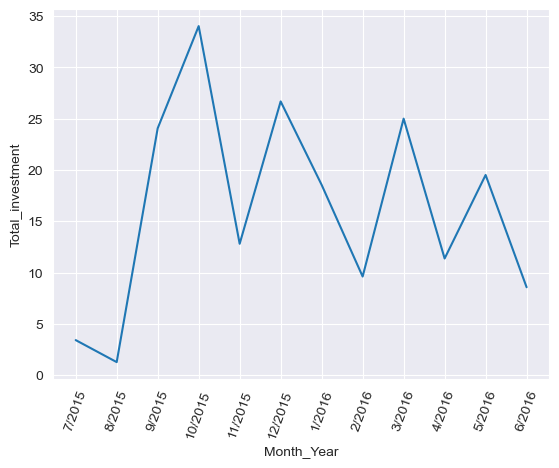

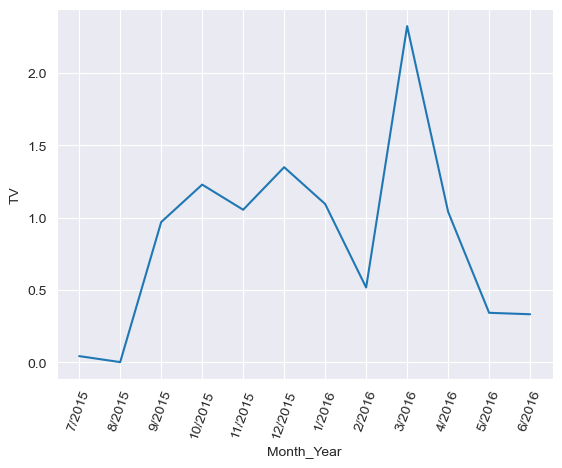

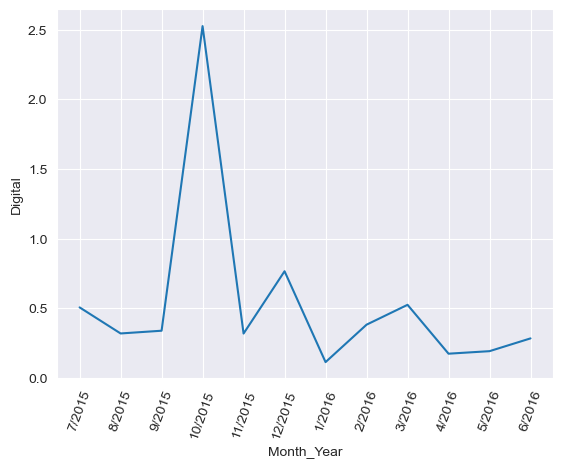

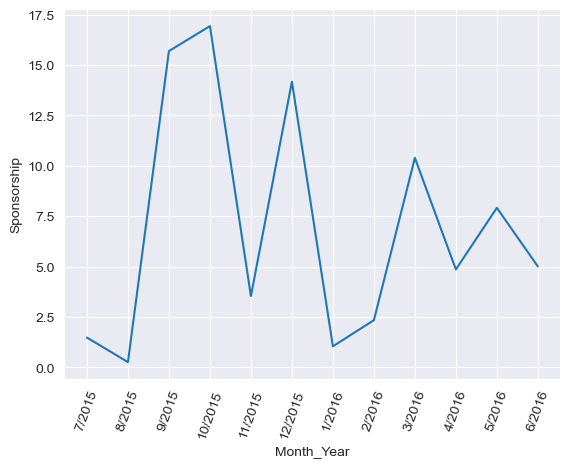

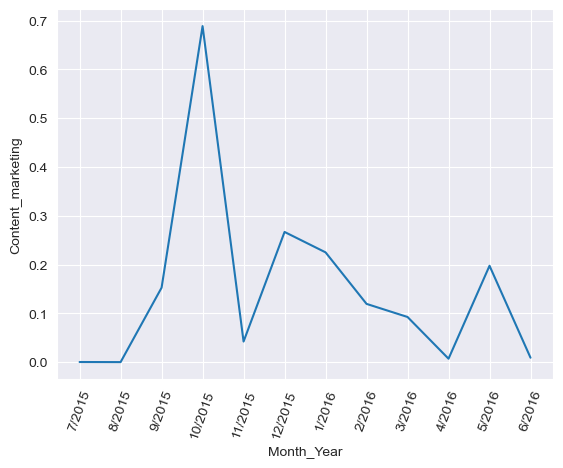

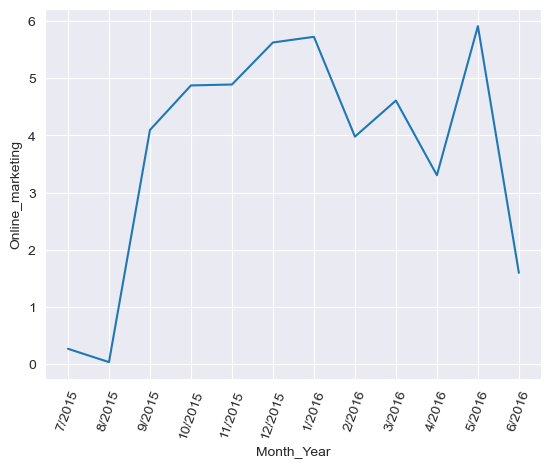

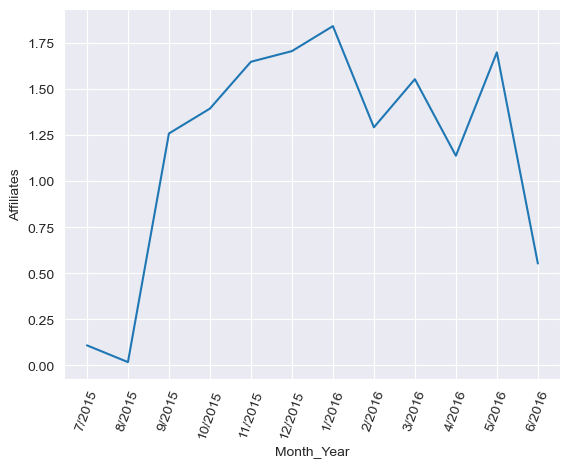

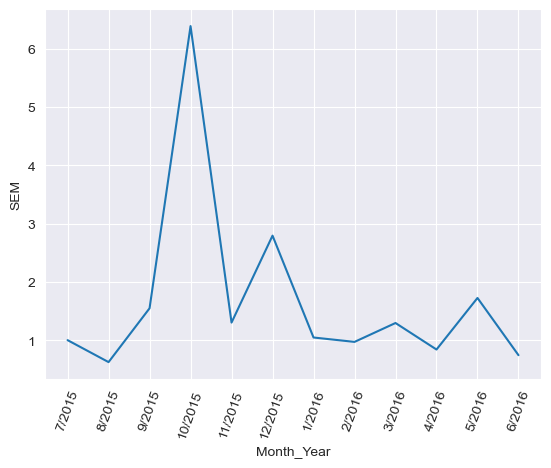

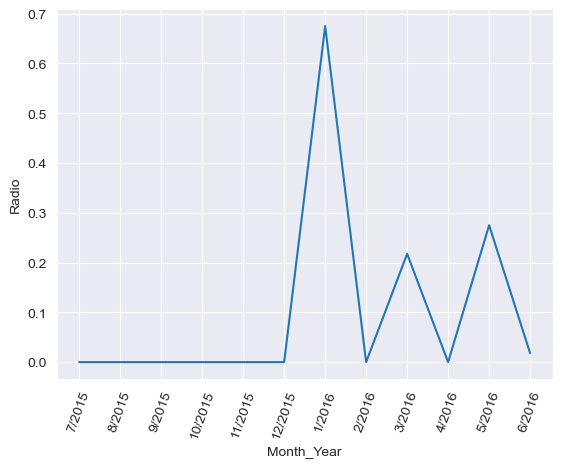

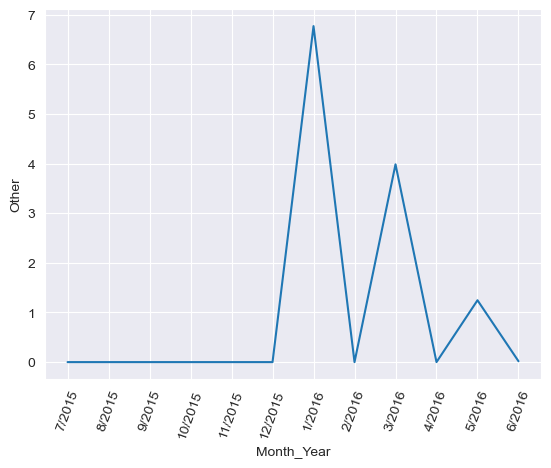

In [116]:
# Plotting Investment Columns
for col in investment_cols:
    sns.lineplot(data=media_investment_df, y=col, x='Month_Year')
    plt.xticks(rotation=70)
    plt.show()

In [117]:
# Adstock function
def adstocked_advertising(decay_rate, advertising):
    # Empty adstock array to store calculated adstock
    adstock = []
    
    for i in range(len(advertising)):
        if i == 0: 
            adstock.append(advertising.iloc[i])
        else:
            adstock.append(advertising.iloc[i] + decay_rate * advertising.iloc[i-1])            
    return(adstock)

In [118]:
# Applying adstock function
default_decay = 0.5
media_investment_df['TV_adstock'] = adstocked_advertising(default_decay, media_investment_df['TV'])
media_investment_df['Digital_adstock'] = adstocked_advertising(default_decay, media_investment_df['Digital'])
media_investment_df['Sponsorship_adstock'] = adstocked_advertising(default_decay, media_investment_df['Sponsorship'])
media_investment_df['Content_adstock'] = adstocked_advertising(default_decay, media_investment_df['Content_marketing'])
media_investment_df['Online_adstock'] = adstocked_advertising(default_decay, media_investment_df['Online_marketing'])
media_investment_df['Affiliates_adstock'] = adstocked_advertising(default_decay, media_investment_df['Affiliates'])
media_investment_df['SEM_adstock'] = adstocked_advertising(default_decay, media_investment_df['SEM'])
media_investment_df['Radio_adstock'] = adstocked_advertising(default_decay, media_investment_df['Radio'])
media_investment_df['Other_adstock'] = adstocked_advertising(default_decay, media_investment_df['Other'])

In [119]:
media_investment_df.head()

Total_investment   TV  Digital  Sponsorship  Content_marketing  \
0              3.41 0.04     0.51         1.48               0.00   
1              1.27 0.00     0.32         0.27               0.00   
2             24.06 0.97     0.34        15.70               0.15   
3             34.03 1.23     2.52        16.93               0.69   
4             12.80 1.06     0.32         3.54               0.04   

   Online_marketing  Affiliates  SEM  Radio  Other Month_Year  TV_adstock  \
0              0.27        0.11 1.00   0.00   0.00     7/2015        0.04   
1              0.03        0.02 0.63   0.00   0.00     8/2015        0.02   
2              4.09        1.26 1.55   0.00   0.00     9/2015        0.97   
3              4.87        1.39 6.39   0.00   0.00    10/2015        1.71   
4              4.89        1.65 1.31   0.00   0.00    11/2015        1.67   

   Digital_adstock  Sponsorship_adstock  Content_adstock  Online_adstock  \
0             0.51                 1.48             0.00            0.27   
1             0.57                 1.01             0.00            0.17   
2             0.50                15.83             0.15            4.11   
3             2.69                24.78             0.77            6.92   
4             1.58                12.01             0.39            7.33   

   Affiliates_adstock  SEM_adstock  Radio_adstock  Other_adstock  
0                0.11         1.00           0.00           0.00  
1                0.07         1.13           0.00           0.00  
2                1.27         1.86           0.00           0.00  
3                2.02         7.16           0.00           0.00  
4                2.35         4.50           0.00           0.00

In [120]:
# Dropping columns which are no longer required
media_investment_df.drop(['Total_investment', 'TV', 'Digital', 
                          'Sponsorship', 'Content_marketing', 'Online_marketing',
                          'Affiliates', 'SEM', 'Radio',	'Other'], axis=1, inplace=True)

In [121]:
# Adding Week
media_investment_df = pd.merge(week_ref_df, media_investment_df, on='Month_Year', how='left')

In [122]:
media_investment_df.drop('Month_Year', axis=1, inplace=True)

In [123]:
media_investment_df.head()

Week  TV_adstock  Digital_adstock  Sponsorship_adstock  Content_adstock  \
0    16        1.71             2.69                24.78             0.77   
1    17        1.71             2.69                24.78             0.77   
2    14        1.71             2.69                24.78             0.77   
3    15        1.71             2.69                24.78             0.77   
4    18        1.71             2.69                24.78             0.77   

   Online_adstock  Affiliates_adstock  SEM_adstock  Radio_adstock  \
0            6.92                2.02         7.16           0.00   
1            6.92                2.02         7.16           0.00   
2            6.92                2.02         7.16           0.00   
3            6.92                2.02         7.16           0.00   
4            6.92                2.02         7.16           0.00   

   Other_adstock  
0           0.00  
1           0.00  
2           0.00  
3           0.00  
4           0.00

#### NPS Score and Stock Index

In [124]:
nps_df = pd.read_excel('Media data and other information.xlsx', 'Monthly NPS Score', skiprows=1)

In [125]:
nps_df.head()

Unnamed: 0  July'15  Aug'15  Sept'15  Oct'15  Nov'15  Dec'15  Jan'16  \
0          NPS    54.60   59.99    46.93   44.40   47.00   45.80   47.09   
1  Stock Index  1177.00 1206.00  1101.00 1210.00 1233.00 1038.00 1052.00   

   Feb'16  Mar'16  Apr'16  May'16  June'16  
0   50.33   49.02   51.83   47.31    50.52  
1 1222.00 1015.00 1242.00 1228.00  1194.00

In [126]:
nps_df = nps_df.drop('Unnamed: 0', axis=1)

In [127]:
nps_df = nps_df.transpose().reset_index().rename(columns={'index': 'Month_Year', 0: 'NPS_Score', 1: 'Stock_Index'})

In [128]:
nps_df.head()

Month_Year  NPS_Score  Stock_Index
0    July'15      54.60      1177.00
1     Aug'15      59.99      1206.00
2    Sept'15      46.93      1101.00
3     Oct'15      44.40      1210.00
4     Nov'15      47.00      1233.00

In [129]:
# Dictionary to refer month number
month_to_number = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6, 'July': 7, 'Aug': 8, 'Sept': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

In [130]:
# Creating a month column with MM format
nps_months = nps_df['Month_Year'].apply(lambda my : my.split("'")[0])
nps_months = nps_months.replace(month_to_number).infer_objects(copy=False)

In [131]:
# Creating a Year with 20YY format
nps_year = nps_df['Month_Year'].apply(lambda my : '20' + my.split("'")[1])

In [132]:
# Changing Month_Year to MM/YYYY format
nps_df['Month_Year'] = nps_months.astype('str') + '/' + nps_year.astype('str')

In [133]:
# Adding Week
nps_df = pd.merge(week_ref_df, nps_df, on='Month_Year', how='left')

In [134]:
# Sorting the columns based on Week
nps_df = nps_df.sort_values(['Week']).reset_index(drop=True)

In [135]:
# Dropping Month_Year
nps_df.drop('Month_Year', axis=1, inplace=True)

In [136]:
nps_df.head()

Week  NPS_Score  Stock_Index
0     1      54.60      1177.00
1     2      54.60      1177.00
2     3      54.60      1177.00
3     4      54.60      1177.00
4     5      54.60      1177.00

In [137]:
# Merging Media Investment and NPS dataframes
other_kpi_df = pd.merge(media_investment_df, nps_df, on='Week', how='left')

In [138]:
other_kpi_df.head()

Week  TV_adstock  Digital_adstock  Sponsorship_adstock  Content_adstock  \
0    16        1.71             2.69                24.78             0.77   
1    17        1.71             2.69                24.78             0.77   
2    14        1.71             2.69                24.78             0.77   
3    15        1.71             2.69                24.78             0.77   
4    18        1.71             2.69                24.78             0.77   

   Online_adstock  Affiliates_adstock  SEM_adstock  Radio_adstock  \
0            6.92                2.02         7.16           0.00   
1            6.92                2.02         7.16           0.00   
2            6.92                2.02         7.16           0.00   
3            6.92                2.02         7.16           0.00   
4            6.92                2.02         7.16           0.00   

   Other_adstock  NPS_Score  Stock_Index  
0           0.00      44.40      1210.00  
1           0.00      44.40      1210.00  
2           0.00      44.40      1210.00  
3           0.00      44.40      1210.00  
4           0.00      44.40      1210.00

In [139]:
# Checking for null values
other_kpi_df.isnull().sum()

Week                   0
TV_adstock             0
Digital_adstock        0
Sponsorship_adstock    0
Content_adstock        0
Online_adstock         0
Affiliates_adstock     0
SEM_adstock            0
Radio_adstock          0
Other_adstock          0
NPS_Score              0
Stock_Index            0
dtype: int64

### Merging to create final dataset

##### Camera Accessory

In [140]:
# camera_accessory_df = pd.merge(camera_accessory_df, weather_df, on='Week', how='left')
camera_accessory_df = pd.merge(camera_accessory_df, other_kpi_df, on='Week', how='left')

In [141]:
camera_accessory_df.head()

Week  discount  deliverybdays_rsi  deliverycdays_rsi  sla  \
0     1   1139.44               4.36               5.05 5.91   
1     2   1024.52               4.50               5.22 7.19   
2     3   1037.45               4.48               5.27 6.24   
3     4    998.85               4.46               5.29 6.44   
4     5    944.43               4.54               5.26 6.50   

   product_procurement_sla  buy_period_month_end  buy_period_normal  \
0                     2.72                  0.00             520.00   
1                     2.63                  0.00            3338.00   
2                     2.68                  0.00            2739.00   
3                     2.67                414.00            2665.00   
4                     2.68               1268.00               0.00   

   buy_period_start_of_month  discount_percent  ...  Digital_adstock  \
0                      28.00            219.00  ...             0.51   
1                       0.00           1216.13  ...             0.51   
2                       0.00           1319.93  ...             0.51   
3                       0.00           1270.57  ...             0.51   
4                       2.00            511.35  ...             0.51   

   Sponsorship_adstock  Content_adstock  Online_adstock  Affiliates_adstock  \
0                 1.48             0.00            0.27                0.11   
1                 1.48             0.00            0.27                0.11   
2                 1.48             0.00            0.27                0.11   
3                 1.48             0.00            0.27                0.11   
4                 1.48             0.00            0.27                0.11   

   SEM_adstock  Radio_adstock  Other_adstock  NPS_Score  Stock_Index  
0         1.00           0.00           0.00      54.60      1177.00  
1         1.00           0.00           0.00      54.60      1177.00  
2         1.00           0.00           0.00      54.60      1177.00  
3         1.00           0.00           0.00      54.60      1177.00  
4         1.00           0.00           0.00      54.60      1177.00  

[5 rows x 52 columns]

In [142]:
camera_accessory_df.drop('Week', axis=1, inplace=True)

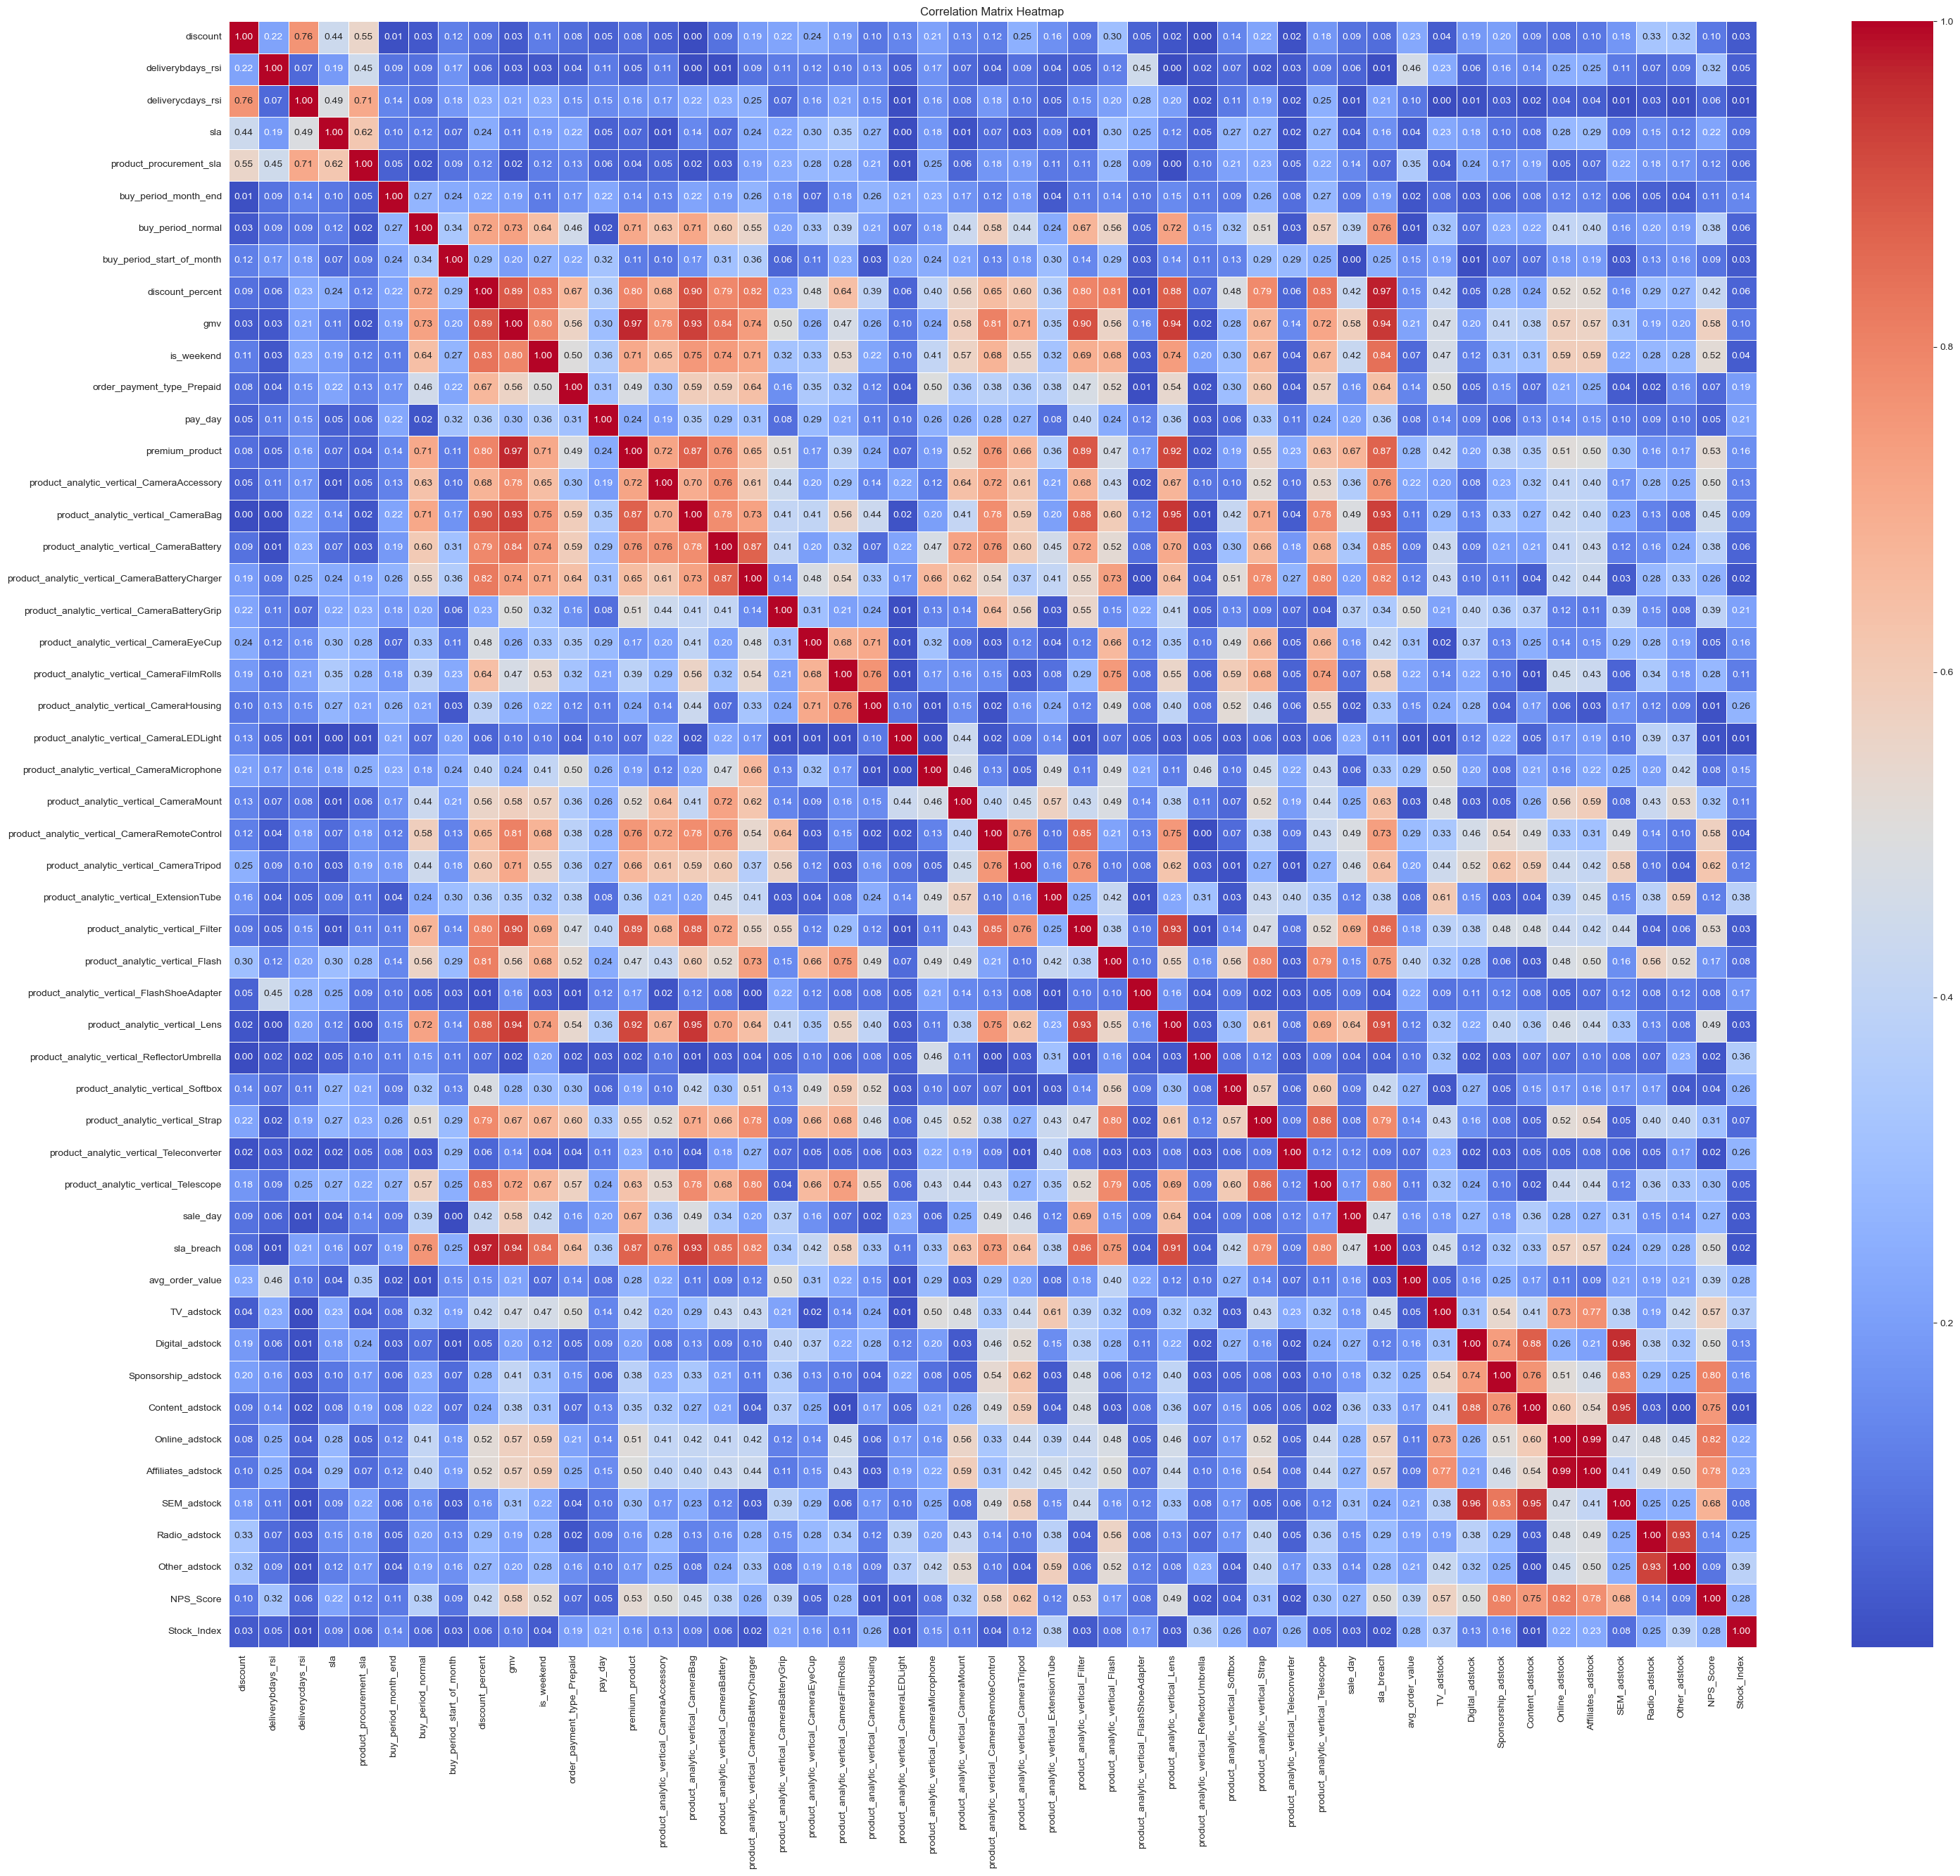

In [143]:
# Correlation Heatmap Plot
camera_accessory_corr = camera_accessory_df.corr(numeric_only=True).abs()
plt.figure(figsize=(35,30)) # Set the figure size
sns.heatmap(camera_accessory_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap') # Add a title to the plot
plt.show()

In [144]:
corr_matrix = camera_accessory_df.drop('gmv', axis=1).corr(numeric_only=True).abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns with correlation above threshold
threshold = 0.85
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

In [145]:
# Dropping columns with high correlation
camera_accessory_df.drop(to_drop, axis=1, inplace=True)

In [146]:
camera_accessory_df.columns

Index(['discount', 'deliverybdays_rsi', 'deliverycdays_rsi', 'sla',
       'product_procurement_sla', 'buy_period_month_end', 'buy_period_normal',
       'buy_period_start_of_month', 'discount_percent', 'gmv', 'is_weekend',
       'order_payment_type_Prepaid', 'pay_day', 'premium_product',
       'product_analytic_vertical_CameraAccessory',
       'product_analytic_vertical_CameraBattery',
       'product_analytic_vertical_CameraBatteryGrip',
       'product_analytic_vertical_CameraEyeCup',
       'product_analytic_vertical_CameraFilmRolls',
       'product_analytic_vertical_CameraHousing',
       'product_analytic_vertical_CameraLEDLight',
       'product_analytic_vertical_CameraMicrophone',
       'product_analytic_vertical_CameraMount',
       'product_analytic_vertical_CameraRemoteControl',
       'product_analytic_vertical_CameraTripod',
       'product_analytic_vertical_ExtensionTube',
       'product_analytic_vertical_Flash',
       'product_analytic_vertical_FlashShoeAdapter',


##### Home Audio

In [147]:
home_audio_df = pd.merge(home_audio_df, weather_df, on='Week', how='left')
home_audio_df = pd.merge(home_audio_df, other_kpi_df, on='Week', how='left')

In [148]:
home_audio_df.head()

Week  discount  deliverybdays_rsi  deliverycdays_rsi  sla  \
0     1   1321.15               4.30               4.96 6.42   
1     2   1271.38               4.51               5.15 7.45   
2     3   1388.55               4.57               5.29 6.99   
3     4   1304.58               4.53               5.26 7.17   
4     5   1385.25               4.53               5.36 7.37   

   product_procurement_sla  buy_period_month_end  buy_period_normal  \
0                     2.66                  0.00             377.00   
1                     2.70                  0.00            2563.00   
2                     2.70                  0.00            2088.00   
3                     2.71                323.00            1920.00   
4                     2.66                989.00               0.00   

   buy_period_start_of_month  discount_percent  ...  Digital_adstock  \
0                      40.00            131.34  ...             0.51   
1                       0.00            789.81  ...             0.51   
2                       0.00            792.71  ...             0.51   
3                       0.00            710.91  ...             0.51   
4                       1.00            314.93  ...             0.51   

   Sponsorship_adstock  Content_adstock  Online_adstock  Affiliates_adstock  \
0                 1.48             0.00            0.27                0.11   
1                 1.48             0.00            0.27                0.11   
2                 1.48             0.00            0.27                0.11   
3                 1.48             0.00            0.27                0.11   
4                 1.48             0.00            0.27                0.11   

   SEM_adstock  Radio_adstock  Other_adstock  NPS_Score  Stock_Index  
0         1.00           0.00           0.00      54.60      1177.00  
1         1.00           0.00           0.00      54.60      1177.00  
2         1.00           0.00           0.00      54.60      1177.00  
3         1.00           0.00           0.00      54.60      1177.00  
4         1.00           0.00           0.00      54.60      1177.00  

[5 rows x 48 columns]

In [149]:
home_audio_df.drop('Week', axis=1, inplace=True)

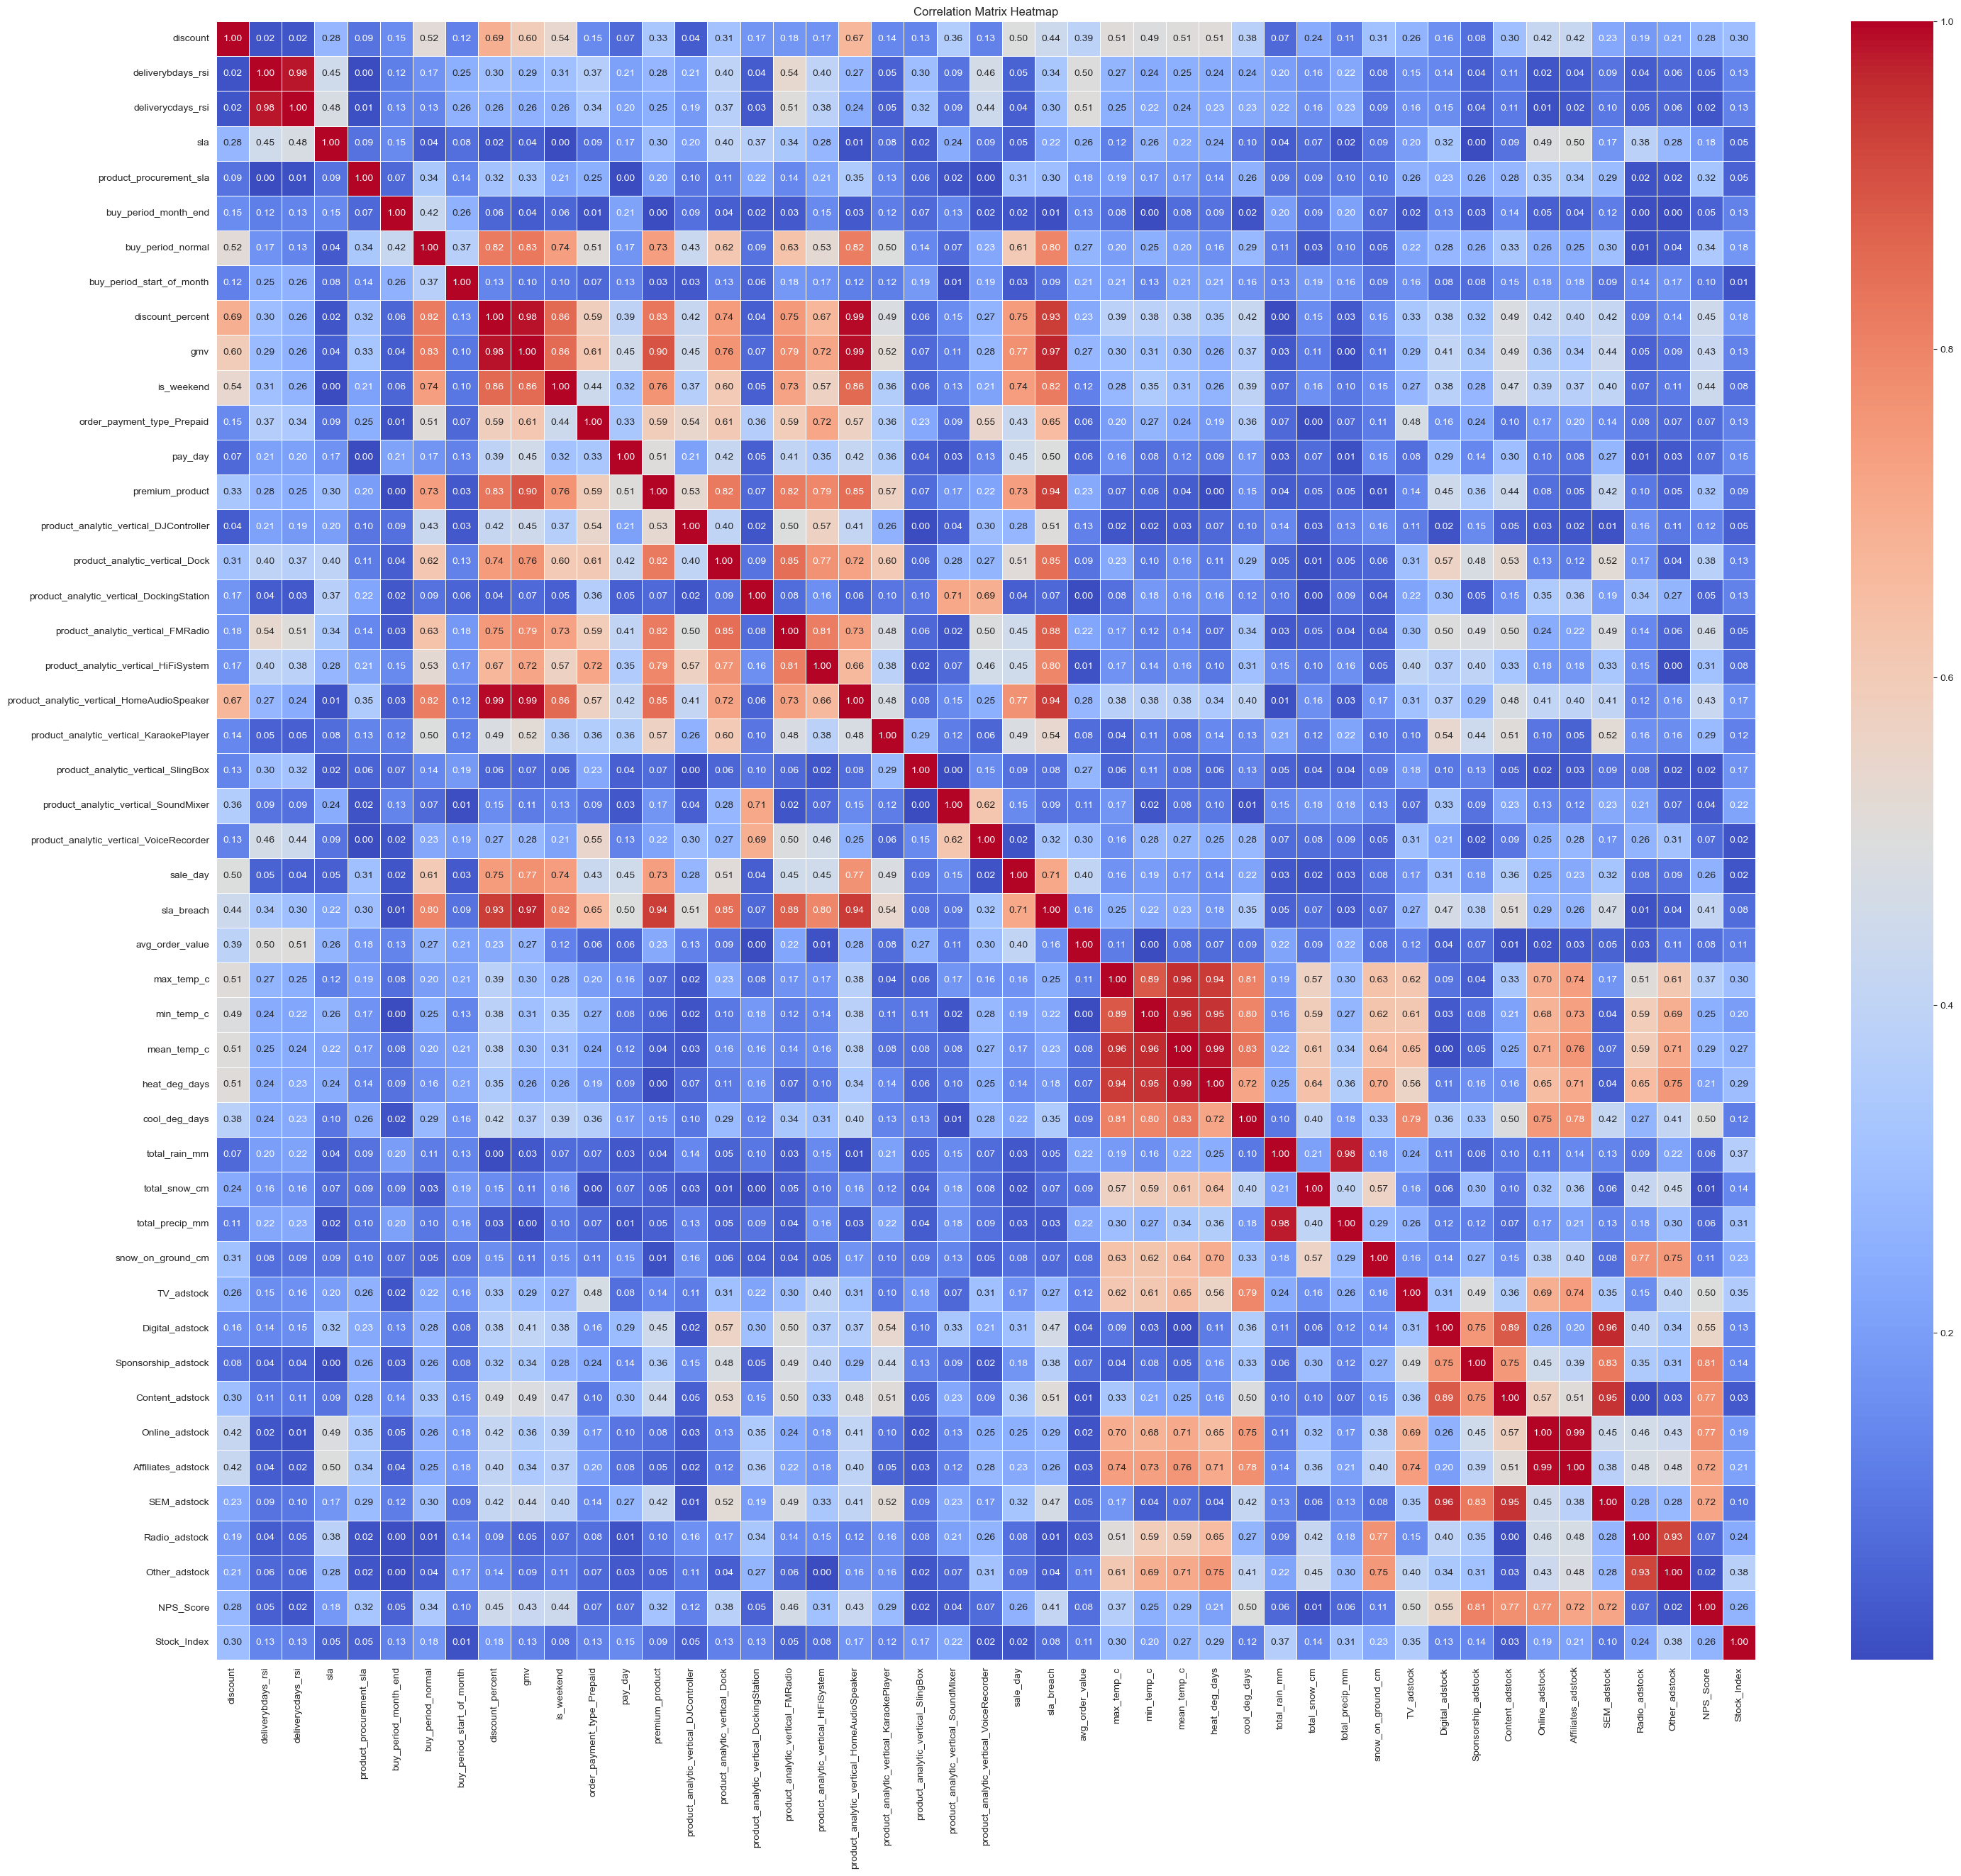

In [150]:
# Correlation Heatmap Plot
home_audio_corr = home_audio_df.corr(numeric_only=True).abs()
plt.figure(figsize=(35,30)) # Set the figure size
sns.heatmap(home_audio_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap') # Add a title to the plot
plt.show()

In [151]:
corr_matrix = home_audio_df.drop('gmv', axis=1).corr(numeric_only=True).abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns with correlation above threshold
threshold = 0.85
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

In [152]:
# Dropping columns with high correlation
home_audio_df.drop(to_drop, axis=1, inplace=True)

In [153]:
home_audio_df.columns

Index(['discount', 'deliverybdays_rsi', 'sla', 'product_procurement_sla',
       'buy_period_month_end', 'buy_period_normal',
       'buy_period_start_of_month', 'discount_percent', 'gmv',
       'order_payment_type_Prepaid', 'pay_day', 'premium_product',
       'product_analytic_vertical_DJController',
       'product_analytic_vertical_Dock',
       'product_analytic_vertical_DockingStation',
       'product_analytic_vertical_FMRadio',
       'product_analytic_vertical_HiFiSystem',
       'product_analytic_vertical_KaraokePlayer',
       'product_analytic_vertical_SlingBox',
       'product_analytic_vertical_SoundMixer',
       'product_analytic_vertical_VoiceRecorder', 'sale_day',
       'avg_order_value', 'max_temp_c', 'cool_deg_days', 'total_rain_mm',
       'total_snow_cm', 'snow_on_ground_cm', 'TV_adstock', 'Digital_adstock',
       'Sponsorship_adstock', 'Online_adstock', 'Radio_adstock', 'NPS_Score',
       'Stock_Index'],
      dtype='object')

##### Gaming Accessory

In [154]:
gaming_accessory_df = pd.merge(gaming_accessory_df, weather_df, on='Week', how='left')
gaming_accessory_df = pd.merge(gaming_accessory_df, other_kpi_df, on='Week', how='left')

In [155]:
gaming_accessory_df.head()

Week  discount  deliverybdays_rsi  deliverycdays_rsi  sla  \
0     1    940.02               4.43               5.27 4.10   
1     2    848.25               4.54               5.23 5.98   
2     3   1111.26               4.59               5.33 5.04   
3     4   1106.63               4.53               5.23 5.33   
4     5   5146.52               4.61               5.31 5.57   

   product_procurement_sla  buy_period_month_end  buy_period_normal  \
0                     3.23                  0.00             948.00   
1                     2.75                  0.00            2760.00   
2                     2.58                  0.00            2587.00   
3                     2.25                353.00            2220.00   
4                     3.37               1163.00               0.00   

   buy_period_start_of_month  discount_percent  ...  Digital_adstock  \
0                      32.00            433.44  ...             0.51   
1                       0.00            977.27  ...             0.51   
2                       0.00           1108.73  ...             0.51   
3                       0.00            912.81  ...             0.51   
4                       3.00            501.78  ...             0.51   

   Sponsorship_adstock  Content_adstock  Online_adstock  Affiliates_adstock  \
0                 1.48             0.00            0.27                0.11   
1                 1.48             0.00            0.27                0.11   
2                 1.48             0.00            0.27                0.11   
3                 1.48             0.00            0.27                0.11   
4                 1.48             0.00            0.27                0.11   

   SEM_adstock  Radio_adstock  Other_adstock  NPS_Score  Stock_Index  
0         1.00           0.00           0.00      54.60      1177.00  
1         1.00           0.00           0.00      54.60      1177.00  
2         1.00           0.00           0.00      54.60      1177.00  
3         1.00           0.00           0.00      54.60      1177.00  
4         1.00           0.00           0.00      54.60      1177.00  

[5 rows x 53 columns]

In [156]:
gaming_accessory_df.drop('Week', axis=1, inplace=True)

In [157]:
gaming_accessory_df.head()

discount  deliverybdays_rsi  deliverycdays_rsi  sla  \
0    940.02               4.43               5.27 4.10   
1    848.25               4.54               5.23 5.98   
2   1111.26               4.59               5.33 5.04   
3   1106.63               4.53               5.23 5.33   
4   5146.52               4.61               5.31 5.57   

   product_procurement_sla  buy_period_month_end  buy_period_normal  \
0                     3.23                  0.00             948.00   
1                     2.75                  0.00            2760.00   
2                     2.58                  0.00            2587.00   
3                     2.25                353.00            2220.00   
4                     3.37               1163.00               0.00   

   buy_period_start_of_month  discount_percent        gmv  ...  \
0                      32.00            433.44  816295.00  ...   
1                       0.00            977.27 2633284.00  ...   
2                       0.00           1108.73 2432689.36  ...   
3                       0.00            912.81 2783059.50  ...   
4                       3.00            501.78 1205927.00  ...   

   Digital_adstock  Sponsorship_adstock  Content_adstock  Online_adstock  \
0             0.51                 1.48             0.00            0.27   
1             0.51                 1.48             0.00            0.27   
2             0.51                 1.48             0.00            0.27   
3             0.51                 1.48             0.00            0.27   
4             0.51                 1.48             0.00            0.27   

   Affiliates_adstock  SEM_adstock  Radio_adstock  Other_adstock  NPS_Score  \
0                0.11         1.00           0.00           0.00      54.60   
1                0.11         1.00           0.00           0.00      54.60   
2                0.11         1.00           0.00           0.00      54.60   
3                0.11         1.00           0.00           0.00      54.60   
4                0.11         1.00           0.00           0.00      54.60   

   Stock_Index  
0      1177.00  
1      1177.00  
2      1177.00  
3      1177.00  
4      1177.00  

[5 rows x 52 columns]

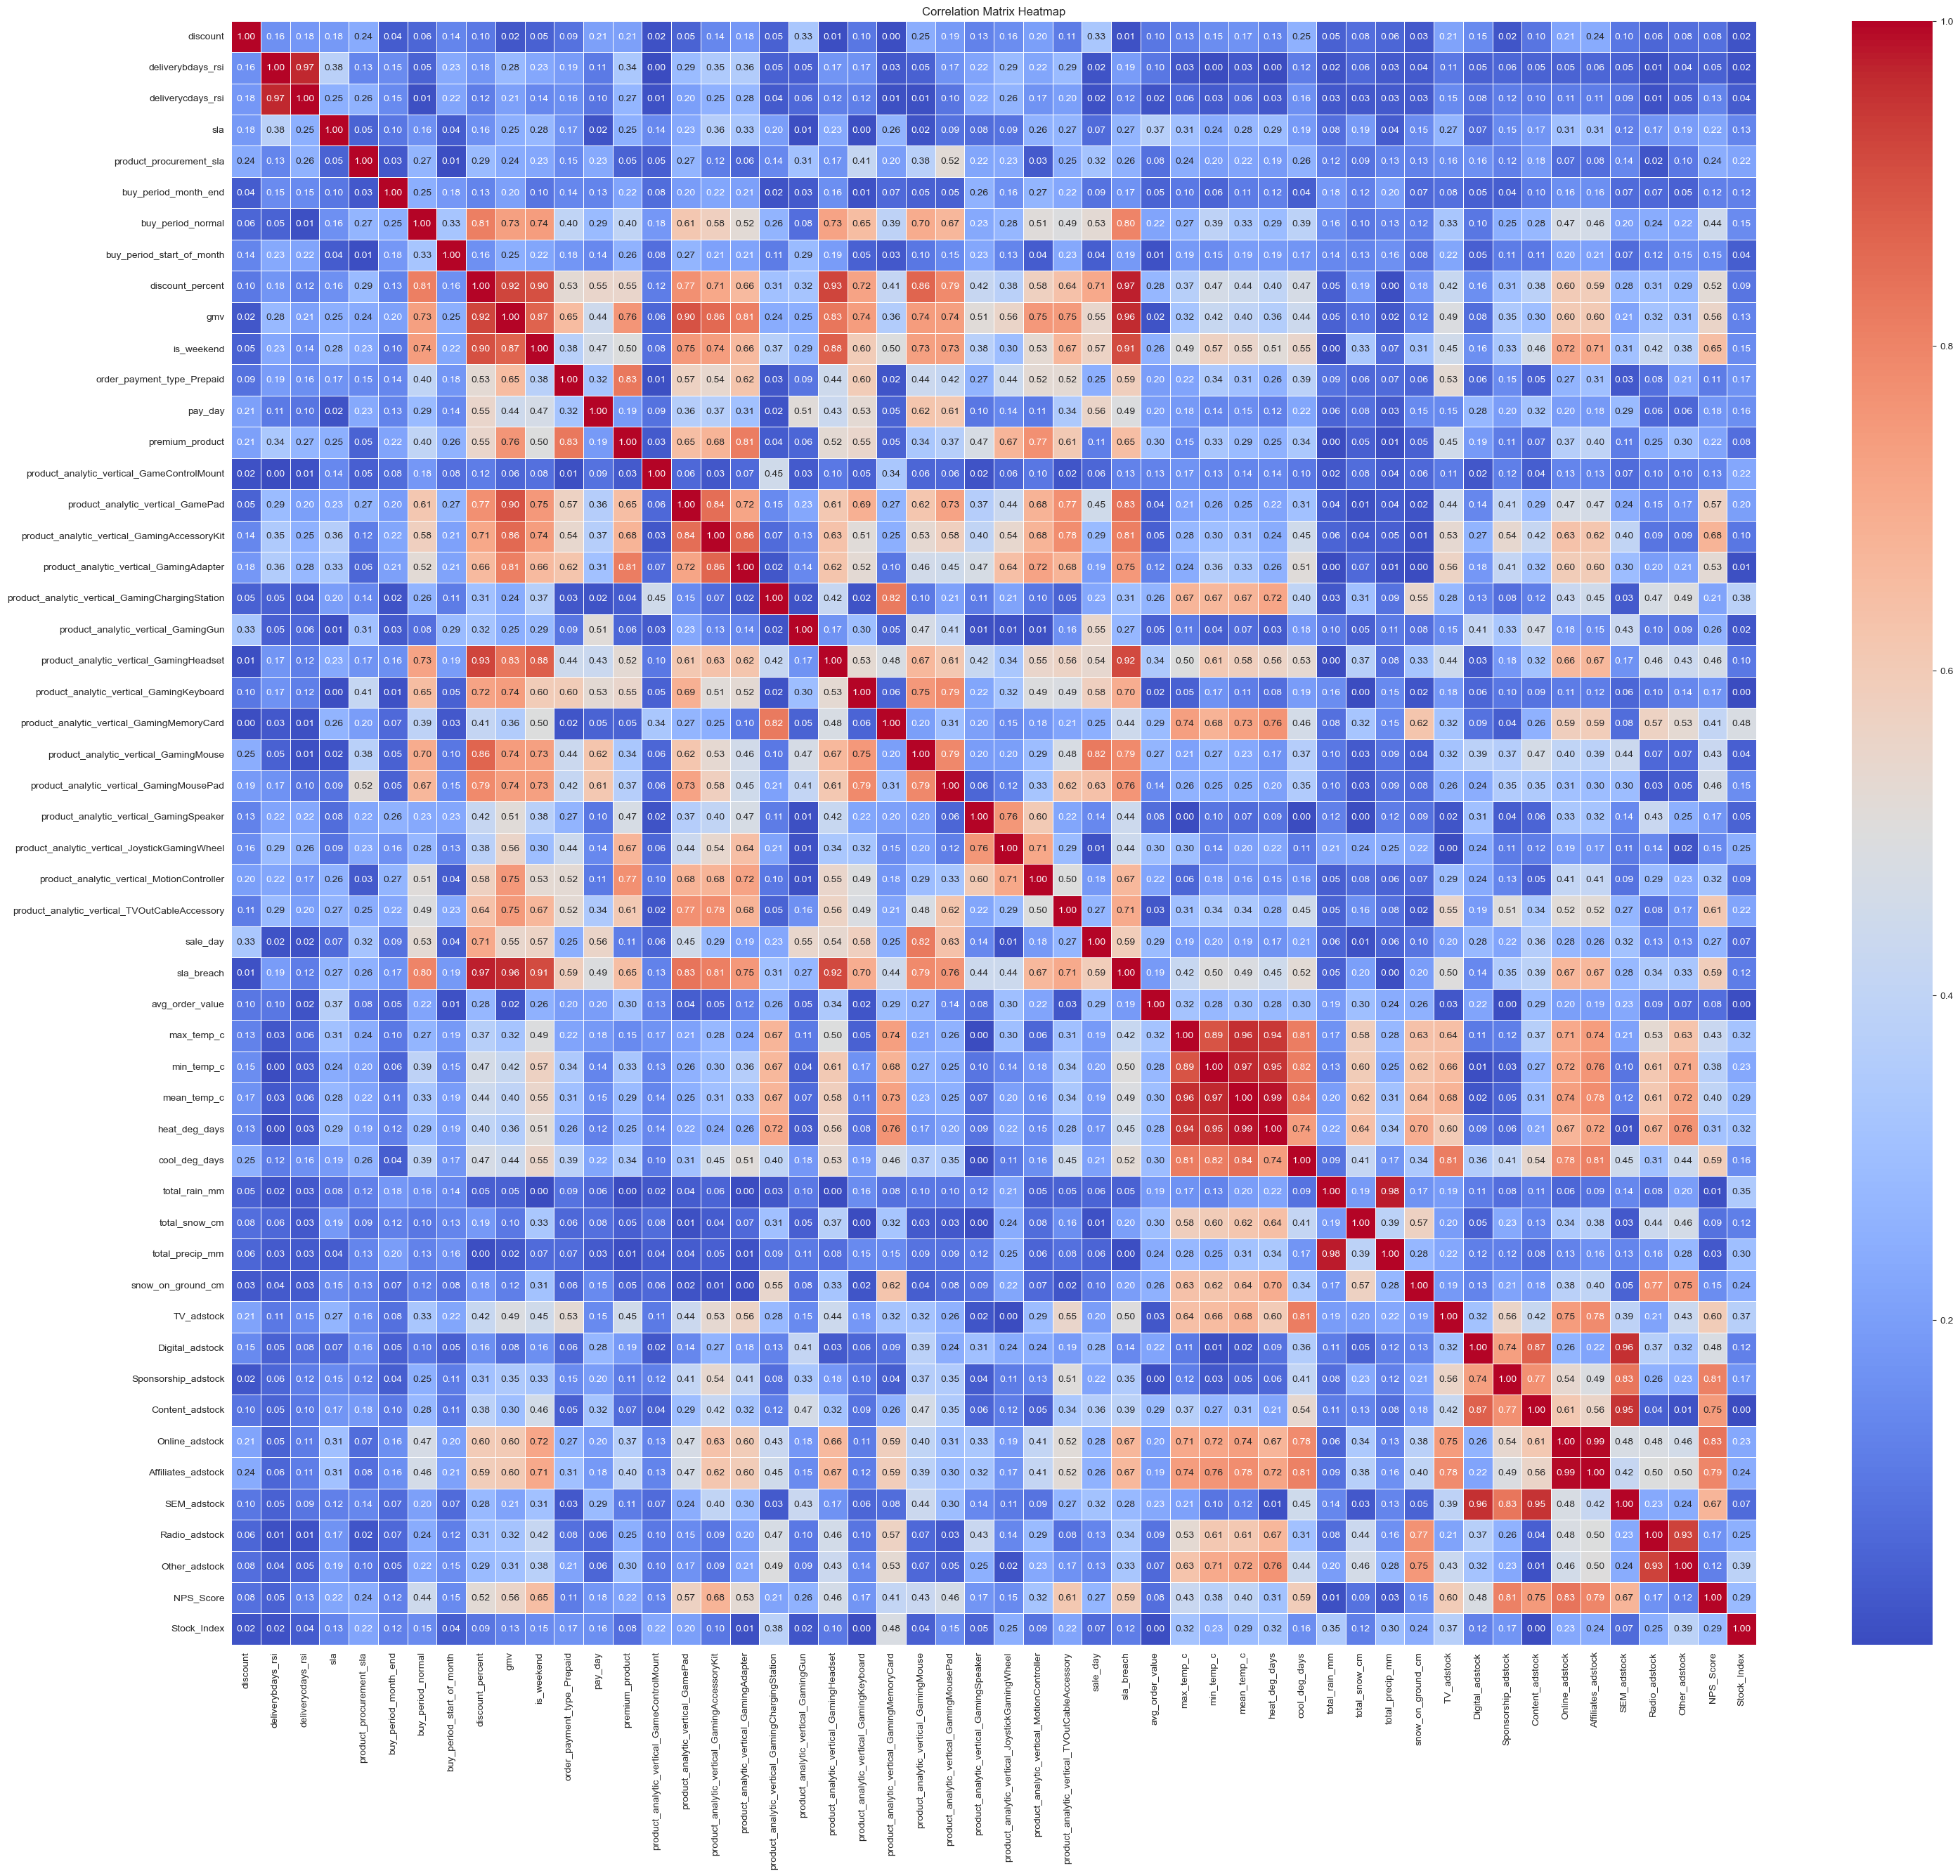

In [158]:
# Correlation Heatmap Plot
gaming_accessory_corr = gaming_accessory_df.corr(numeric_only=True).abs()
plt.figure(figsize=(35,30)) # Set the figure size
sns.heatmap(gaming_accessory_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap') # Add a title to the plot
plt.show()

In [159]:
corr_matrix = gaming_accessory_df.drop('gmv', axis=1).corr(numeric_only=True).abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find columns with correlation above threshold
threshold = 0.85
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

In [160]:
# Dropping columns with high correlation
gaming_accessory_df.drop(to_drop, axis=1, inplace=True)

In [161]:
gaming_accessory_df.columns

Index(['discount', 'deliverybdays_rsi', 'sla', 'product_procurement_sla',
       'buy_period_month_end', 'buy_period_normal',
       'buy_period_start_of_month', 'discount_percent', 'gmv',
       'order_payment_type_Prepaid', 'pay_day', 'premium_product',
       'product_analytic_vertical_GameControlMount',
       'product_analytic_vertical_GamePad',
       'product_analytic_vertical_GamingAccessoryKit',
       'product_analytic_vertical_GamingChargingStation',
       'product_analytic_vertical_GamingGun',
       'product_analytic_vertical_GamingKeyboard',
       'product_analytic_vertical_GamingMemoryCard',
       'product_analytic_vertical_GamingMousePad',
       'product_analytic_vertical_GamingSpeaker',
       'product_analytic_vertical_JoystickGamingWheel',
       'product_analytic_vertical_MotionController',
       'product_analytic_vertical_TVOutCableAccessory', 'sale_day',
       'avg_order_value', 'max_temp_c', 'cool_deg_days', 'total_rain_mm',
       'total_snow_cm', 'snow_on

### Modelling

In [162]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error

In [163]:
# Generate Training & Testing Datasets
def gen_train_test_df(param_df):
    train, test = train_test_split(param_df, train_size = 0.7, test_size = 0.3, random_state = 42)
    
    y_train = train['gmv']
    X_train = train.drop('gmv', axis=1)
    
    y_test = test['gmv']
    X_test = test.drop('gmv', axis=1)

    scaler = RobustScaler()
    
    X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
    X_test[X_test.columns] = scaler.fit_transform(X_test[X_test.columns])
    
    return X_train, y_train, X_test, y_test

In [164]:
def build_model(X, y):
    # Adding constant
    X_train_sm = sm.add_constant(X)
    
    # Model Fitting
    sm_ca = sm.OLS(y, X_train_sm).fit()
    print(sm_ca.summary())
    print('\n')

    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)
    print('\n')
    
    return(X_train_sm)

In [165]:
# Check final performance
def model_performance(X_train, y_train, X_test, y_test):
    # Creating X_test_new dataframe by dropping variables from X_test
    X_test = X_test[X_train.columns]

    # Adding constant
    X_train = sm.add_constant(X_train)
        
    # Model Fitting
    final_sm = sm.OLS(y_train, X_train).fit()
    print(final_sm.summary())

    X_test = sm.add_constant(X_test)
    y_pred = final_sm.predict(X_test)

    r2score = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print('\n')
    print('Test Scores:')
    print('R2 score: {}'.format(r2score))
    print("Mean GMV: {}".format(y_test.mean()))
    print('RMSE: {:.2f}%'.format((rmse / y_test.mean()) * 100))
    print('\n')

    # Scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_pred, color="steelblue", s=60, alpha=0.7)
    plt.title('y_test vs y_test_pred', fontsize=20)
    plt.xlabel('y_test', fontsize=16)
    plt.ylabel('y_test_pred', fontsize=16)
    plt.show()

    return

In [166]:
# Check final performance
def log_model_performance(X_train, y_train, X_test, y_test):
    # Creating X_test_new dataframe by dropping variables from X_test
    X_test = X_test[X_train.columns]

    # Adding constant
    X_train = sm.add_constant(X_train)
        
    # Model Fitting
    final_sm = sm.OLS(y_train, X_train).fit()
    print(final_sm.summary())

    X_test = sm.add_constant(X_test)
    y_pred = final_sm.predict(X_test)

    y_test_exp = np.exp(y_test)
    y_pred_exp = np.exp(y_pred)

    r2score = r2_score(y_test_exp, y_pred_exp)
    rmse = np.sqrt(mean_squared_error(y_test_exp, y_pred_exp))

    print('\n')
    print('Test Scores:')
    print('R2 score: {}'.format(r2score))
    print("Mean GMV: {}".format(y_test_exp.mean()))
    print('RMSE: {:.2f}%'.format((rmse / y_test.mean()) * 100))
    print('\n')

    # Scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test_exp, y=y_pred_exp, color="steelblue", s=60, alpha=0.7)
    plt.title('y_test vs y_test_pred', fontsize=20)
    plt.xlabel('y_test', fontsize=16)
    plt.ylabel('y_test_pred', fontsize=16)
    plt.show()

    return

#### Camera Accessory Dataset

In [167]:
X_train_ca, y_train_ca, X_test_ca, y_test_ca = gen_train_test_df(camera_accessory_df)

In [168]:
X_train_ca.describe()

discount  deliverybdays_rsi  deliverycdays_rsi   sla  \
count     36.00              36.00              36.00 36.00   
mean       0.04               0.40               0.36 -0.03   
std        0.75               1.88               1.87  0.68   
min       -1.37              -2.77              -2.83 -1.67   
25%       -0.57              -0.50              -0.41 -0.60   
50%       -0.00              -0.00               0.00 -0.00   
75%        0.43               0.50               0.59  0.40   
max        2.17               7.48               7.69  1.68   

       product_procurement_sla  buy_period_month_end  buy_period_normal  \
count                    36.00                 36.00              36.00   
mean                      0.03                  0.44              -0.05   
std                       0.61                  0.70               0.93   
min                      -0.98                  0.00              -1.49   
25%                      -0.52                  0.00              -0.45   
50%                       0.00                  0.00               0.00   
75%                       0.48                  1.00               0.55   
max                       1.22                  2.44               2.79   

       buy_period_start_of_month  discount_percent  is_weekend  ...  \
count                      36.00             36.00       36.00  ...   
mean                        1.09              0.09        0.19  ...   
std                         2.18              0.96        0.98  ...   
min                         0.00             -1.55       -2.11  ...   
25%                         0.00             -0.43       -0.18  ...   
50%                         0.00              0.00        0.00  ...   
75%                         1.00              0.57        0.82  ...   
max                         8.21              2.96        2.53  ...   

       product_analytic_vertical_Teleconverter  sale_day  avg_order_value  \
count                                    36.00     36.00            36.00   
mean                                      0.00      0.82             0.00   
std                                       0.00      1.79             0.56   
min                                       0.00      0.00            -1.22   
25%                                       0.00      0.00            -0.50   
50%                                       0.00      0.00             0.00   
75%                                       0.00      1.00             0.50   
max                                       0.00      8.87             0.87   

       TV_adstock  Digital_adstock  Sponsorship_adstock  Online_adstock  \
count       36.00            36.00                36.00           36.00   
mean        -0.30             0.81                 0.06           -0.31   
std          0.75             1.99                 0.83            0.80   
min         -1.62            -0.66                -1.20           -2.22   
25%         -0.80            -0.19                -0.27           -0.76   
50%          0.00             0.00                 0.00            0.00   
75%          0.20             0.81                 0.73            0.24   
max          0.90             6.62                 1.90            0.56   

       Radio_adstock  NPS_Score  Stock_Index  
count          36.00      36.00        36.00  
mean            0.19       0.24        -0.22  
std             0.73       0.95         0.49  
min            -0.40      -1.05        -1.04  
25%            -0.40      -0.34        -0.83  
50%             0.00       0.00         0.00  
75%             0.60       0.66         0.17  
max             2.06       3.29         0.28  

[8 rows x 40 columns]

In [169]:
X_train_ca.shape

(36, 40)

#### Basic Additive Linear Model

In [170]:
# Creating a simple Linear Regression model and applying RFE
lm = LinearRegression()
lm.fit(X_train_ca, y_train_ca)
rfe = RFE(estimator=lm, n_features_to_select=11)
rfe = rfe.fit(X_train_ca, y_train_ca)

In [171]:
# List columns from RFE
X_train_ca.columns[rfe.support_]

Index(['deliverybdays_rsi', 'deliverycdays_rsi', 'sla', 'discount_percent',
       'is_weekend', 'product_analytic_vertical_CameraBattery',
       'product_analytic_vertical_FlashShoeAdapter', 'avg_order_value',
       'Sponsorship_adstock', 'Radio_adstock', 'Stock_Index'],
      dtype='object')

In [172]:
X_train_rfe_ca = X_train_ca[X_train_ca.columns[rfe.support_]]
X_train_rfe_ca.head()

deliverybdays_rsi  deliverycdays_rsi   sla  discount_percent  is_weekend  \
37               1.30               1.60 -0.67              0.30        0.82   
24               0.01              -0.01  0.33             -0.37       -0.17   
44               0.26               0.36 -0.75              0.74        0.93   
33               0.04              -0.54 -0.04              0.99        1.72   
49               0.53               0.62 -0.60             -0.03        0.15   

    product_analytic_vertical_CameraBattery  \
37                                     2.36   
24                                    -0.35   
44                                    -0.04   
33                                     1.41   
49                                    -0.73   

    product_analytic_vertical_FlashShoeAdapter  avg_order_value  \
37                                        0.00            -0.82   
24                                        0.00             0.81   
44                                        0.00            -0.48   
33                                        1.00            -1.22   
49                                        0.00            -0.21   

    Sponsorship_adstock  Radio_adstock  Stock_Index  
37                 0.18           0.40        -1.04  
24                 0.75          -0.40        -0.91  
44                 0.02           0.60         0.20  
33                -0.95           0.83         0.16  
49                -0.16           0.17         0.00

In [173]:
# Model 1
X_train_new = build_model(X_train_rfe_ca, y_train_ca)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     338.6
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           1.58e-23
Time:                        15:51:50   Log-Likelihood:                -486.23
No. Observations:                  36   AIC:                             996.5
Df Residuals:                      24   BIC:                             1015.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [174]:
X_train_new = X_train_new.drop('deliverycdays_rsi', axis=1)

In [175]:
# Model 2
X_train_new = build_model(X_train_new, y_train_ca)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     316.1
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           9.79e-24
Time:                        15:51:50   Log-Likelihood:                -489.90
No. Observations:                  36   AIC:                             1002.
Df Residuals:                      25   BIC:                             1019.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [176]:
X_train_new = X_train_new.drop('deliverybdays_rsi', axis=1)

In [177]:
# Model 4
X_train_new = build_model(X_train_new, y_train_ca)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     342.5
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           1.13e-24
Time:                        15:51:50   Log-Likelihood:                -491.04
No. Observations:                  36   AIC:                             1002.
Df Residuals:                      26   BIC:                             1018.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

##### Making Prediction on Test Data and checking performance

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     342.5
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           1.13e-24
Time:                        15:51:50   Log-Likelihood:                -491.04
No. Observations:                  36   AIC:                             1002.
Df Residuals:                      26   BIC:                             1018.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

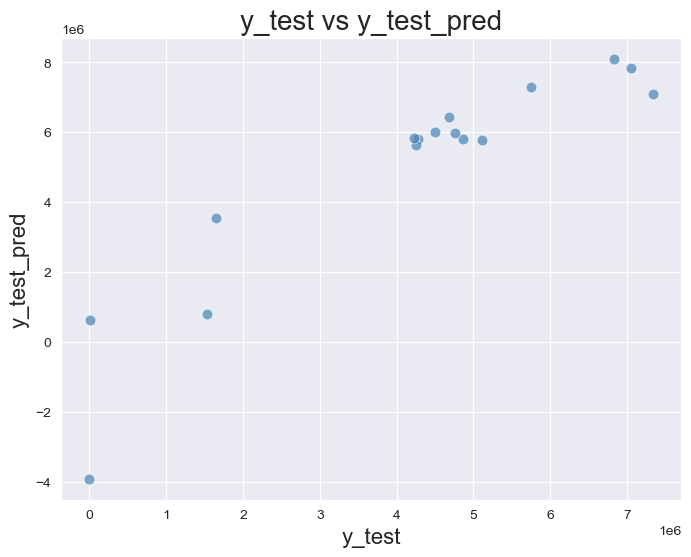

In [178]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const', axis=1)

model_performance(X_train_new, y_train_ca, X_test_ca, y_test_ca)

### Home Audio

In [179]:
X_train_ha, y_train_ha, X_test_ha, y_test_ha = gen_train_test_df(home_audio_df)

In [180]:
X_train_ha.describe()

discount  deliverybdays_rsi   sla  product_procurement_sla  \
count     35.00              35.00 35.00                    35.00   
mean       0.46              -0.21  0.10                    -0.02   
std        1.15               1.72  1.11                     1.06   
min       -0.71              -5.17 -2.67                    -4.85   
25%       -0.28              -0.69 -0.52                    -0.35   
50%        0.00               0.00  0.00                     0.00   
75%        0.72               0.31  0.48                     0.65   
max        3.41               4.65  2.95                     1.76   

       buy_period_month_end  buy_period_normal  buy_period_start_of_month  \
count                 35.00              35.00                      35.00   
mean                   0.49              -0.04                       0.60   
std                    0.76               0.81                       0.96   
min                    0.00              -1.25                       0.00   
25%                    0.00              -0.53                       0.00   
50%                    0.00               0.00                       0.00   
75%                    1.00               0.47                       1.00   
max                    2.92               1.87                       3.50   

       discount_percent  order_payment_type_Prepaid  pay_day  ...  \
count             35.00                       35.00    35.00  ...   
mean               0.13                        0.48    -0.05  ...   
std                1.10                        2.41     0.50  ...   
min               -2.02                       -3.17    -0.54  ...   
25%               -0.39                       -0.41    -0.54  ...   
50%                0.00                        0.00     0.00  ...   
75%                0.61                        0.59     0.46  ...   
max                2.75                        9.71     0.67  ...   

       total_rain_mm  total_snow_cm  snow_on_ground_cm  TV_adstock  \
count          35.00          35.00              35.00       35.00   
mean            0.32           0.85               2.01        0.26   
std             1.06           1.58               4.38        0.79   
min            -0.91           0.00               0.00       -1.08   
25%            -0.35           0.00               0.00       -0.21   
50%             0.00           0.00               0.00        0.00   
75%             0.65           1.00               1.00        0.79   
max             3.50           6.64              16.88        1.58   

       Digital_adstock  Sponsorship_adstock  Online_adstock  Radio_adstock  \
count            35.00                35.00           35.00          35.00   
mean              0.76                 0.05           -0.34           0.15   
std               1.78                 1.10            0.83           0.66   
min              -0.57                -1.62           -2.31          -0.40   
25%              -0.16                -0.38           -0.79          -0.40   
50%               0.00                 0.00            0.00           0.00   
75%               0.84                 0.62            0.21           0.60   
max               5.72                 2.50            0.59           2.06   

       NPS_Score  Stock_Index  
count      35.00        35.00  
mean        0.48        -0.33  
std         0.95         0.64  
min        -0.82        -1.50  
25%        -0.10        -0.83  
50%         0.00         0.00  
75%         0.90         0.17  
max         3.57         0.28  

[8 rows x 34 columns]

In [181]:
# Creating a simple Linear Regression model and applying RFE
lm = LinearRegression()
lm.fit(X_train_ha, y_train_ha)
rfe = RFE(estimator=lm, n_features_to_select=11)
rfe = rfe.fit(X_train_ha, y_train_ha)

In [182]:
# List columns from RFE
X_train_ha.columns[rfe.support_]

Index(['discount', 'product_procurement_sla', 'buy_period_month_end',
       'buy_period_normal', 'buy_period_start_of_month', 'pay_day',
       'premium_product', 'product_analytic_vertical_FMRadio',
       'avg_order_value', 'TV_adstock', 'Radio_adstock'],
      dtype='object')

In [183]:
X_train_rfe_ha = X_train_ha[X_train_ha.columns[rfe.support_]]
X_train_rfe_ha.head()

discount  product_procurement_sla  buy_period_month_end  \
6       0.38                     0.82                  0.00   
41     -0.24                    -0.49                  0.00   
46     -0.67                    -0.04                  0.00   
47     -0.66                     0.72                  0.00   
15      3.36                     0.04                  0.00   

    buy_period_normal  buy_period_start_of_month  pay_day  premium_product  \
6               -0.46                       2.00    -0.54             0.85   
41              -0.17                       0.96    -0.54            -0.65   
46               0.22                       0.00    -0.54            -0.48   
47              -0.22                       0.00     0.30            -0.52   
15               1.44                       1.04    -0.54             1.04   

    product_analytic_vertical_FMRadio  avg_order_value  TV_adstock  \
6                                0.66            -0.41       -0.10   
41                              -0.06            -0.38       -0.21   
46                               0.00             0.09       -0.58   
47                              -1.02             1.07       -0.58   
15                               0.85             0.89        0.63   

    Radio_adstock  
6           -0.40  
41           0.60  
46           0.17  
47           0.17  
15          -0.40

In [184]:
# Model 1
X_train_ha_new = build_model(X_train_rfe_ha, y_train_ha)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     480.3
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           1.92e-24
Time:                        15:51:51   Log-Likelihood:                -459.80
No. Observations:                  35   AIC:                             943.6
Df Residuals:                      23   BIC:                             962.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [185]:
X_train_ha_new = X_train_ha_new.drop('TV_adstock', axis=1)

In [186]:
# Model 2
X_train_ha_new = build_model(X_train_ha_new, y_train_ha)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     508.0
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           2.09e-25
Time:                        15:51:51   Log-Likelihood:                -461.22
No. Observations:                  35   AIC:                             944.4
Df Residuals:                      24   BIC:                             961.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [187]:
X_train_ha_new = X_train_ha_new.drop('buy_period_normal', axis=1)

In [188]:
# Model 3
X_train_ha_new = build_model(X_train_ha_new, y_train_ha)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     114.5
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           4.68e-18
Time:                        15:51:51   Log-Likelihood:                -489.52
No. Observations:                  35   AIC:                             999.0
Df Residuals:                      25   BIC:                             1015.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [189]:
X_train_ha_new = X_train_ha_new.drop('buy_period_month_end', axis=1)

In [190]:
# Model 3
X_train_ha_new = build_model(X_train_ha_new, y_train_ha)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     133.9
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           3.89e-19
Time:                        15:51:51   Log-Likelihood:                -489.52
No. Observations:                  35   AIC:                             997.0
Df Residuals:                      26   BIC:                             1011.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [191]:
X_train_ha_new = X_train_ha_new.drop('pay_day', axis=1)

In [192]:
# Model 4
X_train_ha_new = build_model(X_train_ha_new, y_train_ha)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     158.9
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           2.96e-20
Time:                        15:51:51   Log-Likelihood:                -489.53
No. Observations:                  35   AIC:                             995.1
Df Residuals:                      27   BIC:                             1008.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [193]:
X_train_ha_new = X_train_ha_new.drop('buy_period_start_of_month', axis=1)

In [194]:
# Model 5
X_train_ha_new = build_model(X_train_ha_new, y_train_ha)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     191.5
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           2.14e-21
Time:                        15:51:51   Log-Likelihood:                -489.59
No. Observations:                  35   AIC:                             993.2
Df Residuals:                      28   BIC:                             1004.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

##### Making Prediction on Test Data and checking performance

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     191.5
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           2.14e-21
Time:                        15:51:51   Log-Likelihood:                -489.59
No. Observations:                  35   AIC:                             993.2
Df Residuals:                      28   BIC:                             1004.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

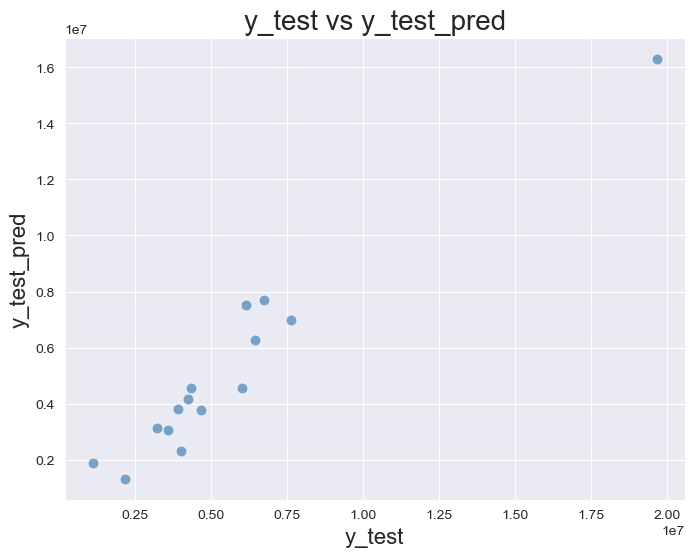

In [195]:
# Now let's use our model to make predictions.
X_train_ha_new = X_train_ha_new.drop('const', axis=1)

model_performance(X_train_ha_new, y_train_ha, X_test_ha, y_test_ha)

##### Gaming Acc

In [196]:
X_train_ga, y_train_ga, X_test_ga, y_test_ga = gen_train_test_df(gaming_accessory_df)

In [197]:
X_train_ga.head()

discount  deliverybdays_rsi   sla  product_procurement_sla  \
37     -0.85              -0.06  0.26                     0.32   
24      0.49               0.01  1.17                     0.35   
44     -0.02              -0.06  0.07                    -0.62   
33      0.95               0.01 -0.56                     0.92   
49     -0.50               3.71  0.00                    -1.60   

    buy_period_month_end  buy_period_normal  buy_period_start_of_month  \
37                  0.00               0.31                       0.00   
24                  0.00               1.16                       0.00   
44                  0.00               0.01                       1.62   
33                  0.00               1.78                       0.00   
49                  0.00               0.56                       0.00   

    discount_percent  order_payment_type_Prepaid  pay_day  ...  total_rain_mm  \
37             -0.24                        0.01     0.00  ...          -0.66   
24              0.91                        0.38     0.00  ...          -0.02   
44              0.29                       -0.13     0.00  ...           0.10   
33              1.56                        1.44     0.00  ...          -0.33   
49              0.15                       -0.04     0.00  ...          -1.01   

    total_snow_cm  snow_on_ground_cm  TV_adstock  Digital_adstock  \
37           0.12               0.25        0.90             0.45   
24           0.00               0.00        0.20             0.87   
44           0.00               0.00       -0.80            -0.45   
33           1.51               5.86       -0.60            -0.12   
49           0.00               0.00       -1.15            -0.24   

    Sponsorship_adstock  Online_adstock  Radio_adstock  NPS_Score  Stock_Index  
37                 0.16           -0.08           0.50       0.48        -1.05  
24                 0.73            0.41          -0.50      -0.42        -0.92  
44                 0.00            0.24           0.76       0.00         0.20  
33                -0.97            0.00           1.05       0.84         0.16  
49                -0.18           -0.76           0.21       0.89         0.00  

[5 rows x 37 columns]

In [198]:
# Creating a simple Linear Regression model and applying RFE
lm = LinearRegression()
lm.fit(X_train_ga, y_train_ga)
rfe = RFE(estimator=lm, n_features_to_select=7)
rfe = rfe.fit(X_train_ga, y_train_ga)

In [199]:
# List columns from RFE
X_train_ga.columns[rfe.support_]

Index(['buy_period_normal', 'discount_percent',
       'product_analytic_vertical_GamingAccessoryKit',
       'product_analytic_vertical_GamingGun', 'avg_order_value',
       'Online_adstock', 'Radio_adstock'],
      dtype='object')

In [200]:
X_train_rfe_ga = X_train_ga[X_train_ga.columns[rfe.support_]]
X_train_rfe_ga.head()

buy_period_normal  discount_percent  \
37               0.31             -0.24   
24               1.16              0.91   
44               0.01              0.29   
33               1.78              1.56   
49               0.56              0.15   

    product_analytic_vertical_GamingAccessoryKit  \
37                                          0.03   
24                                         -0.10   
44                                          0.02   
33                                         -0.58   
49                                          0.28   

    product_analytic_vertical_GamingGun  avg_order_value  Online_adstock  \
37                                 0.00             0.51           -0.08   
24                                 0.00            -0.66            0.41   
44                                 0.00             0.62            0.24   
33                                 0.00            -1.22            0.00   
49                                 0.00             0.62           -0.76   

    Radio_adstock  
37           0.50  
24          -0.50  
44           0.76  
33           1.05  
49           0.21

In [201]:
# Model 1
X_train_ga_new = build_model(X_train_rfe_ga, y_train_ga)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     200.8
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           8.22e-23
Time:                        15:51:51   Log-Likelihood:                -499.94
No. Observations:                  37   AIC:                             1016.
Df Residuals:                      29   BIC:                             1029.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [202]:
X_train_ga_new = X_train_ga_new.drop('product_analytic_vertical_GamingGun', axis=1)

In [203]:
# Model 2
X_train_ga_new = build_model(X_train_ga_new, y_train_ga)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     233.7
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           8.60e-24
Time:                        15:51:51   Log-Likelihood:                -500.61
No. Observations:                  37   AIC:                             1015.
Df Residuals:                      30   BIC:                             1026.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

##### Making Prediction on Test Data and checking performance

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     233.7
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           8.60e-24
Time:                        15:51:51   Log-Likelihood:                -500.61
No. Observations:                  37   AIC:                             1015.
Df Residuals:                      30   BIC:                             1026.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

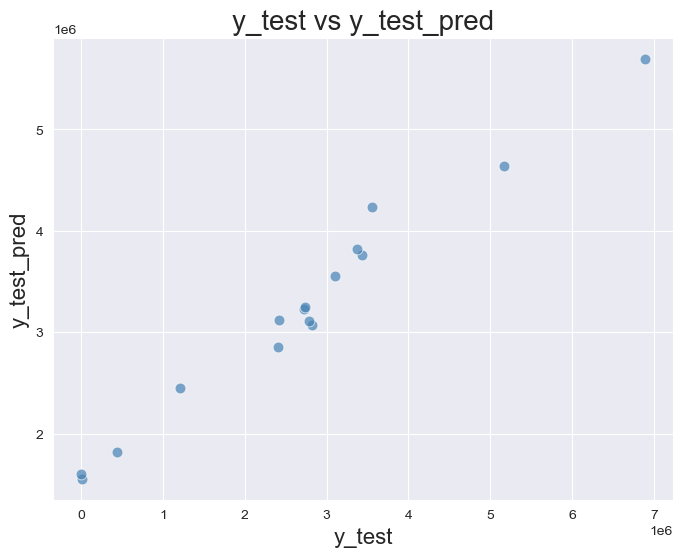

In [204]:
# Now let's use our model to make predictions.
X_train_ga_new = X_train_ga_new.drop('const', axis=1)

model_performance(X_train_ga_new, y_train_ga, X_test_ga, y_test_ga)

##### Multiplicative model

In [205]:
camera_accessory_df.describe()

discount  deliverybdays_rsi  deliverycdays_rsi   sla  \
count     52.00              52.00              52.00 52.00   
mean     978.75               4.55               5.25  6.18   
std      189.44               0.30               0.46  0.60   
min      125.00               3.25               3.00  4.76   
25%      892.07               4.49               5.22  5.87   
50%      972.36               4.52               5.26  6.13   
75%     1037.19               4.56               5.30  6.41   
max     1691.00               6.00               7.00  9.25   

       product_procurement_sla  buy_period_month_end  buy_period_normal  \
count                    52.00                 52.00              52.00   
mean                      2.58                455.83            3019.54   
std                       0.34                799.37            2053.27   
min                       1.00                  0.00               0.00   
25%                       2.43                  0.00            1638.50   
50%                       2.58                  0.00            3266.50   
75%                       2.72                648.50            4281.75   
max                       4.00               3173.00            9626.00   

       buy_period_start_of_month  discount_percent         gmv  ...  \
count                      52.00             52.00       52.00  ...   
mean                      665.19           2001.99  4994612.12  ...   
std                      1186.03           1110.72  2304978.83  ...   
min                         0.00             -0.35      299.00  ...   
25%                         0.00           1414.78  4458748.00  ...   
50%                         0.00           1925.80  5023827.50  ...   
75%                       967.50           2537.53  5795515.50  ...   
max                      4212.00           5511.66 13025511.76  ...   

       product_analytic_vertical_Teleconverter  sale_day  avg_order_value  \
count                                    52.00     52.00            52.00   
mean                                      0.02    664.35          1174.94   
std                                       0.14   1494.55           240.29   
min                                       0.00      0.00           299.00   
25%                                       0.00      0.00          1017.18   
50%                                       0.00      0.00          1216.40   
75%                                       0.00    230.50          1354.60   
max                                       1.00   8210.00          1522.25   

       TV_adstock  Digital_adstock  Sponsorship_adstock  Online_adstock  \
count       52.00            52.00                52.00           52.00   
mean         1.28             0.81                10.37            5.58   
std          0.79             0.70                 6.67            2.63   
min          0.02             0.28                 1.01            0.17   
25%          0.77             0.44                 6.82            4.55   
50%          1.37             0.50                10.06            6.72   
75%          1.80             0.77                12.97            7.33   
max          2.58             2.69                24.78            8.54   

       Radio_adstock  NPS_Score  Stock_Index  
count          52.00      52.00        52.00  
mean            0.15      49.44      1163.67  
std             0.19       3.90        79.49  
min             0.00      44.40      1015.00  
25%             0.00      46.98      1101.00  
50%             0.11      49.02      1200.00  
75%             0.23      50.84      1223.50  
max             0.68      59.99      1242.00  

[8 rows x 41 columns]

In [206]:
ca_log = np.log(camera_accessory_df.replace(0.0, 0.000001) + 1)

In [207]:
ca_log.head()

discount  deliverybdays_rsi  deliverycdays_rsi  sla  \
0      7.04               1.68               1.80 1.93   
1      6.93               1.71               1.83 2.10   
2      6.95               1.70               1.84 1.98   
3      6.91               1.70               1.84 2.01   
4      6.85               1.71               1.83 2.01   

   product_procurement_sla  buy_period_month_end  buy_period_normal  \
0                     1.31                  0.00               6.26   
1                     1.29                  0.00               8.11   
2                     1.30                  0.00               7.92   
3                     1.30                  6.03               7.89   
4                     1.30                  7.15               0.00   

   buy_period_start_of_month  discount_percent   gmv  ...  \
0                       3.37              5.39 13.56  ...   
1                       0.00              7.10 15.35  ...   
2                       0.00              7.19 15.38  ...   
3                       0.00              7.15 15.26  ...   
4                       1.10              6.24 14.32  ...   

   product_analytic_vertical_Teleconverter  sale_day  avg_order_value  \
0                                     0.00      0.00             7.25   
1                                     0.00      0.00             7.24   
2                                     0.00      6.82             7.29   
3                                     0.00      0.00             7.22   
4                                     0.00      0.00             7.17   

   TV_adstock  Digital_adstock  Sponsorship_adstock  Online_adstock  \
0        0.04             0.41                 0.91            0.24   
1        0.04             0.41                 0.91            0.24   
2        0.04             0.41                 0.91            0.24   
3        0.04             0.41                 0.91            0.24   
4        0.04             0.41                 0.91            0.24   

   Radio_adstock  NPS_Score  Stock_Index  
0           0.00       4.02         7.07  
1           0.00       4.02         7.07  
2           0.00       4.02         7.07  
3           0.00       4.02         7.07  
4           0.00       4.02         7.07  

[5 rows x 41 columns]

In [208]:
X_train_ca, y_train_ca, X_test_ca, y_test_ca = gen_train_test_df(ca_log)

In [209]:
# Creating a simple Linear Regression model and applying RFE
lm = LinearRegression()
lm.fit(X_train_ca, y_train_ca)
rfe = RFE(estimator=lm, n_features_to_select=10)
rfe = rfe.fit(X_train_ca, y_train_ca)

In [210]:
# List columns from RFE
X_train_ca.columns[rfe.support_]

Index(['discount_percent', 'product_analytic_vertical_CameraAccessory',
       'product_analytic_vertical_CameraBattery',
       'product_analytic_vertical_CameraBatteryGrip',
       'product_analytic_vertical_CameraEyeCup',
       'product_analytic_vertical_ExtensionTube',
       'product_analytic_vertical_FlashShoeAdapter',
       'product_analytic_vertical_ReflectorUmbrella', 'avg_order_value',
       'Stock_Index'],
      dtype='object')

In [211]:
X_train_rfe_ca = X_train_ca[X_train_ca.columns[rfe.support_]]
X_train_rfe_ca.head()

discount_percent  product_analytic_vertical_CameraAccessory  \
37              0.28                                      -1.09   
24             -0.42                                       0.24   
44              0.63                                       0.03   
33              0.80                                       1.18   
49             -0.03                                      -0.27   

    product_analytic_vertical_CameraBattery  \
37                                     1.88   
24                                    -0.37   
44                                    -0.04   
33                                     1.23   
49                                    -0.82   

    product_analytic_vertical_CameraBatteryGrip  \
37                                         0.15   
24                                         0.40   
44                                        -0.36   
33                                        -0.60   
49                                        -0.36   

    product_analytic_vertical_CameraEyeCup  \
37                                    0.00   
24                                   -0.50   
44                                    0.90   
33                                    0.79   
49                                    1.35   

    product_analytic_vertical_ExtensionTube  \
37                                     0.50   
24                                     0.00   
44                                    -0.50   
33                                     0.29   
49                                    -0.50   

    product_analytic_vertical_FlashShoeAdapter  \
37                                        0.00   
24                                        0.00   
44                                        0.00   
33                                        0.69   
49                                        0.00   

    product_analytic_vertical_ReflectorUmbrella  avg_order_value  Stock_Index  
37                                         0.00            -0.93        -1.08  
24                                         0.00             0.72        -0.93  
44                                         0.00            -0.52         0.19  
33                                         0.00            -1.49         0.15  
49                                         0.00            -0.21         0.00

In [212]:
# Model 1
X_train_ca_new = build_model(X_train_rfe_ca, y_train_ca)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     675.3
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           7.92e-28
Time:                        15:51:52   Log-Likelihood:                 67.322
No. Observations:                  36   AIC:                            -112.6
Df Residuals:                      25   BIC:                            -95.23
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [213]:
X_train_ca_new = X_train_ca_new.drop('discount_percent', axis=1)

In [214]:
# Model 2
X_train_ca_new = build_model(X_train_ca_new, y_train_ca)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     61.05
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           3.33e-15
Time:                        15:51:52   Log-Likelihood:                 22.221
No. Observations:                  36   AIC:                            -24.44
Df Residuals:                      26   BIC:                            -8.607
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [215]:
X_train_ca_new = X_train_ca_new.drop('product_analytic_vertical_ReflectorUmbrella', axis=1)

In [216]:
# Model 3
X_train_ca_new = build_model(X_train_ca_new, y_train_ca)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     70.90
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           4.08e-16
Time:                        15:51:52   Log-Likelihood:                 22.119
No. Observations:                  36   AIC:                            -26.24
Df Residuals:                      27   BIC:                            -11.99
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [217]:
X_train_ca_new = X_train_ca_new.drop('Stock_Index', axis=1)

In [218]:
# Model 4
X_train_ca_new = build_model(X_train_ca_new, y_train_ca)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     83.49
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           4.62e-17
Time:                        15:51:52   Log-Likelihood:                 22.010
No. Observations:                  36   AIC:                            -28.02
Df Residuals:                      28   BIC:                            -15.35
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [219]:
X_train_ca_new = X_train_ca_new.drop('product_analytic_vertical_ExtensionTube', axis=1)

In [220]:
# Model 5
X_train_ca_new = build_model(X_train_ca_new, y_train_ca)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     99.78
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           5.08e-18
Time:                        15:51:52   Log-Likelihood:                 21.820
No. Observations:                  36   AIC:                            -29.64
Df Residuals:                      29   BIC:                            -18.56
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [221]:
X_train_ca_new = X_train_ca_new.drop('product_analytic_vertical_CameraBatteryGrip', axis=1)

In [222]:
# Model 6
X_train_ca_new = build_model(X_train_ca_new, y_train_ca)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     117.3
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           9.33e-19
Time:                        15:51:52   Log-Likelihood:                 20.887
No. Observations:                  36   AIC:                            -29.77
Df Residuals:                      30   BIC:                            -20.27
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [223]:
X_train_ca_new = X_train_ca_new.drop('avg_order_value', axis=1)

In [224]:
# Model 7
X_train_ca_new = build_model(X_train_ca_new, y_train_ca)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     138.6
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           2.60e-19
Time:                        15:51:52   Log-Likelihood:                 19.365
No. Observations:                  36   AIC:                            -28.73
Df Residuals:                      31   BIC:                            -20.81
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [225]:
X_train_ca_new = X_train_ca_new.drop('product_analytic_vertical_CameraEyeCup', axis=1)

In [226]:
# Model 8
X_train_ca_new = build_model(X_train_ca_new, y_train_ca)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     172.3
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           7.97e-20
Time:                        15:51:52   Log-Likelihood:                 17.637
No. Observations:                  36   AIC:                            -27.27
Df Residuals:                      32   BIC:                            -20.94
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                     172.3
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           7.97e-20
Time:                        15:51:52   Log-Likelihood:                 17.637
No. Observations:                  36   AIC:                            -27.27
Df Residuals:                      32   BIC:                            -20.94
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

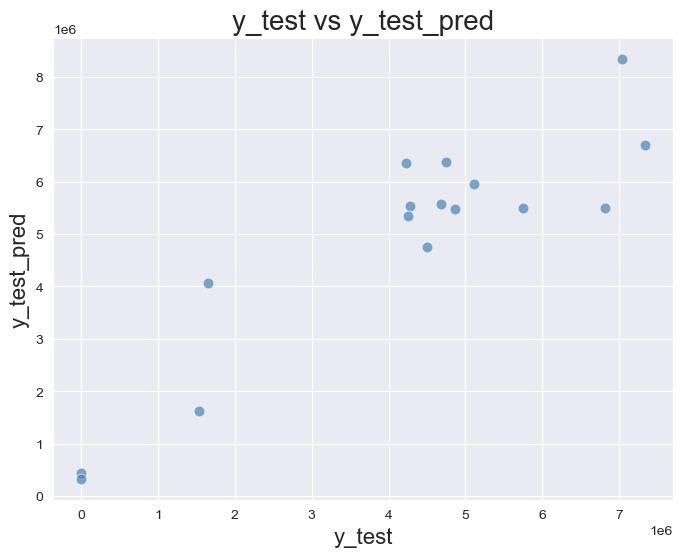

In [227]:
# Now let's use our model to make predictions.
X_train_ca_new = X_train_ca_new.drop('const', axis=1)

log_model_performance(X_train_ca_new, y_train_ca, X_test_ca, y_test_ca)

##### Home Audio

In [228]:
home_audio_df.describe()

discount  deliverybdays_rsi   sla  product_procurement_sla  \
count     50.00              50.00 50.00                    50.00   
mean    1559.68               4.45  5.66                     2.56   
std      349.73               0.30  0.76                     0.20   
min     1178.29               3.09  3.81                     1.61   
25%     1306.79               4.43  5.20                     2.49   
50%     1431.80               4.50  5.57                     2.57   
75%     1705.03               4.54  6.04                     2.67   
max     2418.99               5.11  7.45                     2.92   

       buy_period_month_end  buy_period_normal  buy_period_start_of_month  \
count                 50.00              50.00                      50.00   
mean                 226.86            1661.94                     333.06   
std                  401.92            1237.95                     568.06   
min                    0.00               0.00                       0.00   
25%                    0.00             994.25                       0.00   
50%                    0.00            1603.00                       0.00   
75%                  322.75            2120.25                     535.00   
max                 1694.00            7021.00                    2134.00   

       discount_percent         gmv  order_payment_type_Prepaid  ...  \
count             50.00       50.00                       50.00  ...   
mean             841.26  4970257.94                      568.20  ...   
std              513.69  2803808.20                      388.41  ...   
min               62.49   463288.00                       32.00  ...   
25%              599.28  3832889.00                      409.25  ...   
50%              749.33  4453897.75                      468.50  ...   
75%             1023.11  5985081.99                      594.00  ...   
max             3309.49 19645646.00                     1996.00  ...   

       total_rain_mm  total_snow_cm  snow_on_ground_cm  TV_adstock  \
count          50.00          50.00              50.00       50.00   
mean           17.92           1.88               3.17        1.33   
std            14.74           3.31               6.80        0.76   
min             0.00           0.00               0.00        0.02   
25%             8.78           0.00               0.00        0.86   
50%            14.93           0.00               0.00        1.67   
75%            21.51           3.21               1.88        1.85   
max            69.39          14.23              34.50        2.58   

       Digital_adstock  Sponsorship_adstock  Online_adstock  Radio_adstock  \
count            50.00                50.00           50.00          50.00   
mean              0.82                10.74            5.80           0.15   
std               0.71                 6.52            2.44           0.20   
min               0.28                 1.01            0.17           0.00   
25%               0.44                 8.14            4.55           0.00   
50%               0.50                10.21            6.84           0.11   
75%               0.87                14.87            7.33           0.26   
max               2.69                24.78            8.54           0.68   

       NPS_Score  Stock_Index  
count      50.00        50.00  
mean       49.02      1161.98  
std         3.33        80.62  
min        44.40      1015.00  
25%        46.94      1101.00  
50%        48.16      1194.00  
75%        50.52      1226.50  
max        59.99      1242.00  

[8 rows x 35 columns]

In [229]:
ha_log = np.log(home_audio_df.replace(0.0, 0.000001) + 1)

In [230]:
ha_log.head()

discount  deliverybdays_rsi  sla  product_procurement_sla  \
0      7.19               1.67 2.00                     1.30   
1      7.15               1.71 2.13                     1.31   
2      7.24               1.72 2.08                     1.31   
3      7.17               1.71 2.10                     1.31   
4      7.23               1.71 2.12                     1.30   

   buy_period_month_end  buy_period_normal  buy_period_start_of_month  \
0                  0.00               5.93                       3.71   
1                  0.00               7.85                       0.00   
2                  0.00               7.64                       0.00   
3                  5.78               7.56                       0.00   
4                  6.90               0.00                       0.69   

   discount_percent   gmv  order_payment_type_Prepaid  ...  total_rain_mm  \
0              4.89 13.80                        4.73  ...           2.41   
1              6.67 15.53                        6.45  ...           3.10   
2              6.68 15.51                        6.33  ...           2.21   
3              6.57 15.36                        6.17  ...           1.86   
4              5.76 14.58                        5.46  ...           3.52   

   total_snow_cm  snow_on_ground_cm  TV_adstock  Digital_adstock  \
0           0.00               0.00        0.04             0.41   
1           0.00               0.00        0.04             0.41   
2           0.00               0.00        0.04             0.41   
3           0.00               0.00        0.04             0.41   
4           0.00               0.00        0.04             0.41   

   Sponsorship_adstock  Online_adstock  Radio_adstock  NPS_Score  Stock_Index  
0                 0.91            0.24           0.00       4.02         7.07  
1                 0.91            0.24           0.00       4.02         7.07  
2                 0.91            0.24           0.00       4.02         7.07  
3                 0.91            0.24           0.00       4.02         7.07  
4                 0.91            0.24           0.00       4.02         7.07  

[5 rows x 35 columns]

In [231]:
X_train_ha, y_train_ha, X_test_ha, y_test_ha = gen_train_test_df(ha_log)

In [232]:
# Creating a simple Linear Regression model and applying RFE
lm = LinearRegression()
lm.fit(X_train_ha, y_train_ha)
rfe = RFE(estimator=lm, n_features_to_select=10)
rfe = rfe.fit(X_train_ha, y_train_ha)

In [233]:
# List columns from RFE
X_train_ha.columns[rfe.support_]

Index(['discount', 'discount_percent', 'premium_product',
       'product_analytic_vertical_FMRadio',
       'product_analytic_vertical_SlingBox', 'cool_deg_days', 'TV_adstock',
       'Sponsorship_adstock', 'Online_adstock', 'NPS_Score'],
      dtype='object')

In [234]:
X_train_rfe_ha = X_train_ha[X_train_ha.columns[rfe.support_]]
X_train_rfe_ha.head()

discount  discount_percent  premium_product  \
6       0.38              0.00             0.68   
41     -0.26             -0.29            -0.73   
46     -0.76             -0.76            -0.51   
47     -0.75             -1.20            -0.56   
15      2.65              1.85             0.81   

    product_analytic_vertical_FMRadio  product_analytic_vertical_SlingBox  \
6                                0.59                                0.00   
41                              -0.06                                0.00   
46                               0.00                                0.00   
47                              -1.19                                0.00   
15                               0.74                                0.00   

    cool_deg_days  TV_adstock  Sponsorship_adstock  Online_adstock  NPS_Score  
6            1.44       -0.11                 0.82           -1.02      -0.11  
41           0.55       -0.25                 0.00            0.21       0.00  
46           1.05       -0.76                -0.27           -0.82       0.90  
47           1.45       -0.76                -0.27           -0.82       0.90  
15          -0.02        0.62                 0.28            0.14      -0.09

In [235]:
# Model 1
X_train_ha_new = build_model(X_train_rfe_ha, y_train_ha)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     531.5
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           1.22e-25
Time:                        15:51:53   Log-Likelihood:                 61.976
No. Observations:                  35   AIC:                            -102.0
Df Residuals:                      24   BIC:                            -84.84
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [236]:
X_train_ha_new = X_train_ha_new.drop('discount_percent', axis=1)

In [237]:
# Model 2
X_train_ha_new = build_model(X_train_ha_new, y_train_ha)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     70.15
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           1.69e-15
Time:                        15:51:53   Log-Likelihood:                 24.582
No. Observations:                  35   AIC:                            -29.16
Df Residuals:                      25   BIC:                            -13.61
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [238]:
X_train_ha_new = X_train_ha_new.drop('Sponsorship_adstock', axis=1)

In [239]:
# Model 3
X_train_ha_new = build_model(X_train_ha_new, y_train_ha)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     82.05
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           1.79e-16
Time:                        15:51:53   Log-Likelihood:                 24.577
No. Observations:                  35   AIC:                            -31.15
Df Residuals:                      26   BIC:                            -17.16
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [240]:
X_train_ha_new = X_train_ha_new.drop('product_analytic_vertical_SlingBox', axis=1)

In [241]:
# Model 4
X_train_ha_new = build_model(X_train_ha_new, y_train_ha)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     97.24
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           1.77e-17
Time:                        15:51:53   Log-Likelihood:                 24.552
No. Observations:                  35   AIC:                            -33.10
Df Residuals:                      27   BIC:                            -20.66
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [242]:
X_train_ha_new = X_train_ha_new.drop('cool_deg_days', axis=1)

In [243]:
# Model 5
X_train_ha_new = build_model(X_train_ha_new, y_train_ha)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     116.2
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           1.82e-18
Time:                        15:51:53   Log-Likelihood:                 24.346
No. Observations:                  35   AIC:                            -34.69
Df Residuals:                      28   BIC:                            -23.81
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [244]:
X_train_ha_new = X_train_ha_new.drop('TV_adstock', axis=1)

In [245]:
# Model 6
X_train_ha_new = build_model(X_train_ha_new, y_train_ha)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     136.5
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           3.13e-19
Time:                        15:51:53   Log-Likelihood:                 23.396
No. Observations:                  35   AIC:                            -34.79
Df Residuals:                      29   BIC:                            -25.46
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [246]:
X_train_ha_new = X_train_ha_new.drop('NPS_Score', axis=1)

In [247]:
# Model 7
X_train_ha_new = build_model(X_train_ha_new, y_train_ha)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     154.5
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           1.48e-19
Time:                        15:51:53   Log-Likelihood:                 21.162
No. Observations:                  35   AIC:                            -32.32
Df Residuals:                      30   BIC:                            -24.55
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     154.5
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           1.48e-19
Time:                        15:51:53   Log-Likelihood:                 21.162
No. Observations:                  35   AIC:                            -32.32
Df Residuals:                      30   BIC:                            -24.55
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

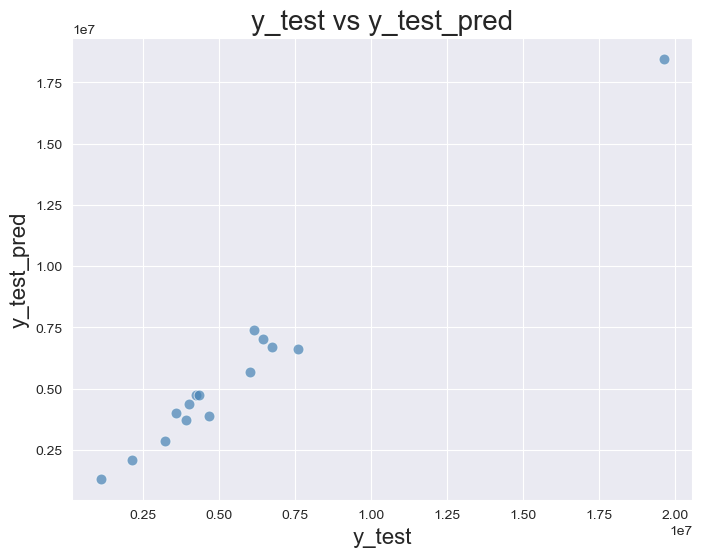

In [248]:
# Now let's use our model to make predictions.
X_train_ha_new = X_train_ha_new.drop('const', axis=1)

log_model_performance(X_train_ha_new, y_train_ha, X_test_ha, y_test_ha)

##### Gaming Accessory

In [249]:
gaming_accessory_df.head()

discount  deliverybdays_rsi  sla  product_procurement_sla  \
0    940.02               4.43 4.10                     3.23   
1    848.25               4.54 5.98                     2.75   
2   1111.26               4.59 5.04                     2.58   
3   1106.63               4.53 5.33                     2.25   
4   5146.52               4.61 5.57                     3.37   

   buy_period_month_end  buy_period_normal  buy_period_start_of_month  \
0                  0.00             948.00                      32.00   
1                  0.00            2760.00                       0.00   
2                  0.00            2587.00                       0.00   
3                353.00            2220.00                       0.00   
4               1163.00               0.00                       3.00   

   discount_percent        gmv  order_payment_type_Prepaid  ...  \
0            433.44  816295.00                      314.00  ...   
1            977.27 2633284.00                      666.00  ...   
2           1108.73 2432689.36                      719.00  ...   
3            912.81 2783059.50                      558.00  ...   
4            501.78 1205927.00                      242.00  ...   

   total_rain_mm  total_snow_cm  snow_on_ground_cm  TV_adstock  \
0          10.09           0.00               0.00        0.04   
1          21.19           0.00               0.00        0.04   
2           8.09           0.00               0.00        0.04   
3           5.40           0.00               0.00        0.04   
4          32.87           0.00               0.00        0.04   

   Digital_adstock  Sponsorship_adstock  Online_adstock  Radio_adstock  \
0             0.51                 1.48            0.27           0.00   
1             0.51                 1.48            0.27           0.00   
2             0.51                 1.48            0.27           0.00   
3             0.51                 1.48            0.27           0.00   
4             0.51                 1.48            0.27           0.00   

   NPS_Score  Stock_Index  
0      54.60      1177.00  
1      54.60      1177.00  
2      54.60      1177.00  
3      54.60      1177.00  
4      54.60      1177.00  

[5 rows x 38 columns]

In [250]:
ga_log = np.log(gaming_accessory_df.replace(0.0, 0.000001) + 1)

In [251]:
ga_log.describe()

discount  deliverybdays_rsi   sla  product_procurement_sla  \
count     53.00              53.00 53.00                    53.00   
mean       6.86               1.71  1.89                     1.23   
std        0.50               0.05  0.09                     0.12   
min        5.79               1.44  1.50                     0.69   
25%        6.54               1.70  1.87                     1.19   
50%        6.76               1.71  1.90                     1.25   
75%        6.97               1.72  1.93                     1.28   
max        8.55               1.82  2.08                     1.49   

       buy_period_month_end  buy_period_normal  buy_period_start_of_month  \
count                 53.00              53.00                      53.00   
mean                   2.14               6.62                       2.32   
std                    3.21               2.88                       3.38   
min                    0.00               0.00                       0.00   
25%                    0.00               7.09                       0.00   
50%                    0.00               7.90                       0.00   
75%                    6.03               8.13                       6.48   
max                    7.82               9.10                       8.06   

       discount_percent   gmv  order_payment_type_Prepaid  ...  total_rain_mm  \
count             53.00 53.00                       53.00  ...          53.00   
mean               6.89 14.45                        6.26  ...           2.67   
std                1.60  1.81                        1.58  ...           0.81   
min                0.59  6.85                        0.00  ...           0.00   
25%                6.92 14.71                        6.33  ...           2.27   
50%                7.28 14.95                        6.54  ...           2.81   
75%                7.62 15.11                        6.79  ...           3.12   
max                8.65 15.82                        8.26  ...           4.25   

       total_snow_cm  snow_on_ground_cm  TV_adstock  Digital_adstock  \
count          53.00              53.00       53.00            53.00   
mean            0.60               0.63        0.74             0.54   
std             0.84               1.06        0.40             0.30   
min             0.00               0.00        0.02             0.25   
25%             0.00               0.00        0.41             0.36   
50%             0.00               0.00        0.72             0.40   
75%             1.35               0.93        1.02             0.54   
max             2.72               3.57        1.28             1.31   

       Sponsorship_adstock  Online_adstock  Radio_adstock  NPS_Score  \
count                53.00           53.00          53.00      53.00   
mean                  2.18            1.70           0.12       3.92   
std                   0.77            0.71           0.15       0.08   
min                   0.70            0.15           0.00       3.82   
25%                   1.35            1.71           0.00       3.87   
50%                   2.40            2.03           0.10       3.91   
75%                   2.57            2.12           0.20       3.97   
max                   3.25            2.26           0.52       4.11   

       Stock_Index  
count        53.00  
mean          7.06  
std           0.07  
min           6.92  
25%           7.00  
50%           7.10  
75%           7.11  
max           7.13  

[8 rows x 38 columns]

In [252]:
X_train_ga, y_train_ga, X_test_ga, y_test_ga = gen_train_test_df(ga_log)

In [253]:
# Creating a simple Linear Regression model and applying RFE
lm = LinearRegression()
lm.fit(X_train_ga, y_train_ga)
rfe = RFE(estimator=lm, n_features_to_select=10)
rfe = rfe.fit(X_train_ga, y_train_ga)

In [254]:
# List columns from RFE
X_train_ga.columns[rfe.support_]

Index(['sla', 'discount_percent', 'pay_day',
       'product_analytic_vertical_GamingGun',
       'product_analytic_vertical_GamingSpeaker', 'avg_order_value',
       'cool_deg_days', 'TV_adstock', 'Sponsorship_adstock', 'NPS_Score'],
      dtype='object')

In [255]:
X_train_rfe_ga = X_train_ga[X_train_ga.columns[rfe.support_]]
X_train_rfe_ga.head()

sla  discount_percent  pay_day  product_analytic_vertical_GamingGun  \
37  0.25             -0.26     0.00                                 0.00   
24  1.12              0.73     0.00                                 0.00   
44  0.07              0.27     0.00                                 0.00   
33 -0.57              1.12     0.00                                 0.00   
49  0.00              0.15     0.00                                 0.00   

    product_analytic_vertical_GamingSpeaker  avg_order_value  cool_deg_days  \
37                                     0.00             0.50           0.00   
24                                     0.21            -0.70           0.00   
44                                     0.36             0.59           0.61   
33                                    -0.24            -1.39           0.00   
49                                     0.52             0.60           1.14   

    TV_adstock  Sponsorship_adstock  NPS_Score  
37        0.68                 0.17       0.48  
24        0.17                 0.66      -0.44  
44       -0.83                 0.00       0.00  
33       -0.59                -1.76       0.84  
49       -1.32                -0.21       0.89

In [256]:
# Model 1
X_train_ga_new = build_model(X_train_rfe_ga, y_train_ga)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2705.
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           1.40e-36
Time:                        15:51:53   Log-Likelihood:                 64.554
No. Observations:                  37   AIC:                            -107.1
Df Residuals:                      26   BIC:                            -89.39
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [257]:
X_train_ga_new = X_train_ga_new.drop('TV_adstock', axis=1)

In [258]:
# Model 2
X_train_ga_new = build_model(X_train_ga_new, y_train_ga)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2742.
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           1.38e-37
Time:                        15:51:54   Log-Likelihood:                 62.156
No. Observations:                  37   AIC:                            -104.3
Df Residuals:                      27   BIC:                            -88.20
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [259]:
X_train_ga_new = X_train_ga_new.drop('product_analytic_vertical_GamingGun', axis=1)

In [260]:
# Model 3
X_train_ga_new = build_model(X_train_ga_new, y_train_ga)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3179.
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           2.56e-39
Time:                        15:51:54   Log-Likelihood:                 62.044
No. Observations:                  37   AIC:                            -106.1
Df Residuals:                      28   BIC:                            -91.59
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [261]:
X_train_ga_new = X_train_ga_new.drop('cool_deg_days', axis=1)

In [262]:
# Model 4
X_train_ga_new = build_model(X_train_ga_new, y_train_ga)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3652.
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           6.18e-41
Time:                        15:51:54   Log-Likelihood:                 61.488
No. Observations:                  37   AIC:                            -107.0
Df Residuals:                      29   BIC:                            -94.09
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [263]:
X_train_ga_new = X_train_ga_new.drop('NPS_Score', axis=1)

In [264]:
# Model 5
X_train_ga_new = build_model(X_train_ga_new, y_train_ga)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     3903.
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           5.46e-42
Time:                        15:51:54   Log-Likelihood:                 59.242
No. Observations:                  37   AIC:                            -104.5
Df Residuals:                      30   BIC:                            -93.21
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [265]:
X_train_ga_new = X_train_ga_new.drop('Sponsorship_adstock', axis=1)

In [266]:
# Model 6
X_train_ga_new = build_model(X_train_ga_new, y_train_ga)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     4748.
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           9.96e-44
Time:                        15:51:54   Log-Likelihood:                 58.889
No. Observations:                  37   AIC:                            -105.8
Df Residuals:                      31   BIC:                            -96.11
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [267]:
X_train_ga_new = X_train_ga_new.drop('pay_day', axis=1)

In [268]:
# Model 7
X_train_ga_new = build_model(X_train_ga_new, y_train_ga)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     5476.
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           7.14e-45
Time:                        15:51:54   Log-Likelihood:                 56.815
No. Observations:                  37   AIC:                            -103.6
Df Residuals:                      32   BIC:                            -95.58
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     5476.
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           7.14e-45
Time:                        15:51:54   Log-Likelihood:                 56.815
No. Observations:                  37   AIC:                            -103.6
Df Residuals:                      32   BIC:                            -95.58
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

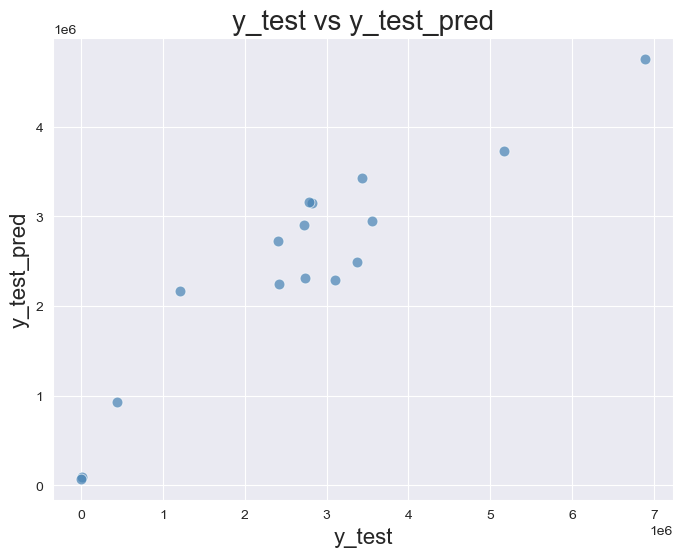

In [269]:
# Now let's use our model to make predictions.
X_train_ga_new = X_train_ga_new.drop('const', axis=1)

log_model_performance(X_train_ga_new, y_train_ga, X_test_ga, y_test_ga)

### Distributed Lag Model

In [270]:
def get_lag_data(param_df):
    lag_columns = ['discount', 'discount_percent', 'avg_order_value', 
                   'gmv', 'sla', 'product_procurement_sla', 
                   'deliverybdays_rsi', 'deliverycdays_rsi',
                  'NPS_Score', 'Stock_Index', 'avg_order_value']
    
    for col in lag_columns:
        if col in param_df.columns:
            for lag in [1, 2, 3]:
                param_df[f'lag_{lag}_{col}'] = param_df[col].shift(lag).fillna(0)
        else:
            print(f"⚠️ Column '{col}' not found — skipping.")
    
    return param_df

##### Camera Accessory

In [271]:
camera_accessory_df.head()

discount  deliverybdays_rsi  deliverycdays_rsi  sla  \
0   1139.44               4.36               5.05 5.91   
1   1024.52               4.50               5.22 7.19   
2   1037.45               4.48               5.27 6.24   
3    998.85               4.46               5.29 6.44   
4    944.43               4.54               5.26 6.50   

   product_procurement_sla  buy_period_month_end  buy_period_normal  \
0                     2.72                  0.00             520.00   
1                     2.63                  0.00            3338.00   
2                     2.68                  0.00            2739.00   
3                     2.67                414.00            2665.00   
4                     2.68               1268.00               0.00   

   buy_period_start_of_month  discount_percent        gmv  ...  \
0                      28.00            219.00  772460.00  ...   
1                       0.00           1216.13 4631123.00  ...   
2                       0.00           1319.93 4796630.00  ...   
3                       0.00           1270.57 4222553.00  ...   
4                       2.00            511.35 1654575.00  ...   

   product_analytic_vertical_Teleconverter  sale_day  avg_order_value  \
0                                     0.00         0          1409.60   
1                                     0.00         0          1387.39   
2                                     0.00       916          1471.81   
3                                     0.00         0          1371.40   
4                                     0.00         0          1302.81   

   TV_adstock  Digital_adstock  Sponsorship_adstock  Online_adstock  \
0        0.04             0.51                 1.48            0.27   
1        0.04             0.51                 1.48            0.27   
2        0.04             0.51                 1.48            0.27   
3        0.04             0.51                 1.48            0.27   
4        0.04             0.51                 1.48            0.27   

   Radio_adstock  NPS_Score  Stock_Index  
0           0.00      54.60      1177.00  
1           0.00      54.60      1177.00  
2           0.00      54.60      1177.00  
3           0.00      54.60      1177.00  
4           0.00      54.60      1177.00  

[5 rows x 41 columns]

In [272]:
ca_lagged = get_lag_data(camera_accessory_df)

In [273]:
ca_lagged.head()

discount  deliverybdays_rsi  deliverycdays_rsi  sla  \
0   1139.44               4.36               5.05 5.91   
1   1024.52               4.50               5.22 7.19   
2   1037.45               4.48               5.27 6.24   
3    998.85               4.46               5.29 6.44   
4    944.43               4.54               5.26 6.50   

   product_procurement_sla  buy_period_month_end  buy_period_normal  \
0                     2.72                  0.00             520.00   
1                     2.63                  0.00            3338.00   
2                     2.68                  0.00            2739.00   
3                     2.67                414.00            2665.00   
4                     2.68               1268.00               0.00   

   buy_period_start_of_month  discount_percent        gmv  ...  \
0                      28.00            219.00  772460.00  ...   
1                       0.00           1216.13 4631123.00  ...   
2                       0.00           1319.93 4796630.00  ...   
3                       0.00           1270.57 4222553.00  ...   
4                       2.00            511.35 1654575.00  ...   

   lag_3_deliverybdays_rsi  lag_1_deliverycdays_rsi  lag_2_deliverycdays_rsi  \
0                     0.00                     0.00                     0.00   
1                     0.00                     5.05                     0.00   
2                     0.00                     5.22                     5.05   
3                     4.36                     5.27                     5.22   
4                     4.50                     5.29                     5.27   

   lag_3_deliverycdays_rsi  lag_1_NPS_Score  lag_2_NPS_Score  lag_3_NPS_Score  \
0                     0.00             0.00             0.00             0.00   
1                     0.00            54.60             0.00             0.00   
2                     0.00            54.60            54.60             0.00   
3                     5.05            54.60            54.60            54.60   
4                     5.22            54.60            54.60            54.60   

   lag_1_Stock_Index  lag_2_Stock_Index  lag_3_Stock_Index  
0               0.00               0.00               0.00  
1            1177.00               0.00               0.00  
2            1177.00            1177.00               0.00  
3            1177.00            1177.00            1177.00  
4            1177.00            1177.00            1177.00  

[5 rows x 71 columns]

In [274]:
X_train_ca, y_train_ca, X_test_ca, y_test_ca = gen_train_test_df(ca_lagged)

In [275]:
# Creating a simple Linear Regression model and applying RFE
lm = LinearRegression()
lm.fit(X_train_ca, y_train_ca)
rfe = RFE(estimator=lm, n_features_to_select=9)
rfe = rfe.fit(X_train_ca, y_train_ca)

In [276]:
# List columns from RFE
X_train_ca.columns[rfe.support_]

Index(['discount_percent', 'is_weekend', 'premium_product',
       'product_analytic_vertical_CameraAccessory',
       'product_analytic_vertical_ExtensionTube',
       'product_analytic_vertical_FlashShoeAdapter',
       'product_analytic_vertical_Strap', 'avg_order_value', 'TV_adstock'],
      dtype='object')

In [277]:
X_train_rfe_ca = X_train_ca[X_train_ca.columns[rfe.support_]]
X_train_rfe_ca.head()

discount_percent  is_weekend  premium_product  \
37              0.30        0.82            -1.14   
24             -0.37       -0.17             0.92   
44              0.74        0.93             0.55   
33              0.99        1.72            -0.94   
49             -0.03        0.15             0.18   

    product_analytic_vertical_CameraAccessory  \
37                                      -0.95   
24                                       0.28   
44                                       0.03   
33                                       1.63   
49                                      -0.28   

    product_analytic_vertical_ExtensionTube  \
37                                     0.67   
24                                     0.00   
44                                    -0.33   
33                                     0.33   
49                                    -0.33   

    product_analytic_vertical_FlashShoeAdapter  \
37                                        0.00   
24                                        0.00   
44                                        0.00   
33                                        1.00   
49                                        0.00   

    product_analytic_vertical_Strap  avg_order_value  TV_adstock  
37                             0.38            -0.82        0.90  
24                            -0.54             0.81        0.20  
44                             1.00            -0.48       -0.80  
33                             0.74            -1.22       -0.60  
49                             0.54            -0.21       -1.15

In [278]:
# Model 1
X_train_ca_new = build_model(X_train_rfe_ca, y_train_ca)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                     317.2
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           3.03e-24
Time:                        15:51:54   Log-Likelihood:                -492.42
No. Observations:                  36   AIC:                             1005.
Df Residuals:                      26   BIC:                             1021.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [279]:
X_train_ca_new = X_train_ca_new.drop('discount_percent', axis=1)

In [280]:
# Model 2
X_train_ca_new = build_model(X_train_ca_new, y_train_ca)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     133.9
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           1.09e-19
Time:                        15:51:54   Log-Likelihood:                -510.45
No. Observations:                  36   AIC:                             1039.
Df Residuals:                      27   BIC:                             1053.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [281]:
X_train_ca_new = X_train_ca_new.drop('avg_order_value', axis=1)

In [282]:
# Model 3
X_train_ca_new = build_model(X_train_ca_new, y_train_ca)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     158.0
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           8.74e-21
Time:                        15:51:54   Log-Likelihood:                -510.53
No. Observations:                  36   AIC:                             1037.
Df Residuals:                      28   BIC:                             1050.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [283]:
X_train_ca_new = X_train_ca_new.drop('product_analytic_vertical_FlashShoeAdapter', axis=1)

In [284]:
# Model 4
X_train_ca_new = build_model(X_train_ca_new, y_train_ca)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     175.2
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           2.01e-21
Time:                        15:51:54   Log-Likelihood:                -512.03
No. Observations:                  36   AIC:                             1038.
Df Residuals:                      29   BIC:                             1049.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [285]:
X_train_ca_new = X_train_ca_new.drop('is_weekend', axis=1)

In [286]:
# Model 5
X_train_ca_new = build_model(X_train_ca_new, y_train_ca)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     205.4
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           2.96e-22
Time:                        15:51:54   Log-Likelihood:                -513.04
No. Observations:                  36   AIC:                             1038.
Df Residuals:                      30   BIC:                             1048.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [287]:
X_train_ca_new = X_train_ca_new.drop('product_analytic_vertical_ExtensionTube', axis=1)

In [288]:
# Model 6
X_train_ca_new = build_model(X_train_ca_new, y_train_ca)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     240.3
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           7.49e-23
Time:                        15:51:54   Log-Likelihood:                -514.77
No. Observations:                  36   AIC:                             1040.
Df Residuals:                      31   BIC:                             1047.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

In [289]:
X_train_ca_new = X_train_ca_new.drop('TV_adstock', axis=1)

In [290]:
# Model 7
X_train_ca_new = build_model(X_train_ca_new, y_train_ca)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     304.2
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           1.37e-23
Time:                        15:51:54   Log-Likelihood:                -516.22
No. Observations:                  36   AIC:                             1040.
Df Residuals:                      32   BIC:                             1047.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     304.2
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           1.37e-23
Time:                        15:51:54   Log-Likelihood:                -516.22
No. Observations:                  36   AIC:                             1040.
Df Residuals:                      32   BIC:                             1047.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------

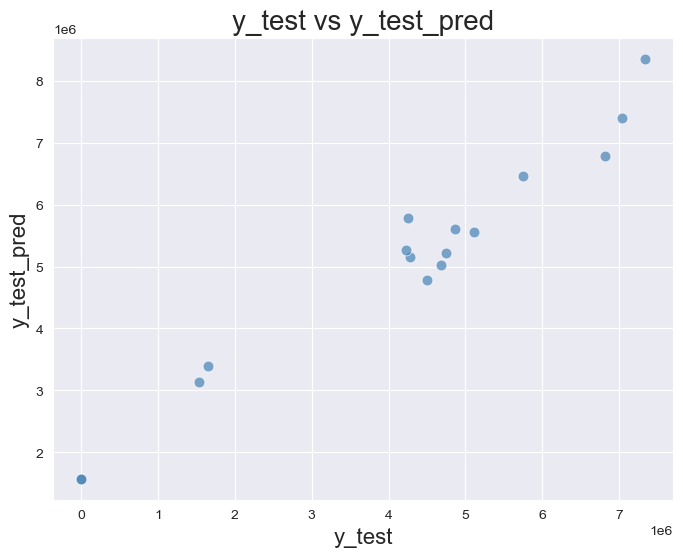

In [291]:
# Now let's use our model to make predictions.
X_train_ca_new = X_train_ca_new.drop('const', axis=1)

model_performance(X_train_ca_new, y_train_ca, X_test_ca, y_test_ca)

##### Home Audio

In [292]:
home_audio_df.head()

discount  deliverybdays_rsi  sla  product_procurement_sla  \
0   1321.15               4.30 6.42                     2.66   
1   1271.38               4.51 7.45                     2.70   
2   1388.55               4.57 6.99                     2.70   
3   1304.58               4.53 7.17                     2.71   
4   1385.25               4.53 7.37                     2.66   

   buy_period_month_end  buy_period_normal  buy_period_start_of_month  \
0                  0.00             377.00                      40.00   
1                  0.00            2563.00                       0.00   
2                  0.00            2088.00                       0.00   
3                323.00            1920.00                       0.00   
4                989.00               0.00                       1.00   

   discount_percent        gmv  order_payment_type_Prepaid  ...  \
0            131.34  985045.00                      112.00  ...   
1            789.81 5563350.13                      634.00  ...   
2            792.71 5450904.00                      561.00  ...   
3            710.91 4687963.00                      476.00  ...   
4            314.93 2157943.00                      235.00  ...   

   total_rain_mm  total_snow_cm  snow_on_ground_cm  TV_adstock  \
0          10.09           0.00               0.00        0.04   
1          21.19           0.00               0.00        0.04   
2           8.09           0.00               0.00        0.04   
3           5.40           0.00               0.00        0.04   
4          32.87           0.00               0.00        0.04   

   Digital_adstock  Sponsorship_adstock  Online_adstock  Radio_adstock  \
0             0.51                 1.48            0.27           0.00   
1             0.51                 1.48            0.27           0.00   
2             0.51                 1.48            0.27           0.00   
3             0.51                 1.48            0.27           0.00   
4             0.51                 1.48            0.27           0.00   

   NPS_Score  Stock_Index  
0      54.60      1177.00  
1      54.60      1177.00  
2      54.60      1177.00  
3      54.60      1177.00  
4      54.60      1177.00  

[5 rows x 35 columns]

In [293]:
ha_lagged = get_lag_data(home_audio_df)

⚠️ Column 'deliverycdays_rsi' not found — skipping.


In [294]:
ha_lagged.head()

discount  deliverybdays_rsi  sla  product_procurement_sla  \
0   1321.15               4.30 6.42                     2.66   
1   1271.38               4.51 7.45                     2.70   
2   1388.55               4.57 6.99                     2.70   
3   1304.58               4.53 7.17                     2.71   
4   1385.25               4.53 7.37                     2.66   

   buy_period_month_end  buy_period_normal  buy_period_start_of_month  \
0                  0.00             377.00                      40.00   
1                  0.00            2563.00                       0.00   
2                  0.00            2088.00                       0.00   
3                323.00            1920.00                       0.00   
4                989.00               0.00                       1.00   

   discount_percent        gmv  order_payment_type_Prepaid  ...  \
0            131.34  985045.00                      112.00  ...   
1            789.81 5563350.13                      634.00  ...   
2            792.71 5450904.00                      561.00  ...   
3            710.91 4687963.00                      476.00  ...   
4            314.93 2157943.00                      235.00  ...   

   lag_3_product_procurement_sla  lag_1_deliverybdays_rsi  \
0                           0.00                     0.00   
1                           0.00                     4.30   
2                           0.00                     4.51   
3                           2.66                     4.57   
4                           2.70                     4.53   

   lag_2_deliverybdays_rsi  lag_3_deliverybdays_rsi  lag_1_NPS_Score  \
0                     0.00                     0.00             0.00   
1                     0.00                     0.00            54.60   
2                     4.30                     0.00            54.60   
3                     4.51                     4.30            54.60   
4                     4.57                     4.51            54.60   

   lag_2_NPS_Score  lag_3_NPS_Score  lag_1_Stock_Index  lag_2_Stock_Index  \
0             0.00             0.00               0.00               0.00   
1             0.00             0.00            1177.00               0.00   
2            54.60             0.00            1177.00            1177.00   
3            54.60            54.60            1177.00            1177.00   
4            54.60            54.60            1177.00            1177.00   

   lag_3_Stock_Index  
0               0.00  
1               0.00  
2               0.00  
3            1177.00  
4            1177.00  

[5 rows x 62 columns]

In [295]:
X_train_ha, y_train_ha, X_test_ha, y_test_ha = gen_train_test_df(ha_lagged)

In [296]:
# Creating a simple Linear Regression model and applying RFE
lm = LinearRegression()
lm.fit(X_train_ha, y_train_ha)
rfe = RFE(estimator=lm, n_features_to_select=9)
rfe = rfe.fit(X_train_ha, y_train_ha)

In [297]:
# List columns from RFE
X_train_ha.columns[rfe.support_]

Index(['discount', 'discount_percent', 'premium_product',
       'product_analytic_vertical_Dock',
       'product_analytic_vertical_DockingStation',
       'product_analytic_vertical_FMRadio', 'avg_order_value', 'max_temp_c',
       'cool_deg_days'],
      dtype='object')

In [298]:
X_train_rfe_ha = X_train_ha[X_train_ha.columns[rfe.support_]]
X_train_rfe_ha.head()

discount  discount_percent  premium_product  \
6       0.38              0.00             0.85   
41     -0.24             -0.27            -0.65   
46     -0.67             -0.63            -0.48   
47     -0.66             -0.90            -0.52   
15      3.36              2.75             1.04   

    product_analytic_vertical_Dock  product_analytic_vertical_DockingStation  \
6                             0.48                                     -0.53   
41                           -1.11                                      1.20   
46                           -0.93                                      1.33   
47                           -1.00                                      1.20   
15                            0.15                                      0.00   

    product_analytic_vertical_FMRadio  avg_order_value  max_temp_c  \
6                                0.66            -0.41        0.78   
41                              -0.06            -0.38        0.00   
46                               0.00             0.09        0.98   
47                              -1.02             1.07        0.94   
15                               0.85             0.89        0.04   

    cool_deg_days  
6            2.06  
41           0.40  
46           1.11  
47           2.09  
15          -0.01

In [299]:
# Model 1
X_train_ha_new = build_model(X_train_rfe_ha, y_train_ha)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     452.6
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           2.14e-25
Time:                        15:51:55   Log-Likelihood:                -465.77
No. Observations:                  35   AIC:                             951.5
Df Residuals:                      25   BIC:                             967.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [300]:
X_train_ha_new = X_train_ha_new.drop('discount_percent', axis=1)

In [301]:
# Model 2
X_train_ha_new = build_model(X_train_ha_new, y_train_ha)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     67.19
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           2.11e-15
Time:                        15:51:55   Log-Likelihood:                -501.18
No. Observations:                  35   AIC:                             1020.
Df Residuals:                      26   BIC:                             1034.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [302]:
X_train_ha_new = X_train_ha_new.drop('cool_deg_days', axis=1)

In [303]:
# Model 3
X_train_ha_new = build_model(X_train_ha_new, y_train_ha)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     78.84
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           2.60e-16
Time:                        15:51:55   Log-Likelihood:                -501.37
No. Observations:                  35   AIC:                             1019.
Df Residuals:                      27   BIC:                             1031.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [304]:
X_train_ha_new = X_train_ha_new.drop('product_analytic_vertical_Dock', axis=1)

In [305]:
# Model 4
X_train_ha_new = build_model(X_train_ha_new, y_train_ha)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     93.08
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           3.50e-17
Time:                        15:51:55   Log-Likelihood:                -501.78
No. Observations:                  35   AIC:                             1018.
Df Residuals:                      28   BIC:                             1028.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     93.08
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           3.50e-17
Time:                        15:51:55   Log-Likelihood:                -501.78
No. Observations:                  35   AIC:                             1018.
Df Residuals:                      28   BIC:                             1028.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

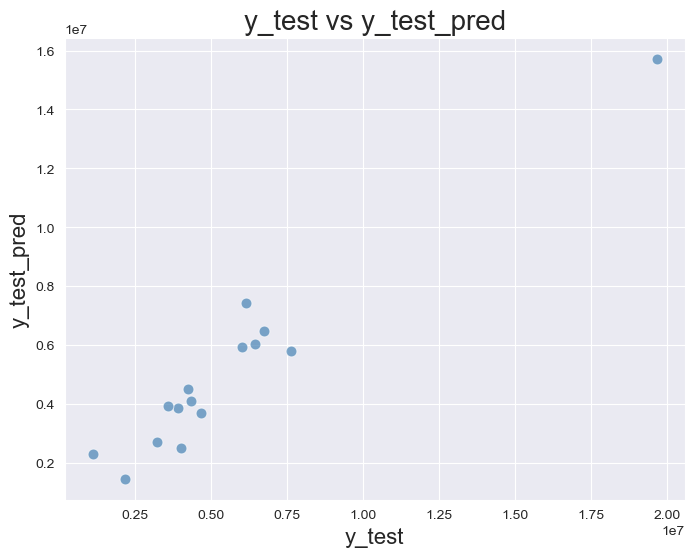

In [306]:
# Now let's use our model to make predictions.
X_train_ha_new = X_train_ha_new.drop('const', axis=1)

model_performance(X_train_ha_new, y_train_ha, X_test_ha, y_test_ha)

 ##### Game Accessory

In [307]:
gaming_accessory_df.head()

discount  deliverybdays_rsi  sla  product_procurement_sla  \
0    940.02               4.43 4.10                     3.23   
1    848.25               4.54 5.98                     2.75   
2   1111.26               4.59 5.04                     2.58   
3   1106.63               4.53 5.33                     2.25   
4   5146.52               4.61 5.57                     3.37   

   buy_period_month_end  buy_period_normal  buy_period_start_of_month  \
0                  0.00             948.00                      32.00   
1                  0.00            2760.00                       0.00   
2                  0.00            2587.00                       0.00   
3                353.00            2220.00                       0.00   
4               1163.00               0.00                       3.00   

   discount_percent        gmv  order_payment_type_Prepaid  ...  \
0            433.44  816295.00                      314.00  ...   
1            977.27 2633284.00                      666.00  ...   
2           1108.73 2432689.36                      719.00  ...   
3            912.81 2783059.50                      558.00  ...   
4            501.78 1205927.00                      242.00  ...   

   total_rain_mm  total_snow_cm  snow_on_ground_cm  TV_adstock  \
0          10.09           0.00               0.00        0.04   
1          21.19           0.00               0.00        0.04   
2           8.09           0.00               0.00        0.04   
3           5.40           0.00               0.00        0.04   
4          32.87           0.00               0.00        0.04   

   Digital_adstock  Sponsorship_adstock  Online_adstock  Radio_adstock  \
0             0.51                 1.48            0.27           0.00   
1             0.51                 1.48            0.27           0.00   
2             0.51                 1.48            0.27           0.00   
3             0.51                 1.48            0.27           0.00   
4             0.51                 1.48            0.27           0.00   

   NPS_Score  Stock_Index  
0      54.60      1177.00  
1      54.60      1177.00  
2      54.60      1177.00  
3      54.60      1177.00  
4      54.60      1177.00  

[5 rows x 38 columns]

In [308]:
ga_lagged = get_lag_data(gaming_accessory_df)

⚠️ Column 'deliverycdays_rsi' not found — skipping.


In [309]:
ga_lagged.head()

discount  deliverybdays_rsi  sla  product_procurement_sla  \
0    940.02               4.43 4.10                     3.23   
1    848.25               4.54 5.98                     2.75   
2   1111.26               4.59 5.04                     2.58   
3   1106.63               4.53 5.33                     2.25   
4   5146.52               4.61 5.57                     3.37   

   buy_period_month_end  buy_period_normal  buy_period_start_of_month  \
0                  0.00             948.00                      32.00   
1                  0.00            2760.00                       0.00   
2                  0.00            2587.00                       0.00   
3                353.00            2220.00                       0.00   
4               1163.00               0.00                       3.00   

   discount_percent        gmv  order_payment_type_Prepaid  ...  \
0            433.44  816295.00                      314.00  ...   
1            977.27 2633284.00                      666.00  ...   
2           1108.73 2432689.36                      719.00  ...   
3            912.81 2783059.50                      558.00  ...   
4            501.78 1205927.00                      242.00  ...   

   lag_3_product_procurement_sla  lag_1_deliverybdays_rsi  \
0                           0.00                     0.00   
1                           0.00                     4.43   
2                           0.00                     4.54   
3                           3.23                     4.59   
4                           2.75                     4.53   

   lag_2_deliverybdays_rsi  lag_3_deliverybdays_rsi  lag_1_NPS_Score  \
0                     0.00                     0.00             0.00   
1                     0.00                     0.00            54.60   
2                     4.43                     0.00            54.60   
3                     4.54                     4.43            54.60   
4                     4.59                     4.54            54.60   

   lag_2_NPS_Score  lag_3_NPS_Score  lag_1_Stock_Index  lag_2_Stock_Index  \
0             0.00             0.00               0.00               0.00   
1             0.00             0.00            1177.00               0.00   
2            54.60             0.00            1177.00            1177.00   
3            54.60            54.60            1177.00            1177.00   
4            54.60            54.60            1177.00            1177.00   

   lag_3_Stock_Index  
0               0.00  
1               0.00  
2               0.00  
3            1177.00  
4            1177.00  

[5 rows x 65 columns]

In [310]:
X_train_ga, y_train_ga, X_test_ga, y_test_ga = gen_train_test_df(ga_lagged)

In [311]:
# Creating a simple Linear Regression model and applying RFE
lm = LinearRegression()
lm.fit(X_train_ga, y_train_ga)
rfe = RFE(estimator=lm, n_features_to_select=9)
rfe = rfe.fit(X_train_ga, y_train_ga)

In [312]:
# List columns from RFE
X_train_ga.columns[rfe.support_]

Index(['buy_period_normal', 'buy_period_start_of_month', 'discount_percent',
       'product_analytic_vertical_GamingAccessoryKit',
       'product_analytic_vertical_GamingChargingStation',
       'product_analytic_vertical_GamingKeyboard',
       'product_analytic_vertical_MotionController', 'avg_order_value',
       'Sponsorship_adstock'],
      dtype='object')

In [313]:
X_train_rfe_ga = X_train_ga[X_train_ga.columns[rfe.support_]]
X_train_rfe_ga.head()

buy_period_normal  buy_period_start_of_month  discount_percent  \
37               0.31                       0.00             -0.24   
24               1.16                       0.00              0.91   
44               0.01                       1.62              0.29   
33               1.78                       0.00              1.56   
49               0.56                       0.00              0.15   

    product_analytic_vertical_GamingAccessoryKit  \
37                                          0.03   
24                                         -0.10   
44                                          0.02   
33                                         -0.58   
49                                          0.28   

    product_analytic_vertical_GamingChargingStation  \
37                                             0.50   
24                                             3.00   
44                                             0.00   
33                                             1.50   
49                                             0.00   

    product_analytic_vertical_GamingKeyboard  \
37                                      0.58   
24                                     -0.33   
44                                     -0.41   
33                                      0.45   
49                                      0.58   

    product_analytic_vertical_MotionController  avg_order_value  \
37                                        0.44             0.51   
24                                        0.62            -0.66   
44                                        0.81             0.62   
33                                       -0.50            -1.22   
49                                        0.31             0.62   

    Sponsorship_adstock  
37                 0.16  
24                 0.73  
44                 0.00  
33                -0.97  
49                -0.18

In [314]:
# Model 1
X_train_ga_new = build_model(X_train_rfe_ga, y_train_ga)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.981
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     151.1
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           9.96e-21
Time:                        15:51:56   Log-Likelihood:                -499.24
No. Observations:                  37   AIC:                             1018.
Df Residuals:                      27   BIC:                             1035.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [315]:
X_train_ga_new = X_train_ga_new.drop('discount_percent', axis=1)

In [316]:
# Model 2
X_train_ga_new = build_model(X_train_ga_new, y_train_ga)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     70.46
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           1.68e-16
Time:                        15:51:56   Log-Likelihood:                -515.68
No. Observations:                  37   AIC:                             1049.
Df Residuals:                      28   BIC:                             1064.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [317]:
X_train_ga_new = X_train_ga_new.drop('Sponsorship_adstock', axis=1)

In [318]:
# Model 3
X_train_ga_new = build_model(X_train_ga_new, y_train_ga)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     83.30
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           1.78e-17
Time:                        15:51:56   Log-Likelihood:                -515.70
No. Observations:                  37   AIC:                             1047.
Df Residuals:                      29   BIC:                             1060.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [319]:
X_train_ga_new = X_train_ga_new.drop('avg_order_value', axis=1)

In [320]:
# Model 4
X_train_ga_new = build_model(X_train_ga_new, y_train_ga)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     100.2
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           1.78e-18
Time:                        15:51:56   Log-Likelihood:                -515.77
No. Observations:                  37   AIC:                             1046.
Df Residuals:                      30   BIC:                             1057.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [321]:
X_train_ga_new = X_train_ga_new.drop('product_analytic_vertical_GamingChargingStation', axis=1)

In [322]:
# Model 5
X_train_ga_new = build_model(X_train_ga_new, y_train_ga)

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     111.6
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           7.19e-19
Time:                        15:51:56   Log-Likelihood:                -517.64
No. Observations:                  37   AIC:                             1047.
Df Residuals:                      31   BIC:                             1057.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     111.6
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           7.19e-19
Time:                        15:51:56   Log-Likelihood:                -517.64
No. Observations:                  37   AIC:                             1047.
Df Residuals:                      31   BIC:                             1057.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

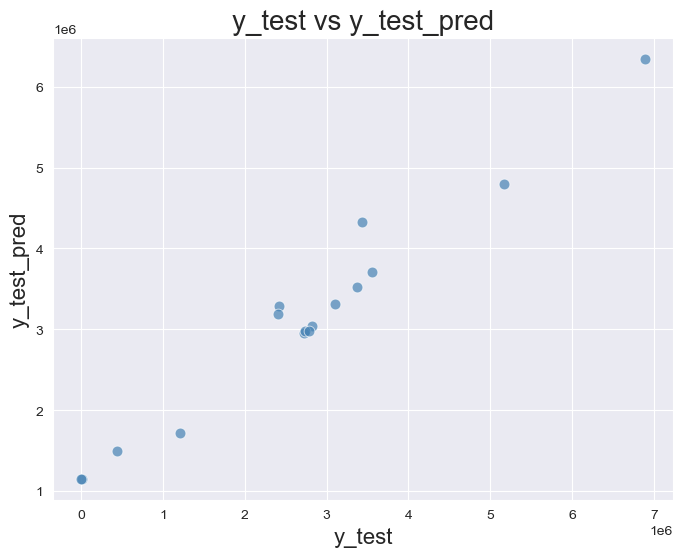

In [323]:
# Now let's use our model to make predictions.
X_train_ga_new = X_train_ga_new.drop('const', axis=1)

model_performance(X_train_ga_new, y_train_ga, X_test_ga, y_test_ga)